# Car Sales and Market Analysis

This notebook explores factors influencing car pricing, sales performance, fuel efficiency, and resale value.

It also segments vehicles by market category and investigates design–efficiency trade-offs across manufacturers.

## A - Setup and Imports

### A1 - Imports and plotting defaults

Setup and import all required Python libraries for data processing, visualization, date operations, numerical analysis, and global plot style for the analysis.

In [ ]:
# Standard/Core Libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Visualizing missing data
import missingno as msno

# Statistical Modeling
import statsmodels.api as sm

# Machine Learning (Scikit-learn)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

# Project-Specific Libraries
from dpp.data import load_from_kaggle

# Selected Plot style
#sns.set_style
#plt.rcParams

/Users/ebbykuriakose/Desktop/Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Configuration for Kaggle Download

dataset_link = "gagandeep16/car-sales" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/car-sales' already exists with files. Skipping download (replace=False).


In [3]:
files

['Car_sales.csv']

## B — Load Data and Quick Preview

Reading the Kaggle Car Sales dataset and performing an initial check on dimensions, data types, and missing values.

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0        2.639           13.2             28.0      2/2/2012   
1        3.517           17.2             25.0      6/3/2011   
2        3.470           17.2             26.0      1/4/2012   
3        3.850           18.0             22.0     3/10/2011   
4        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

In [5]:
# Dataset overview: shape, summary stats, and duplicates
display("Shape", df.shape,
        "Description", df.describe().round(2),
        "Duplicates", df.duplicated().sum())

# Column-level details: data types, missing values, unique counts, and sample values
pd.DataFrame({"Data Types": df.dtypes,
              "Unique Values": df.nunique(),
              "Sample Values": [df[col].sample(3).tolist() for col in df.columns]})

'Shape'

(157, 16)

'Description'

Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count              157.00               121.00              155.00   
mean                53.00                18.07               27.39   
std                 68.03                11.45               14.35   
min                  0.11                 5.16                9.24   
25%                 14.11                11.26               18.02   
50%                 29.45                14.18               22.80   
75%                 67.96                19.88               31.95   
max                540.56                67.55               85.50   

       Engine_size  Horsepower  Wheelbase   Width  Length  Curb_weight  \
count       156.00      156.00     156.00  156.00  156.00       155.00   
mean          3.06      185.95     107.49   71.15  187.34         3.38   
std           1.04       56.70       7.64    3.45   13.43         0.63   
min           1.00       55.00      92.60   62.60  149.40         1.90   
25%           2.30      149.50     103.00   68.40  177.58         2.97   
50%           3.00      177.50     107.00   70.55  187.90         3.34   
75%           3.58      215.00     112.20   73.43  196.12         3.80   
max           8.00      450.00     138.70   79.90  224.50         5.57   

       Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count         156.00           154.00             155.00  
mean           17.95            23.84              77.04  
std             3.89             4.28              25.14  
min            10.30            15.00              23.28  
25%            15.80            21.00              60.41  
50%            17.20            24.00              72.03  
75%            19.58            26.00              89.41  
max            32.00            45.00             188.14

'Duplicates'

np.int64(0)

Data Types  Unique Values  \
Manufacturer            object             30   
Model                   object            156   
Sales_in_thousands     float64            157   
__year_resale_value    float64            117   
Vehicle_type            object              2   
Price_in_thousands     float64            152   
Engine_size            float64             31   
Horsepower             float64             66   
Wheelbase              float64             88   
Width                  float64             78   
Length                 float64            127   
Curb_weight            float64            147   
Fuel_capacity          float64             55   
Fuel_efficiency        float64             20   
Latest_Launch           object            130   
Power_perf_factor      float64            154   

                                               Sample Values  
Manufacturer                         [Porsche, Dodge, Honda]  
Model                              [Regal, Escalade, Lumina]  
Sales_in_thousands                   [32.775, 27.602, 3.311]  
__year_resale_value                        [nan, 58.47, nan]  
Vehicle_type               [Passenger, Passenger, Passenger]  
Price_in_thousands                      [82.6, 10.685, 16.7]  
Engine_size                                  [2.0, 2.4, 2.7]  
Horsepower                             [194.0, 230.0, 155.0]  
Wheelbase                              [112.2, 106.3, 113.3]  
Width                                     [76.4, 70.3, 68.9]  
Length                                 [192.5, 177.5, 190.4]  
Curb_weight                            [3.373, 3.876, 3.219]  
Fuel_capacity                             [17.9, 20.0, 15.9]  
Fuel_efficiency                           [22.0, 16.0, 25.0]  
Latest_Launch                [1/31/2012, 1/4/2012, 6/6/2012]  
Power_perf_factor    [54.81972825, 92.43688923, 70.65449545]

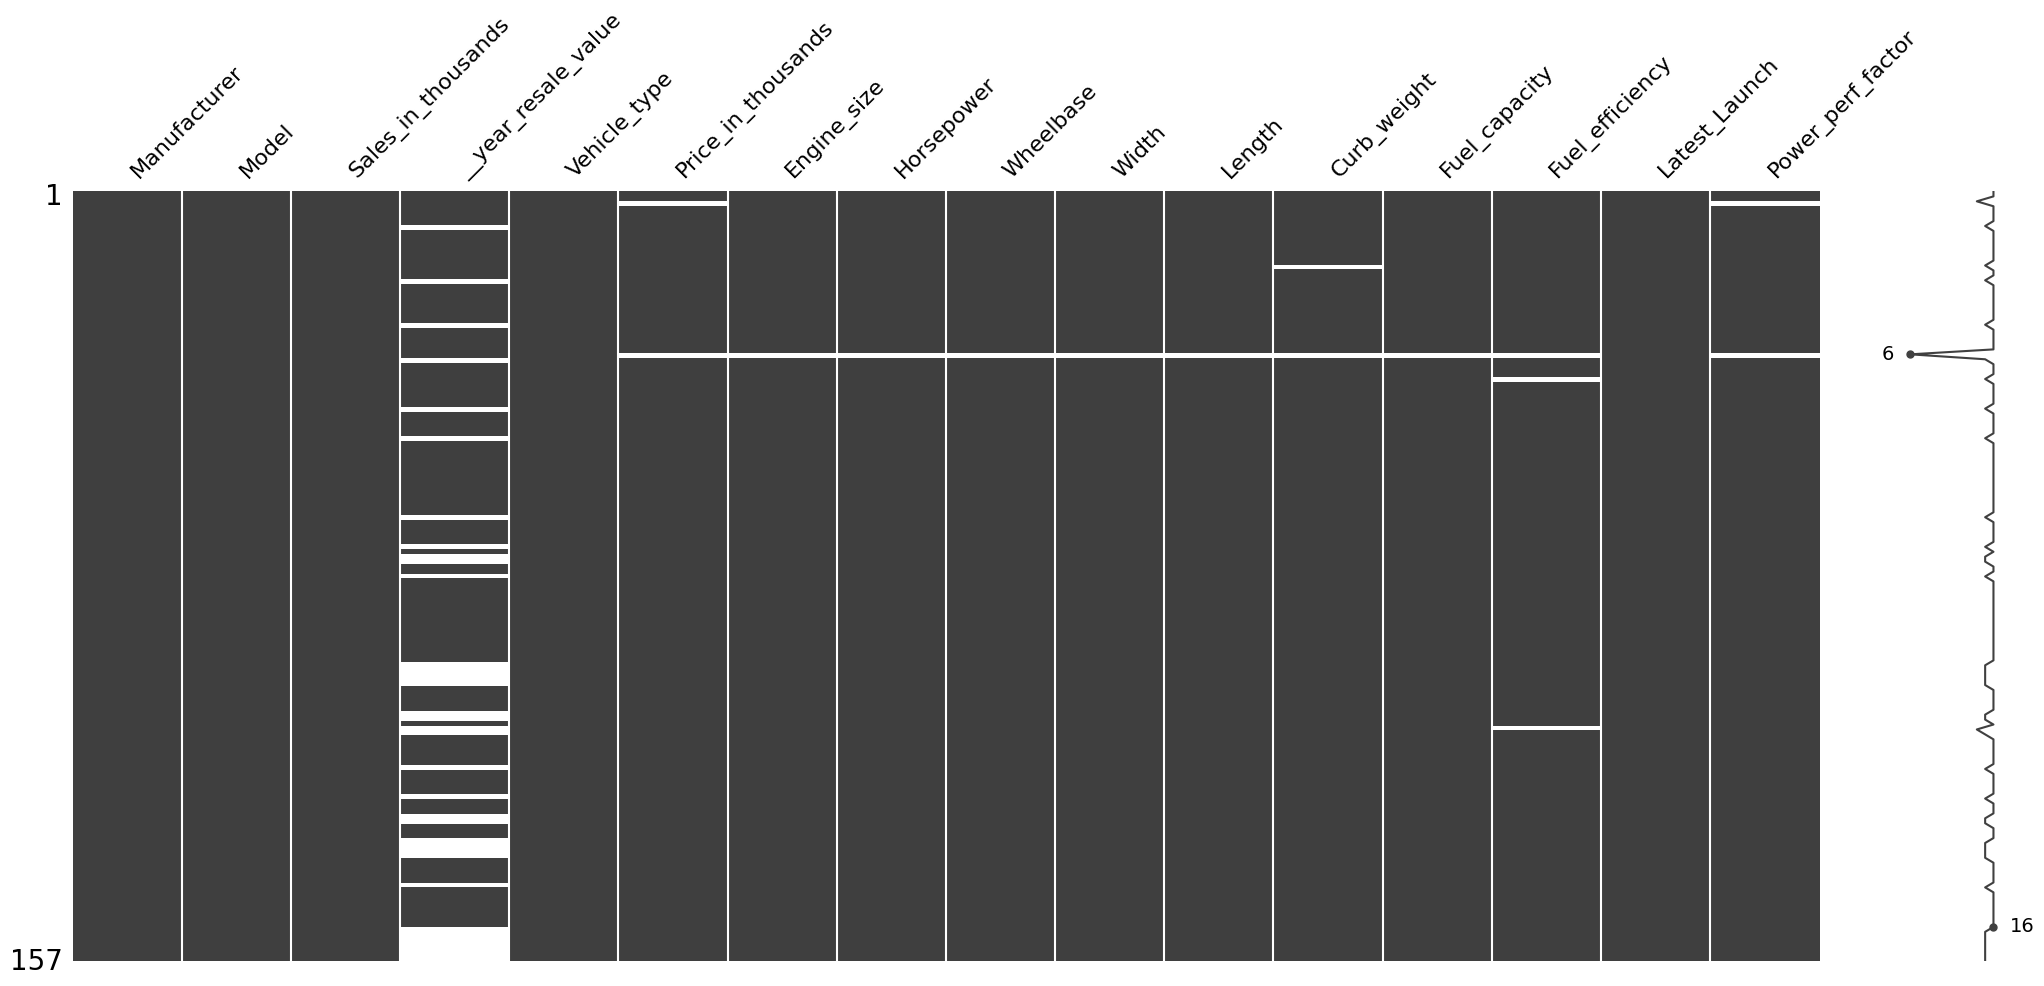

In [6]:
# Visualizing missing values in the dataset
msno.matrix(df)
plt.show()

## C - Data Cleaning and Feature Engineering

This section handles column renaming, type conversions, and missing-value treatment.  
It also computes derived attributes such as **Depreciation_Percentage**, **Retention_Ratio**, and **Power_to_weight Ratio**.

### C1 - Data Cleaning

In [7]:
# Rename column '__year_resale_value' to 'Year_resale_value' if it exists

if '__year_resale_value' in df.columns:
    df.rename(columns={'__year_resale_value': 'Year_resale_value'}, inplace=True)

In [ ]:
# Converted specified columns to categorical type

category_col = ['Manufacturer','Model','Vehicle_type']
for col in category_col:
    df[col] = df[col].astype('category')

# Convert the 'Latest_Launch' column from string format MM/DD/YYYY to datetime objects.

df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], format='%m/%d/%Y', errors='coerce').dt.normalize()

In [ ]:
# Remove rows with >=3 missing (NaN) values

df = df[df.isna().sum(axis=1) < 3]

In [10]:
# Median imputation for 'Price_in_thousands', 'Power_perf_factor' 'Curb_weight'

for col in ['Price_in_thousands', 'Power_perf_factor', 'Curb_weight']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [11]:
# Function to impute missing values using Linear Regression 

def impute_with_regression(df, target_col, features):
    """
    Impute missing values in target_col using Linear Regression on given features.
    """
    # Split data into rows with and without target_col
    train_data = df[df[target_col].notnull()]
    test_data = df[df[target_col].isnull()]
    
    if test_data.empty:
        print(f"No missing values in {target_col}")
        return df
    
    missing_idx = test_data.index

    X_train = train_data[features]
    y_train = train_data[target_col]
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    X_test = test_data[features]
    predicted_values = model.predict(X_test)
    
    df.loc[missing_idx, target_col] = predicted_values
    return df

In [12]:
# Apply regression-based imputations

features_fuel_efficiency = ['Engine_size', 'Horsepower', 'Width', 'Curb_weight', 'Fuel_capacity', 'Power_perf_factor']
features_resale_value = ['Price_in_thousands', 'Horsepower', 'Power_perf_factor']

# Function call
df = impute_with_regression(df, 'Year_resale_value', features_resale_value)
df = impute_with_regression(df, 'Fuel_efficiency', features_fuel_efficiency)

### C2 - Feature Engineering: Deriving Depreciation and Retention Metrics

- **Depreciation_Percentage:** Measures how much value a car loses from its original price.
- **Retention_Ratio:** Indicates what proportion of the original price is retained in resale value.
- **Power_to_Weight:** 
- **Launch_Year:** Indicates the year the car was launched

In [ ]:
df['Depreciation_Percentage'] = ((df['Price_in_thousands'] - df['Year_resale_value']) / df['Price_in_thousands']) * 100
df['Retention_Ratio'] = df['Year_resale_value'] / df['Price_in_thousands']
df['Power_to_Weight'] = df['Horsepower'] / df['Curb_weight']
df['Launch_Year'] = df['Latest_Launch'].dt.year

Average Depreciation: 31.4%


### C3 - Feature Categorization: Performance & Design Attributes

To streamline analysis, we group features into two logical categories:

- **Performance Attributes:** Relates to the car’s power and efficiency characteristics.
- **Design Attributes:** Captures the vehicle’s structural and dimensional characteristics.

These groups will be referenced across multiple analysis sections.

In [14]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='category').columns

print('Numeric Columns:', numeric_cols.tolist())
print('Categorical Columns:', categorical_cols.tolist())

performance_features = ['Engine_size', 'Horsepower', 'Fuel_efficiency']
design_features = ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity']

Numeric Columns: ['Sales_in_thousands', 'Year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Depreciation_Percentage', 'Retention_Ratio', 'Power_to_Weight']
Categorical Columns: ['Manufacturer', 'Model', 'Vehicle_type']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 156
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Manufacturer             156 non-null    category      
 1   Model                    156 non-null    category      
 2   Sales_in_thousands       156 non-null    float64       
 3   Year_resale_value        156 non-null    float64       
 4   Vehicle_type             156 non-null    category      
 5   Price_in_thousands       156 non-null    float64       
 6   Engine_size              156 non-null    float64       
 7   Horsepower               156 non-null    float64       
 8   Wheelbase                156 non-null    float64       
 9   Width                    156 non-null    float64       
 10  Length                   156 non-null    float64       
 11  Curb_weight              156 non-null    float64       
 12  Fuel_capacity            156 non-null    

## D - Exploratory Data Analysis (EDA)

We explore the dataset to understand patterns, detect outliers, and assess relationships between key variables such as price, performance, and fuel efficiency.

### D1 - Correlation heatmap for numeric features

Visualizing correlations between numerical features helps identify potential relationships and multicollinearity.

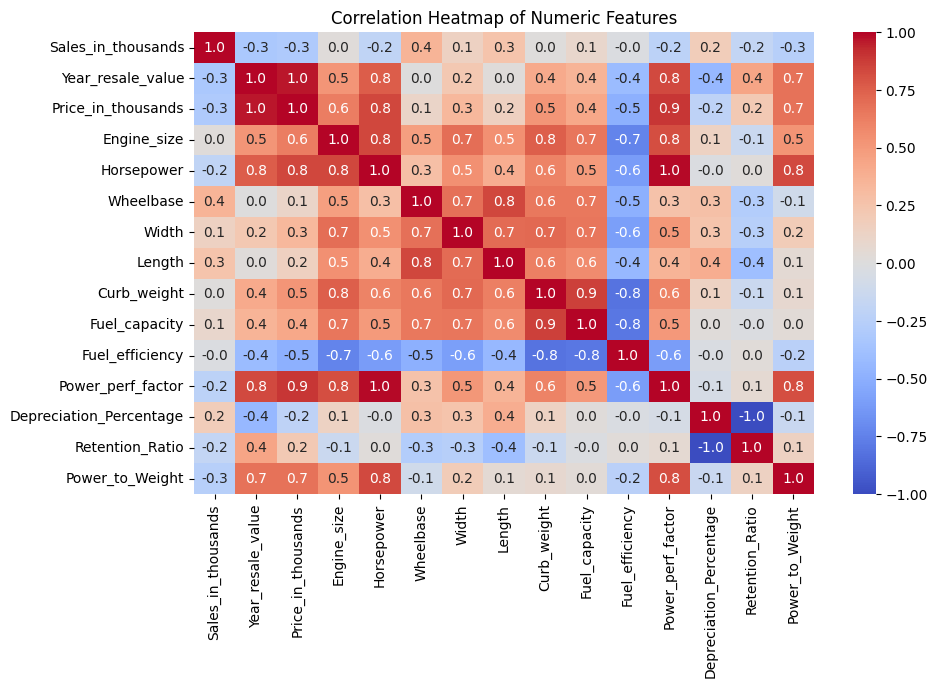

In [16]:
corr_matrix_all = df.corr(numeric_only=True) 
threshold = 0.6

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_all, annot=True, cmap="coolwarm", center=0, fmt='.1f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

corr_matrix_subset= df[numeric_cols].corr().round(2)

### D2 - Distribution of numeric variables

Histograms and boxplots show how numeric attributes like price, sales, and horsepower are distributed, highlighting skewness and outliers.


Column: Sales_in_thousands
Skewness: 3.40
Highly right-skewed


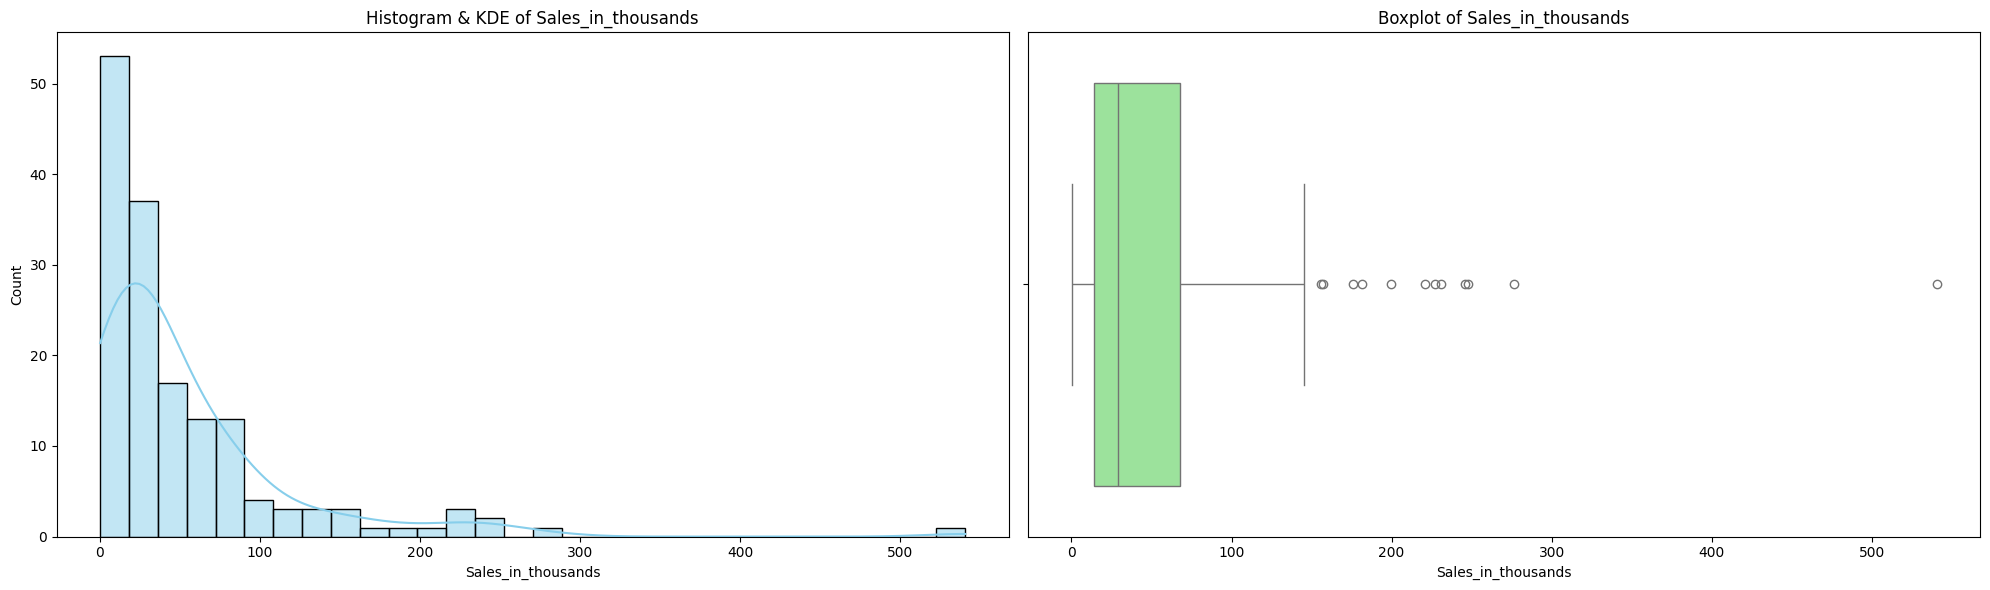


Column: Year_resale_value
Skewness: 2.08
Highly right-skewed


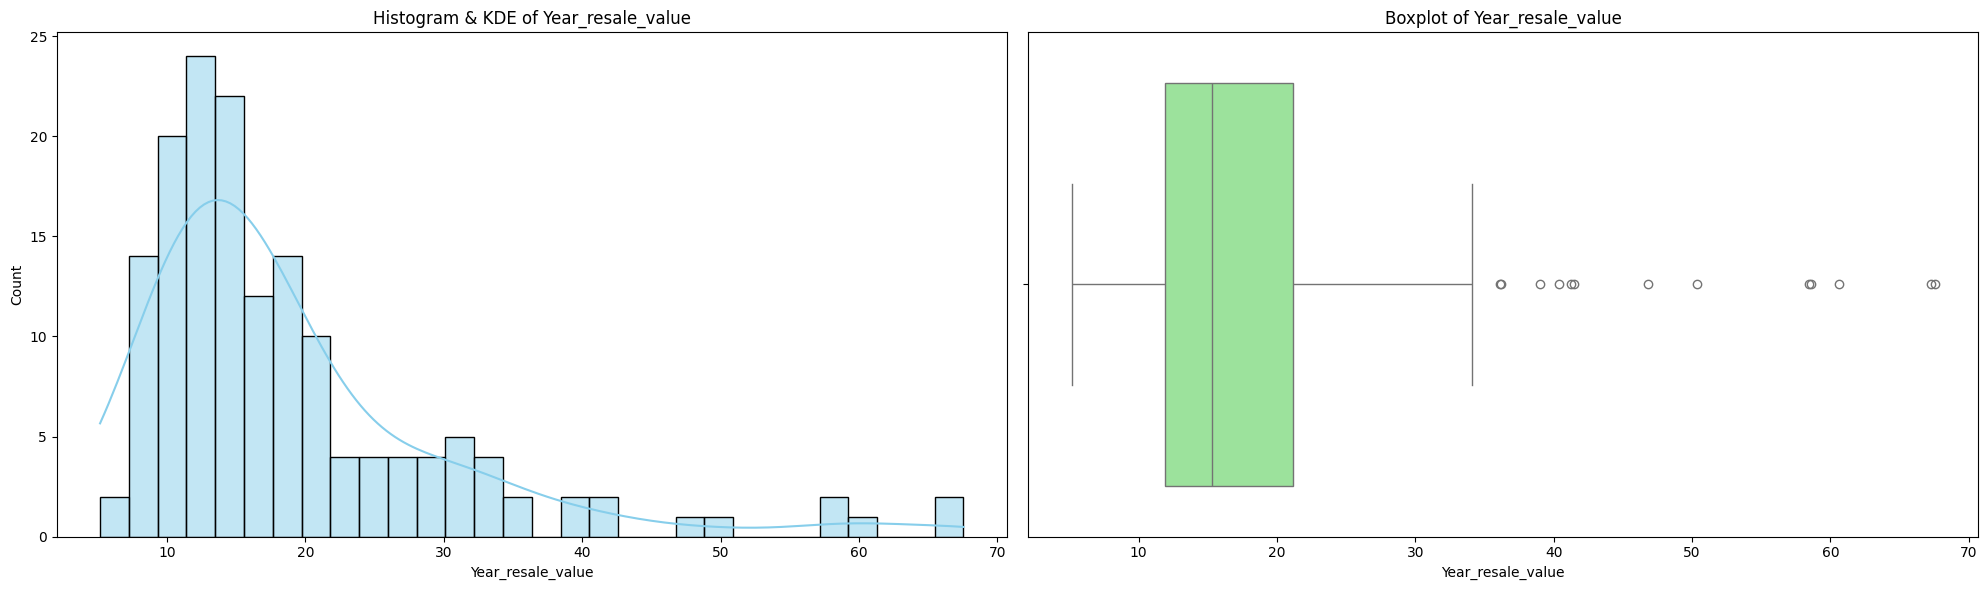


Column: Price_in_thousands
Skewness: 1.78
Highly right-skewed


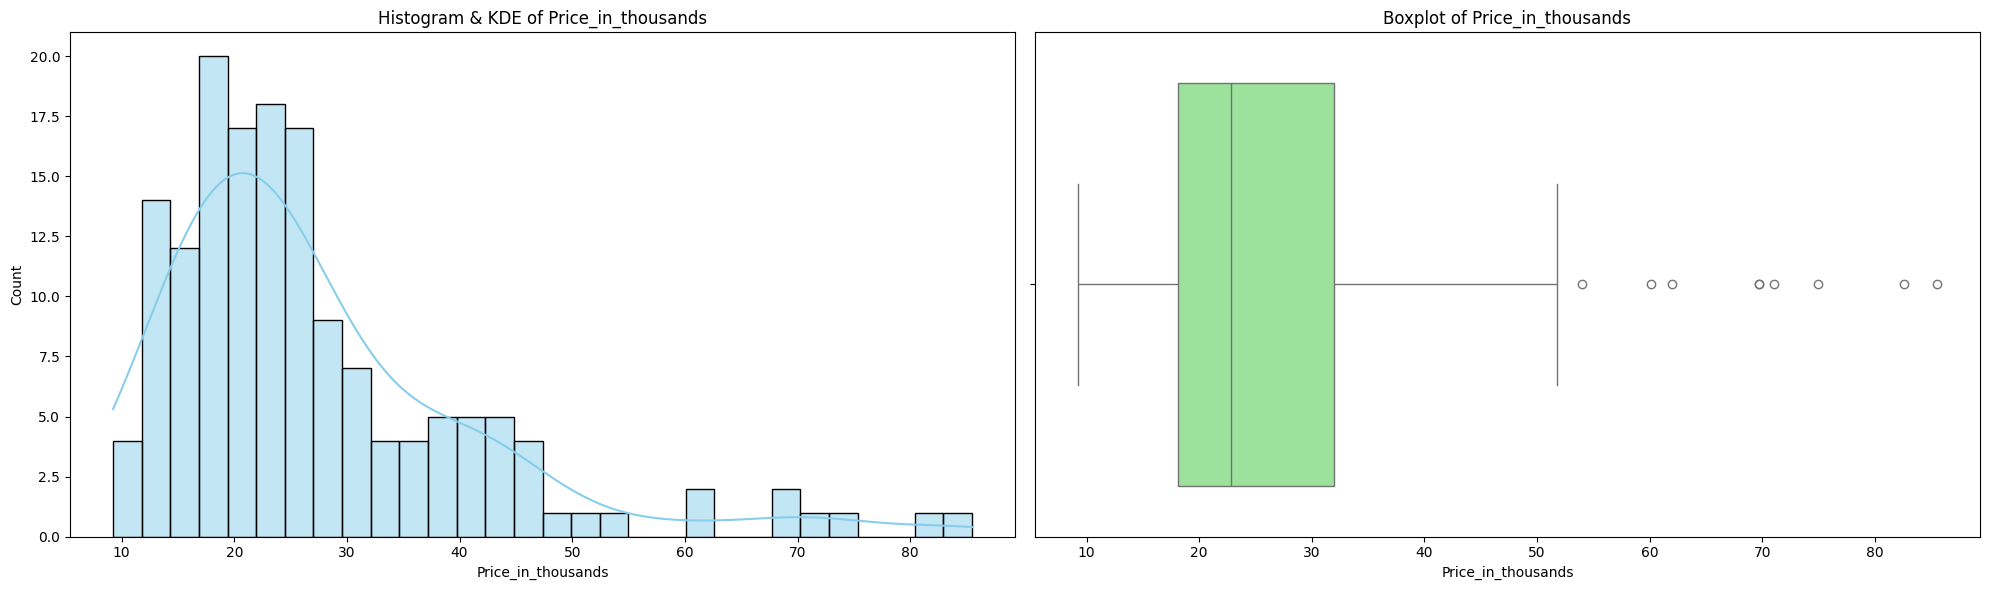


Column: Engine_size
Skewness: 1.10
Highly right-skewed


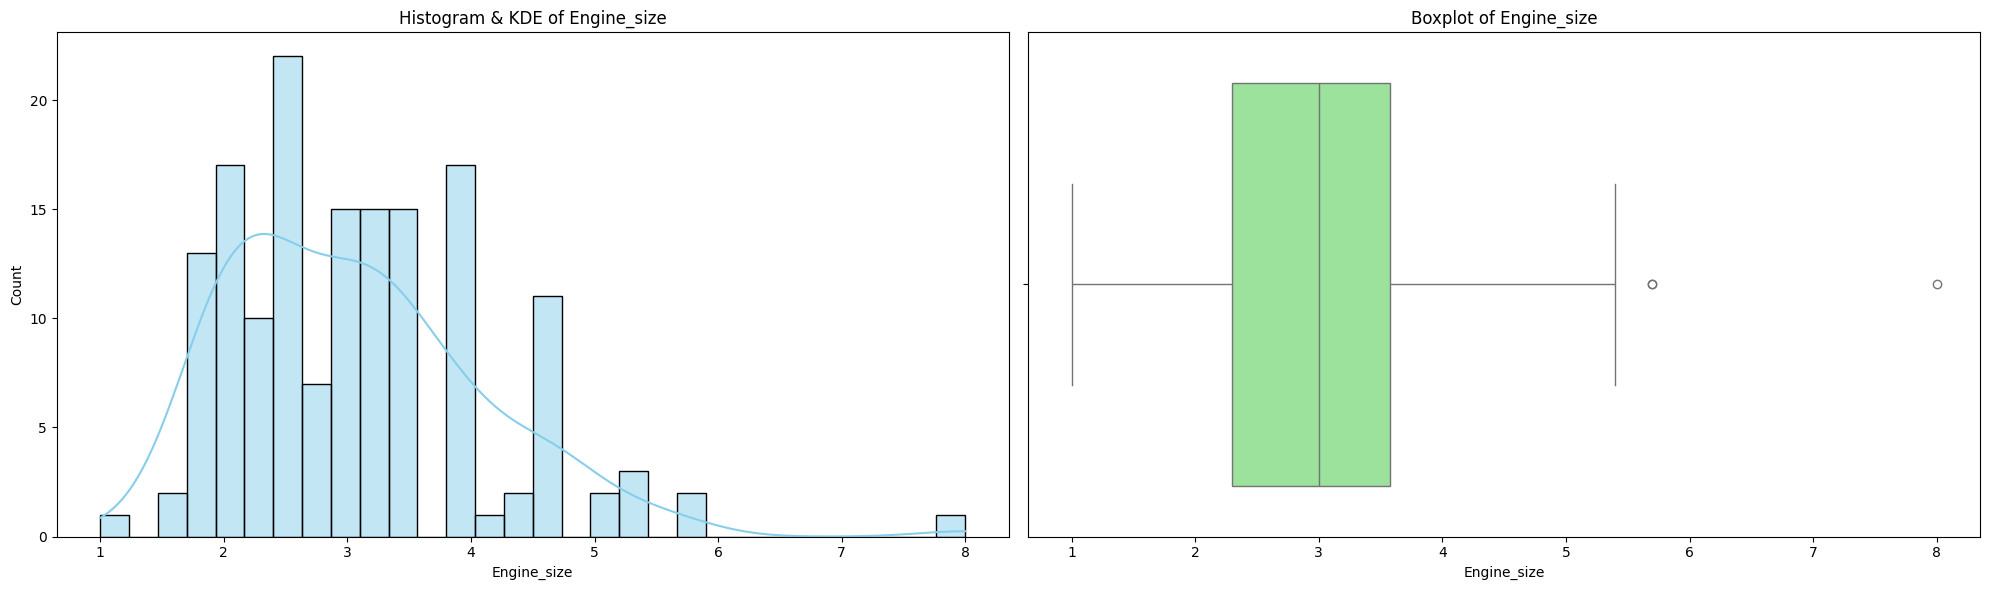


Column: Horsepower
Skewness: 1.00
Highly right-skewed


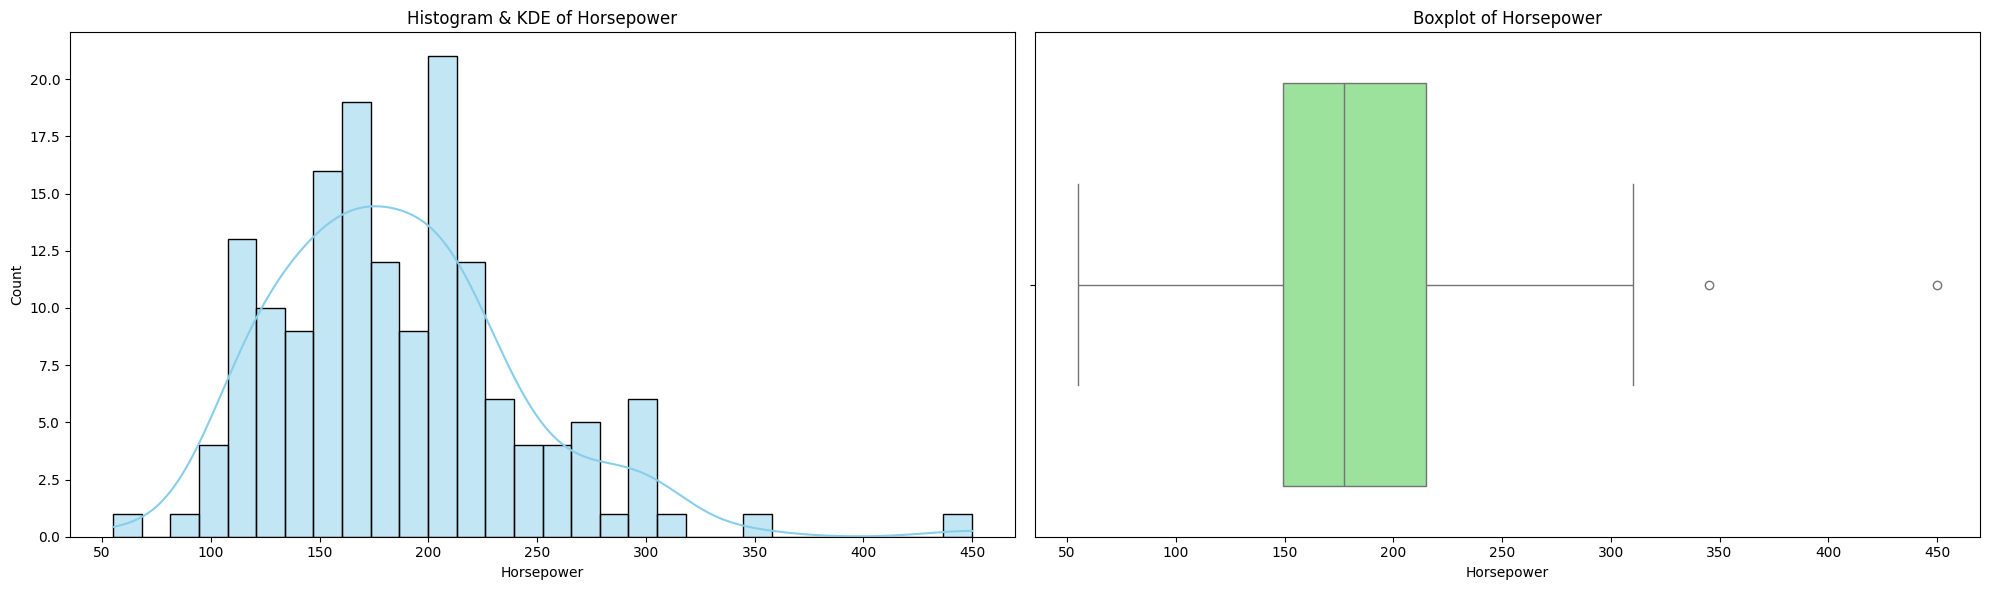


Column: Wheelbase
Skewness: 0.97
Moderately right-skewed


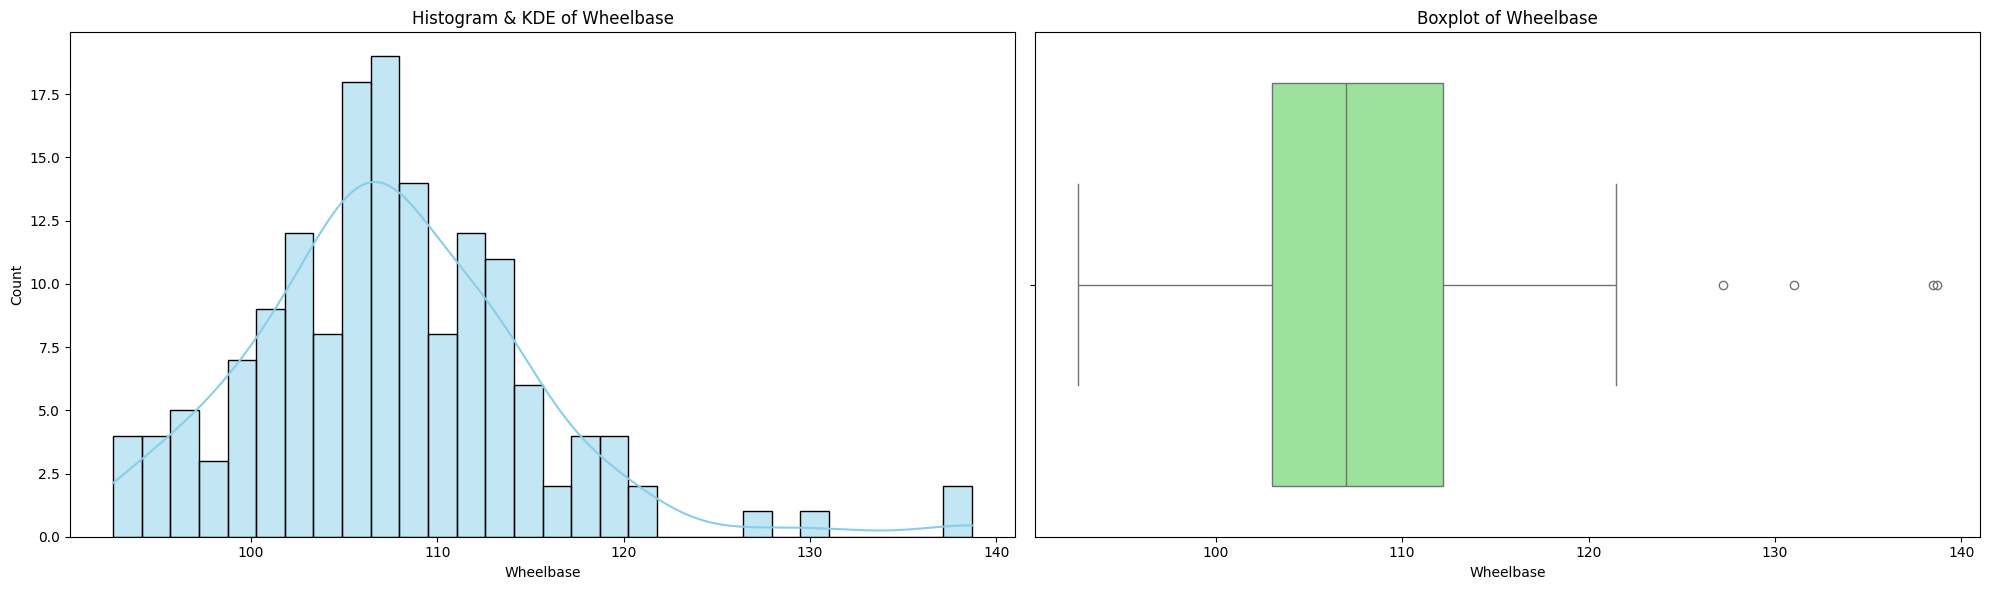


Column: Width
Skewness: 0.48
Approximately symmetric


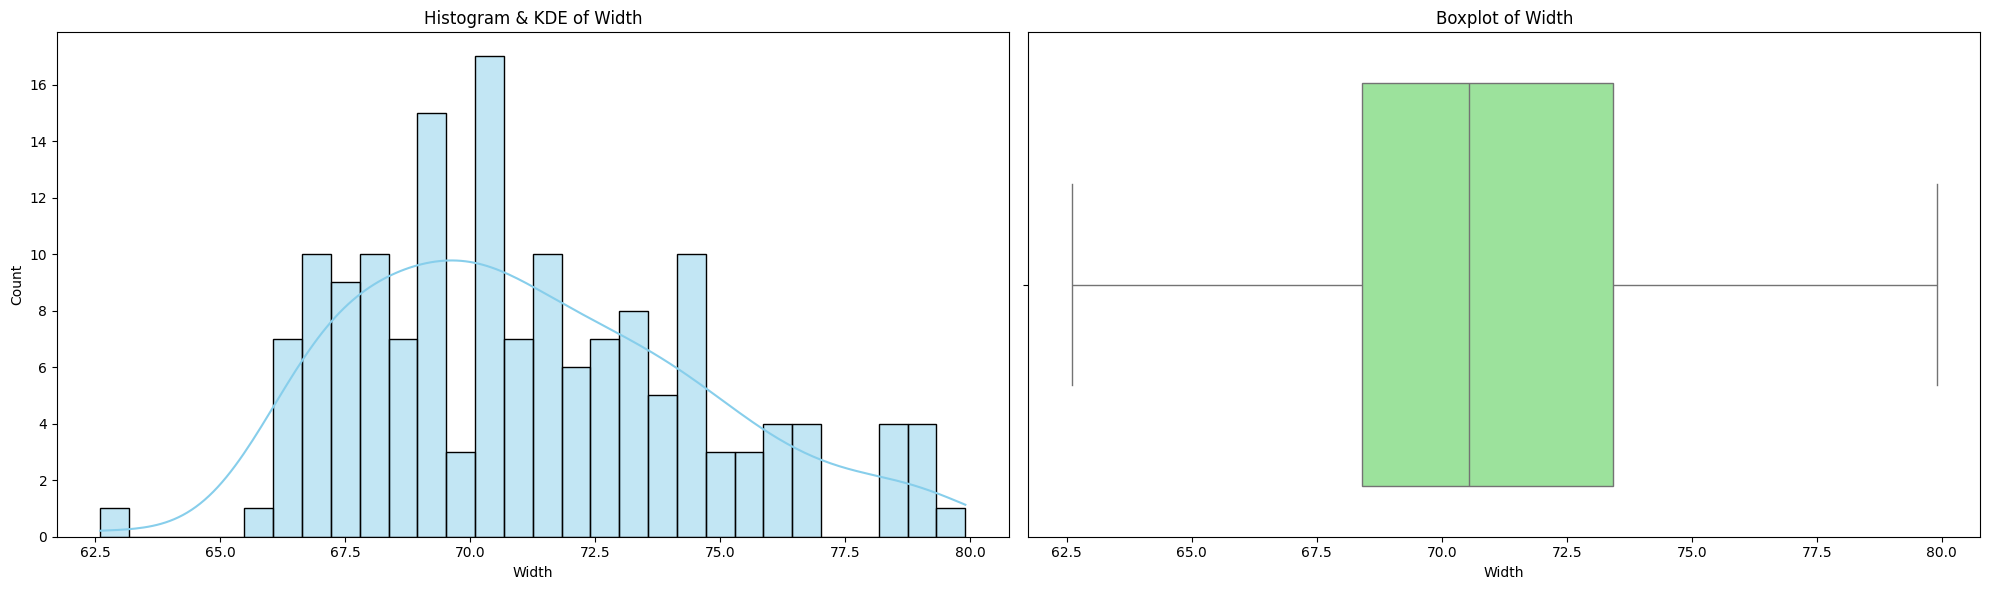


Column: Length
Skewness: -0.06
Approximately symmetric


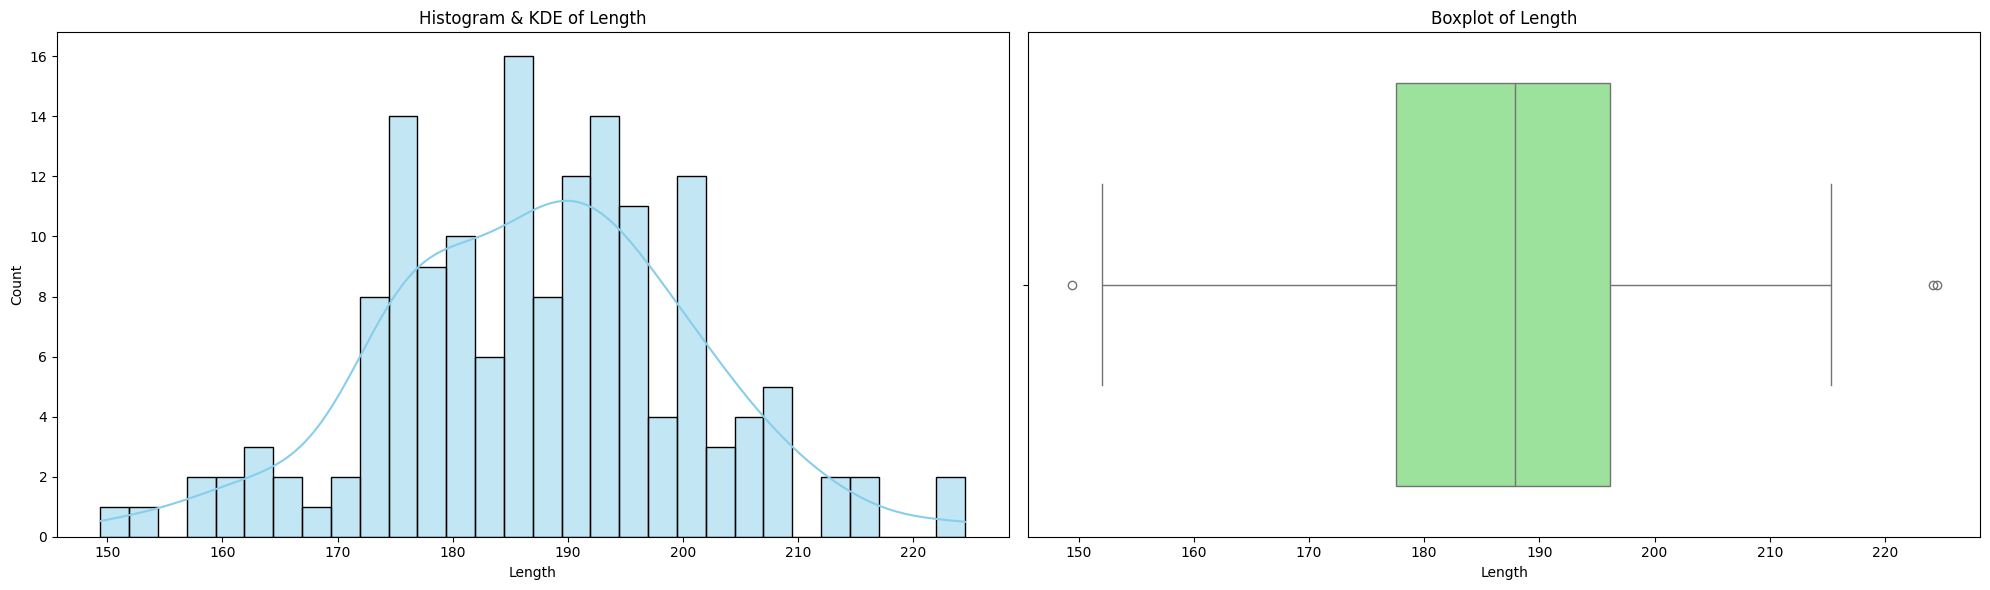


Column: Curb_weight
Skewness: 0.71
Moderately right-skewed


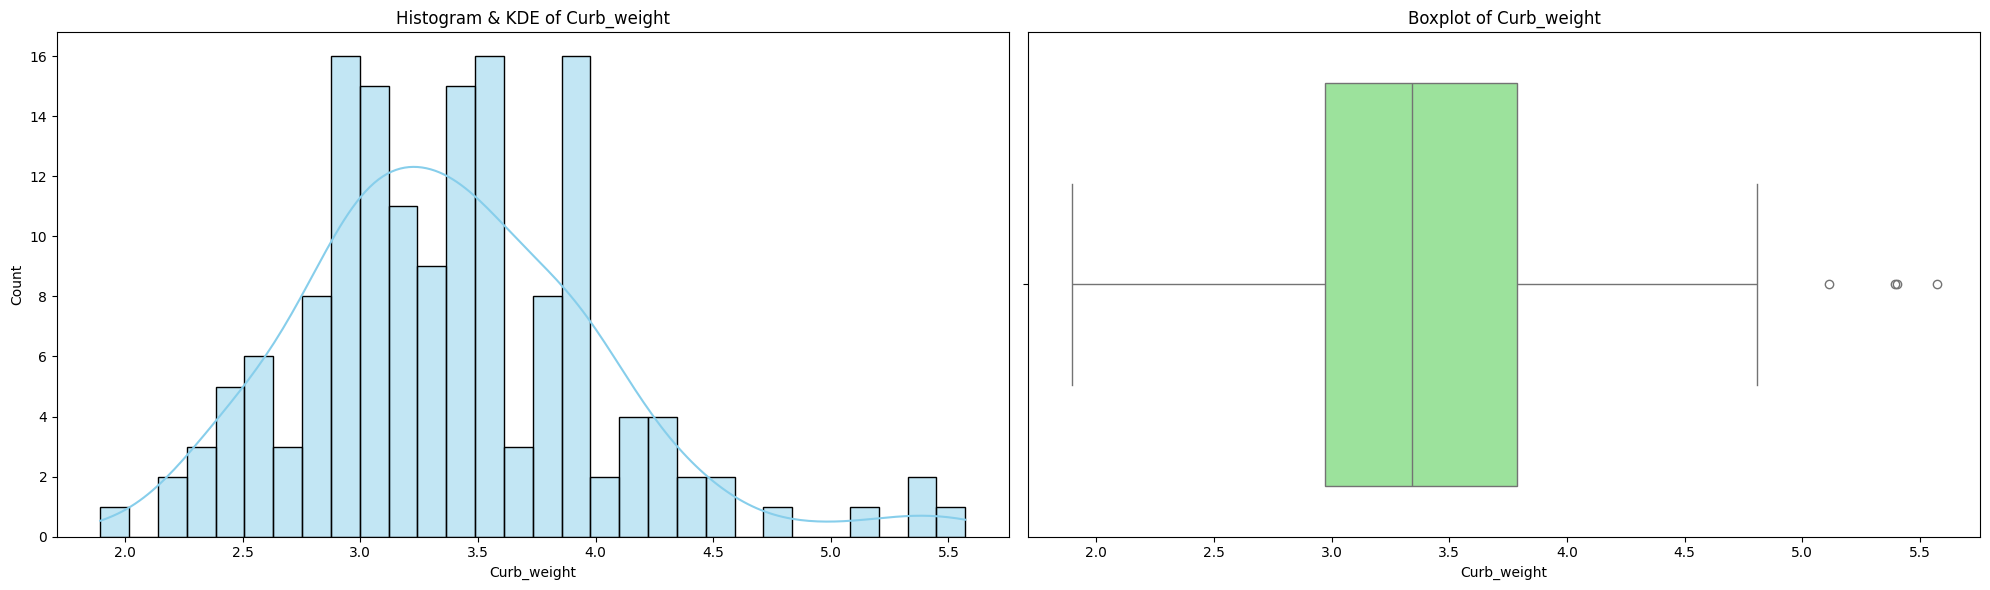


Column: Fuel_capacity
Skewness: 1.14
Highly right-skewed


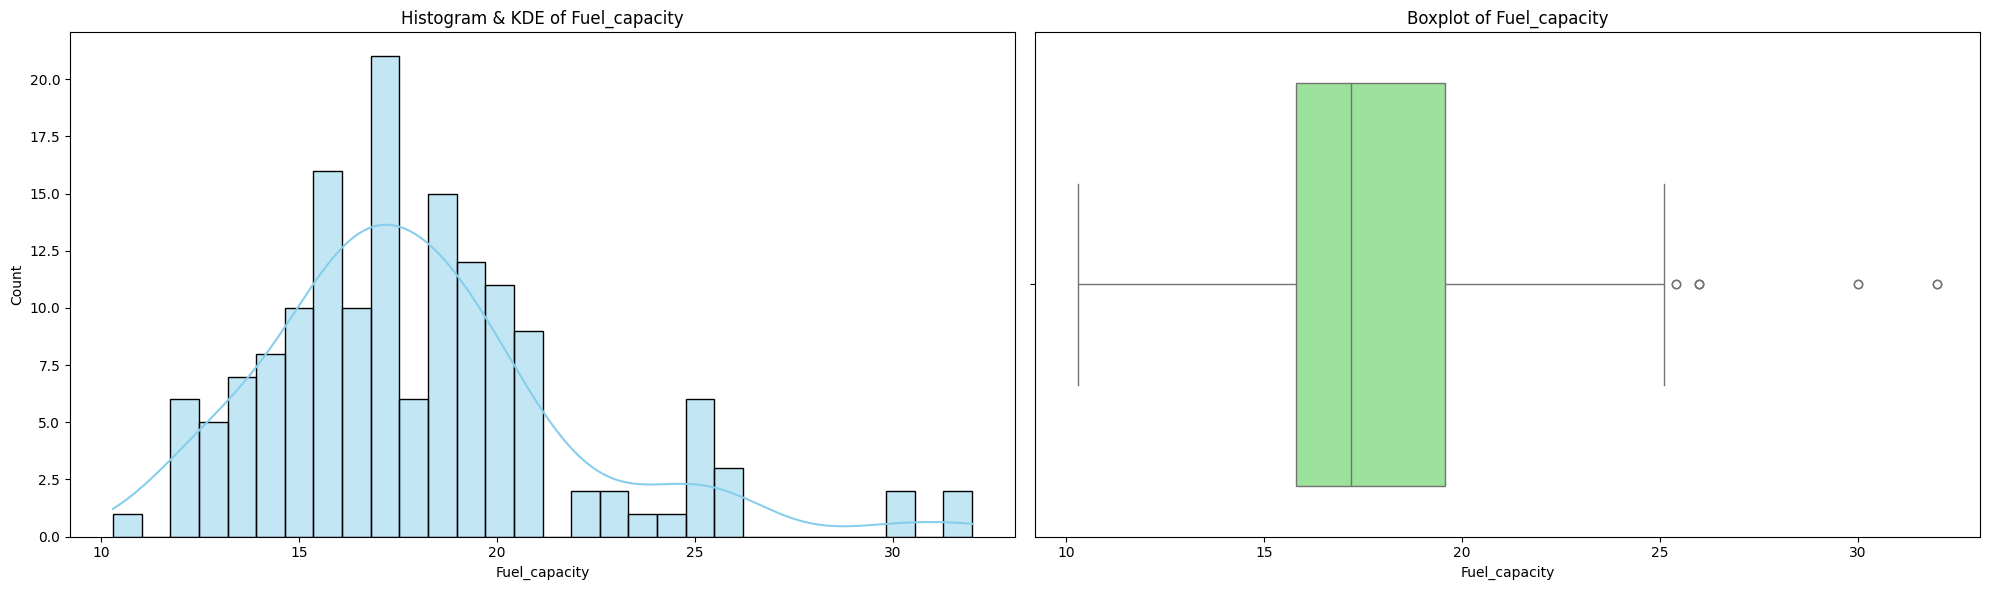


Column: Fuel_efficiency
Skewness: 0.70
Moderately right-skewed


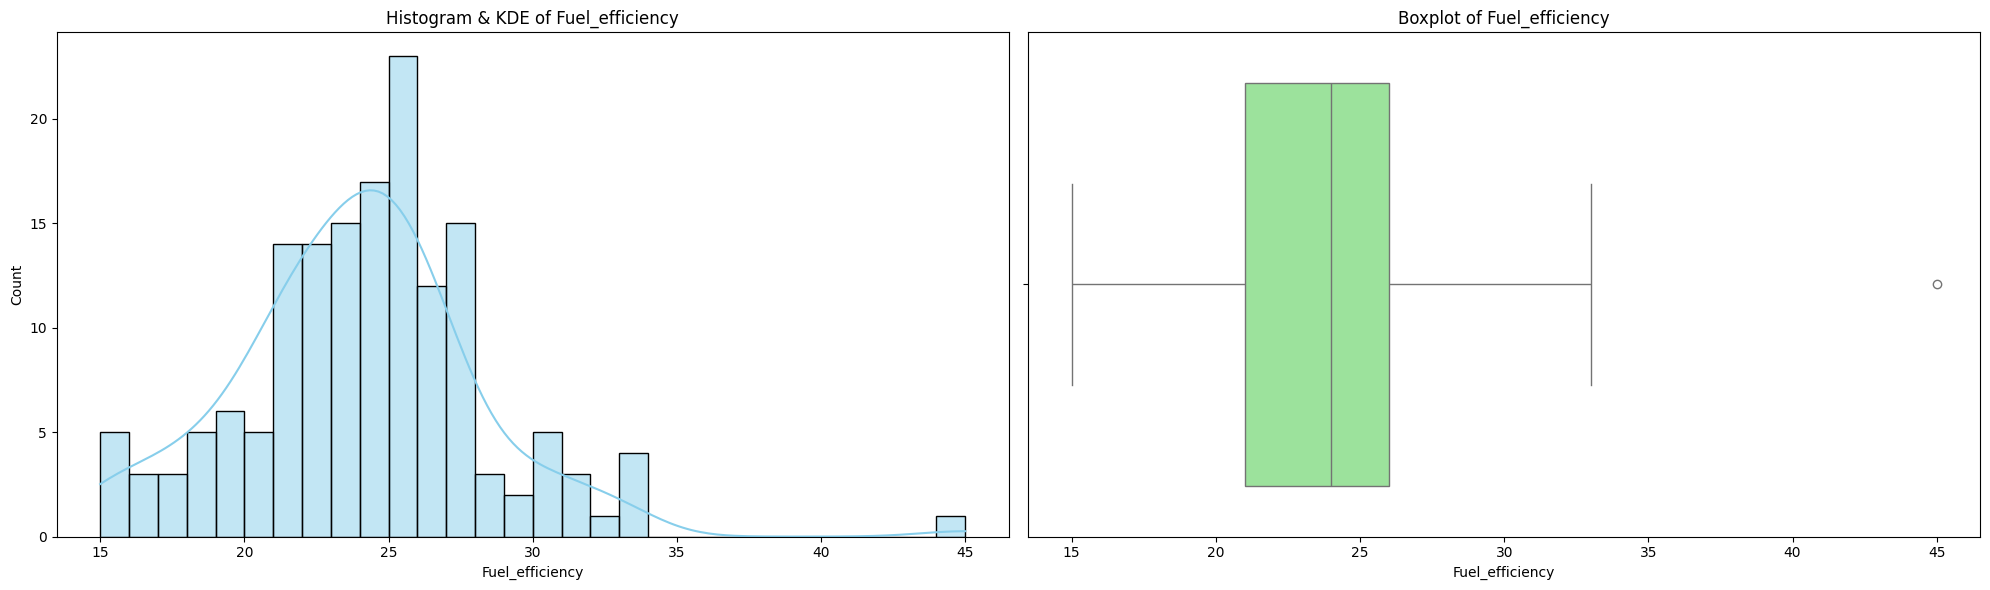


Column: Power_perf_factor
Skewness: 1.08
Highly right-skewed


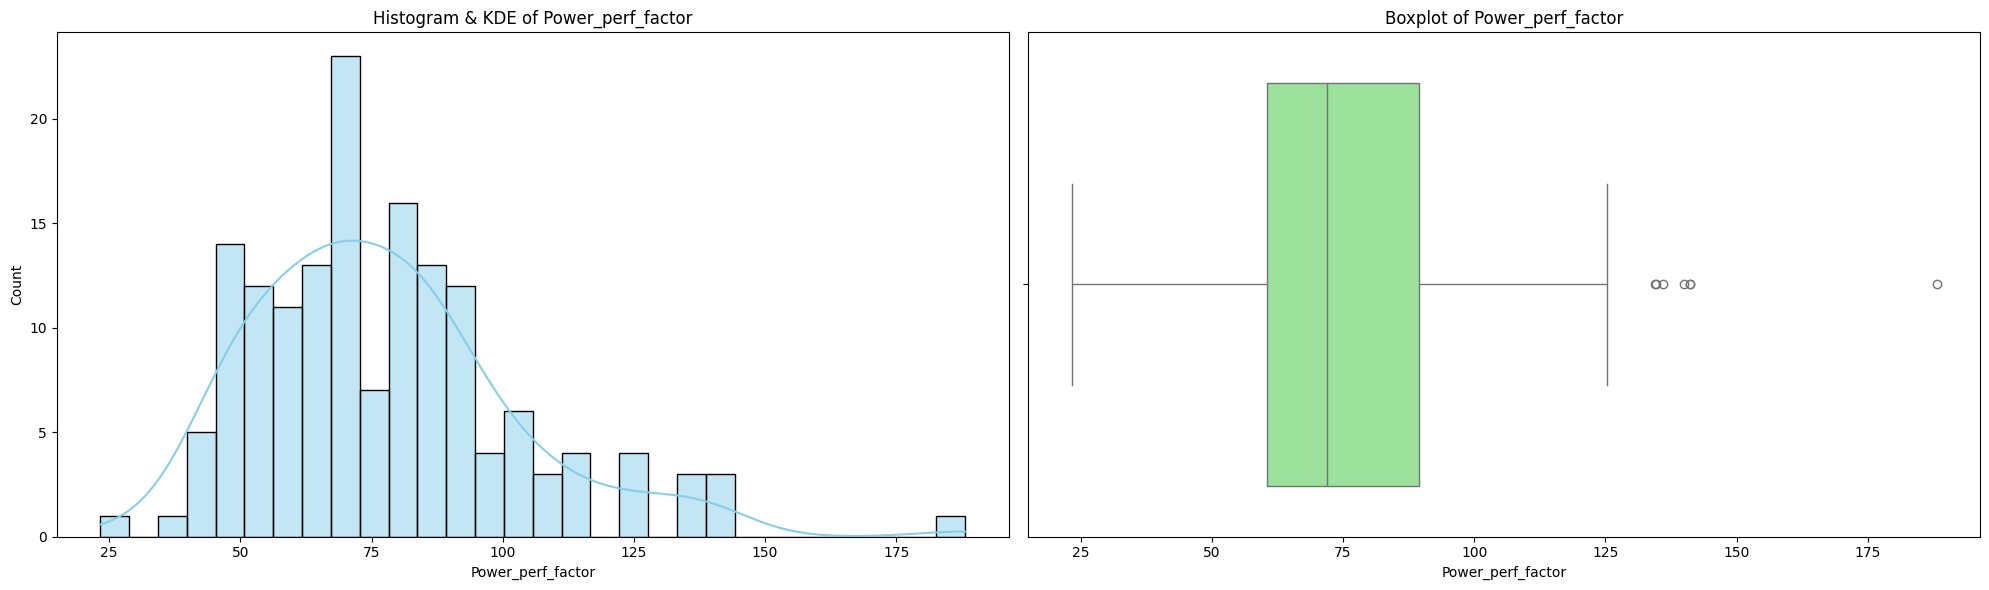


Column: Depreciation_Percentage
Skewness: -0.48
Approximately symmetric


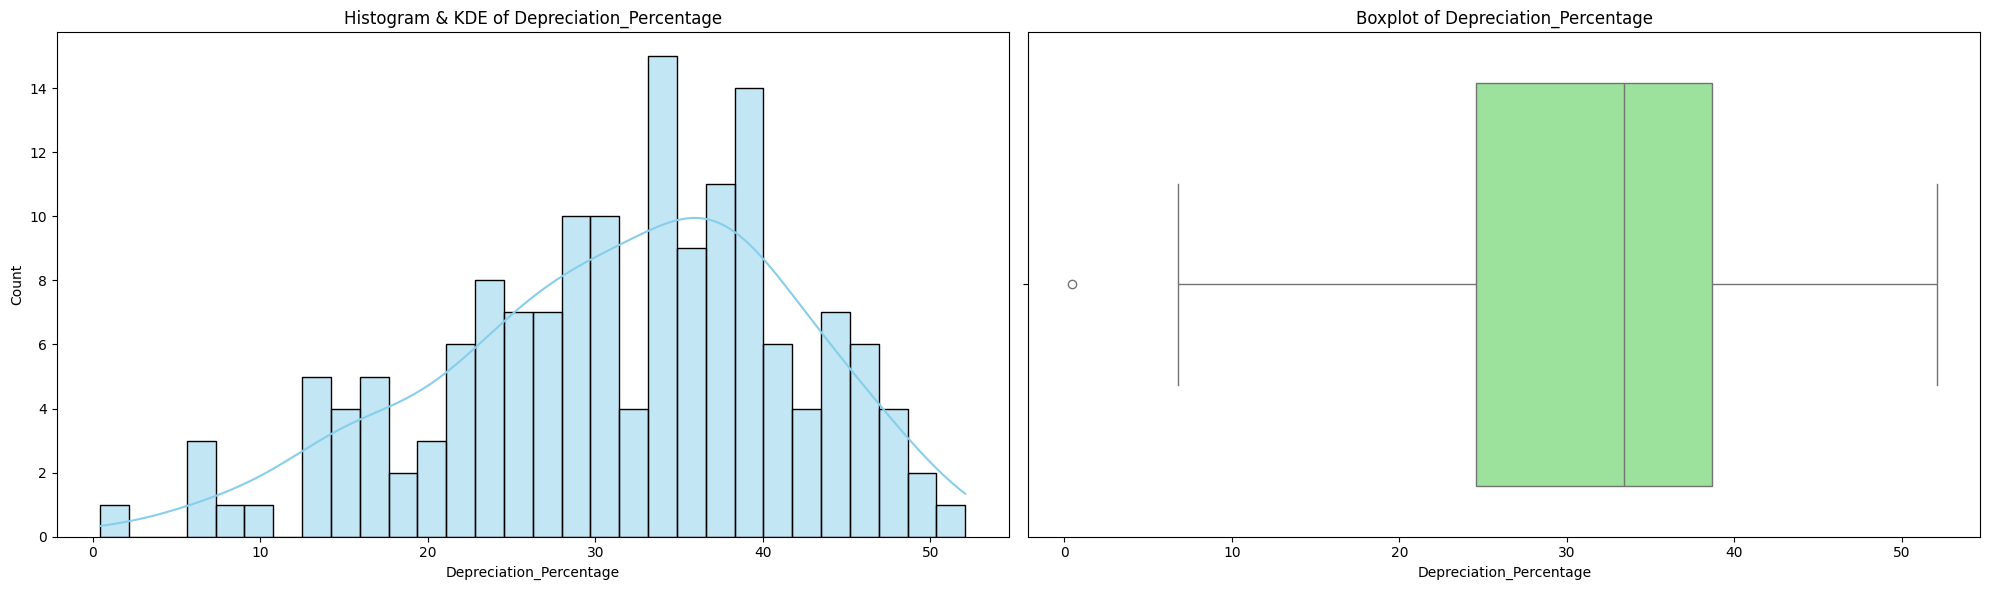


Column: Retention_Ratio
Skewness: 0.48
Approximately symmetric


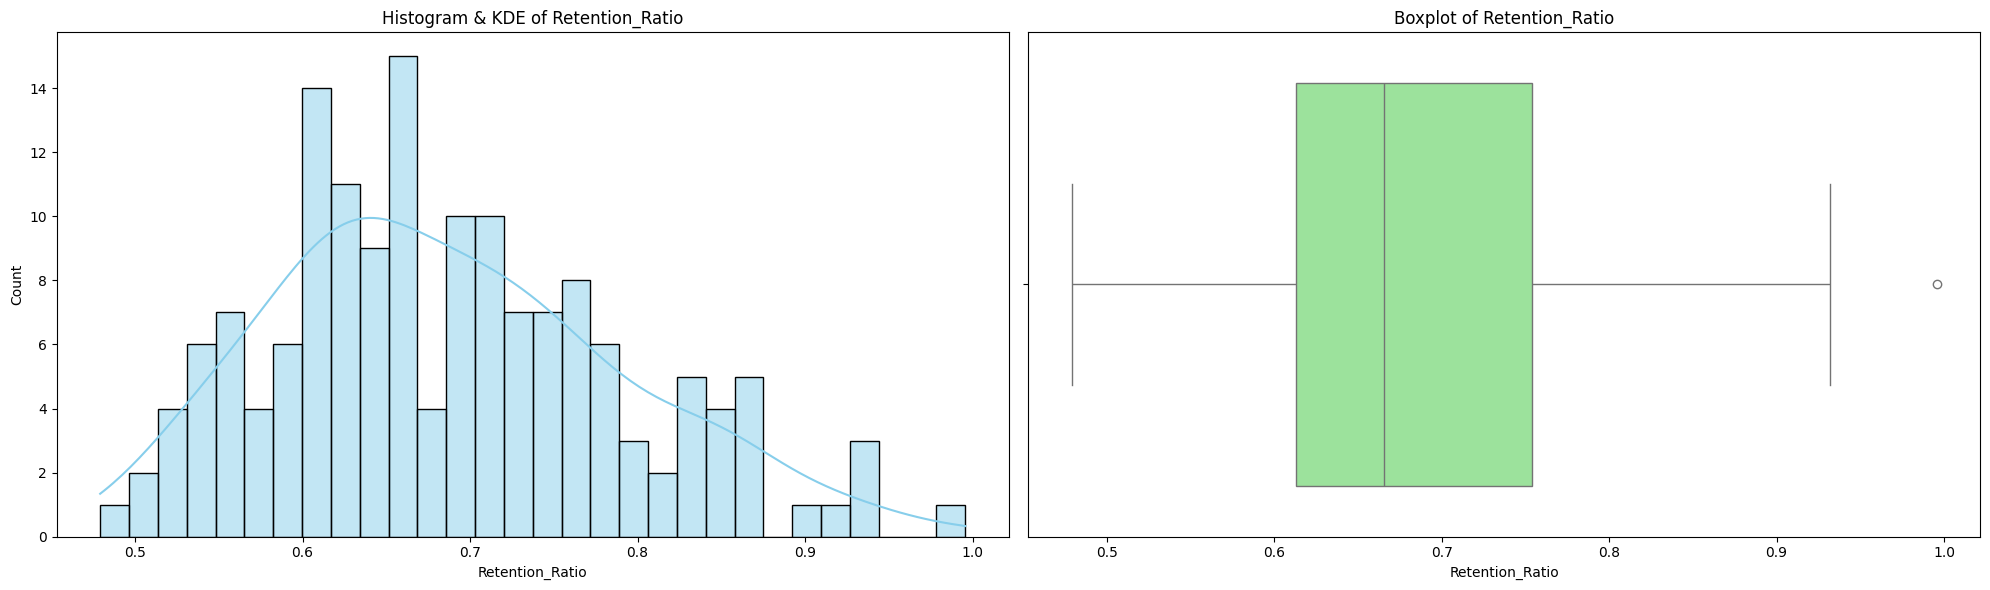


Column: Power_to_Weight
Skewness: 2.25
Highly right-skewed


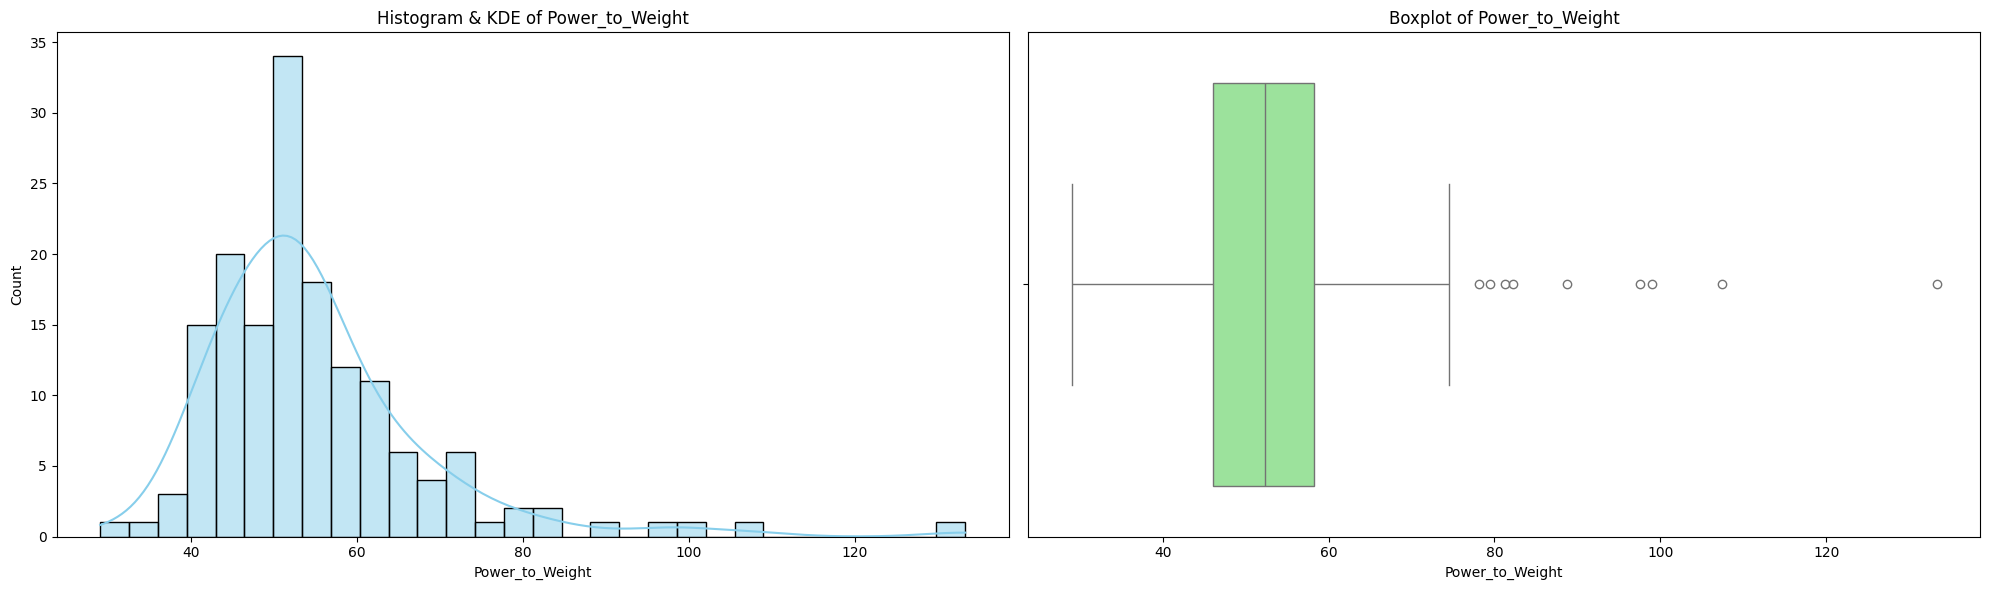

In [17]:
for col in numeric_cols:
    skewness = df[col].skew()
    print(f'\nColumn: {col}')
    print(f'Skewness: {skewness:.2f}')
    
    if skewness > 1: # type: ignore
        print('Highly right-skewed')
    elif skewness > 0.5:  # type: ignore
        print('Moderately right-skewed')
    elif skewness < -1: # type: ignore
        print('Highly left-skewed')
    elif skewness < -0.5: # type: ignore
        print('Moderately left-skewed')
    else:
        print('Approximately symmetric')
    
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram & KDE of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

### D3 - Categorical feature counts and unique models per manufacturer

Analyzing categorical feature distributions like `Manufacturer`, `Vehicle_type`, and `Model`.  

This gives an idea of how the dataset is composed across brands and segments.


In [ ]:
avg_dep = df['Depreciation_Percentage'].mean()
print(f'Average Depreciation: {avg_dep:.1f}%')


Column: Manufacturer (Unique values: 30)


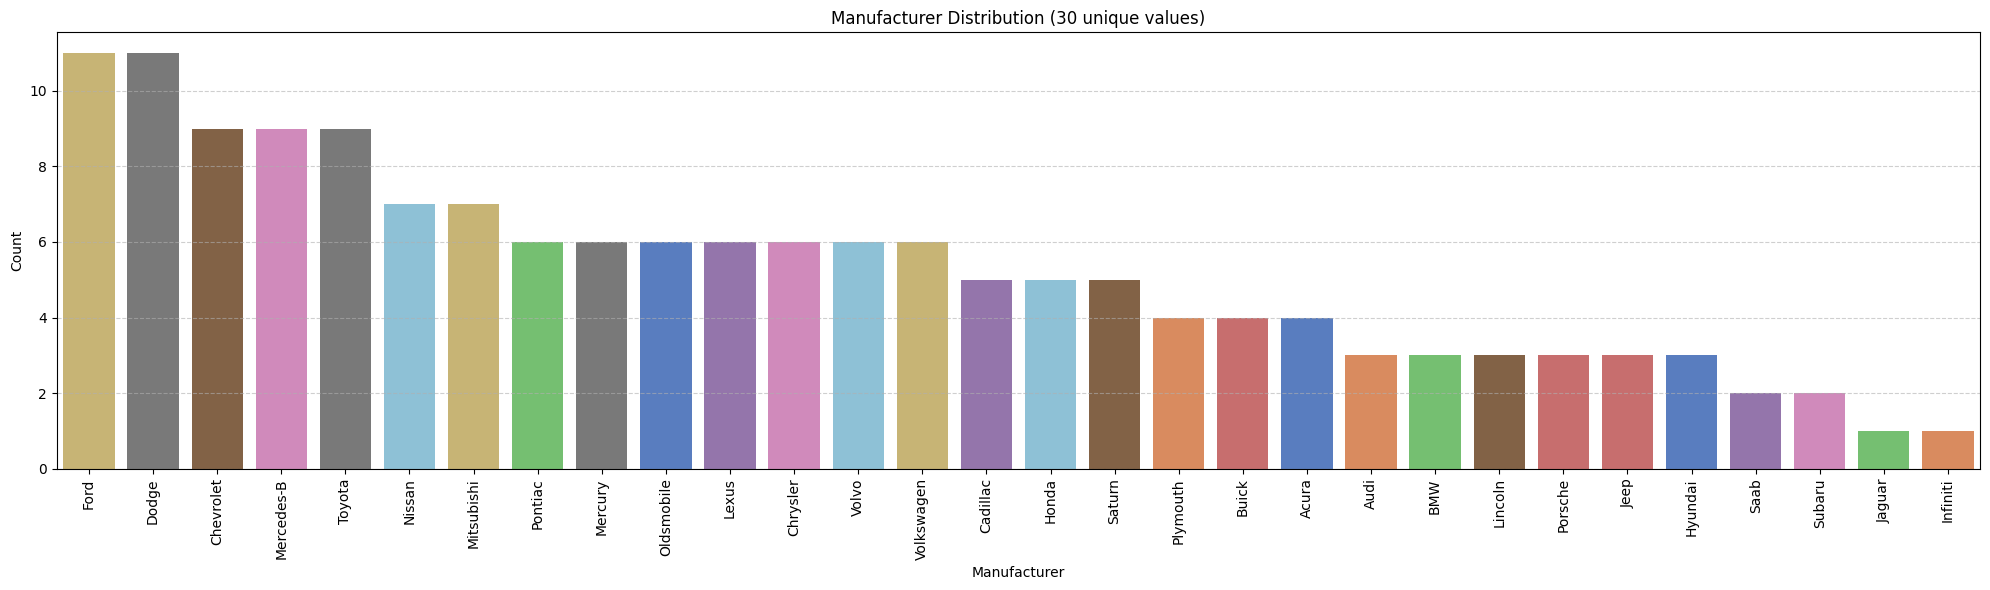


Column: Model (Unique values: 155)


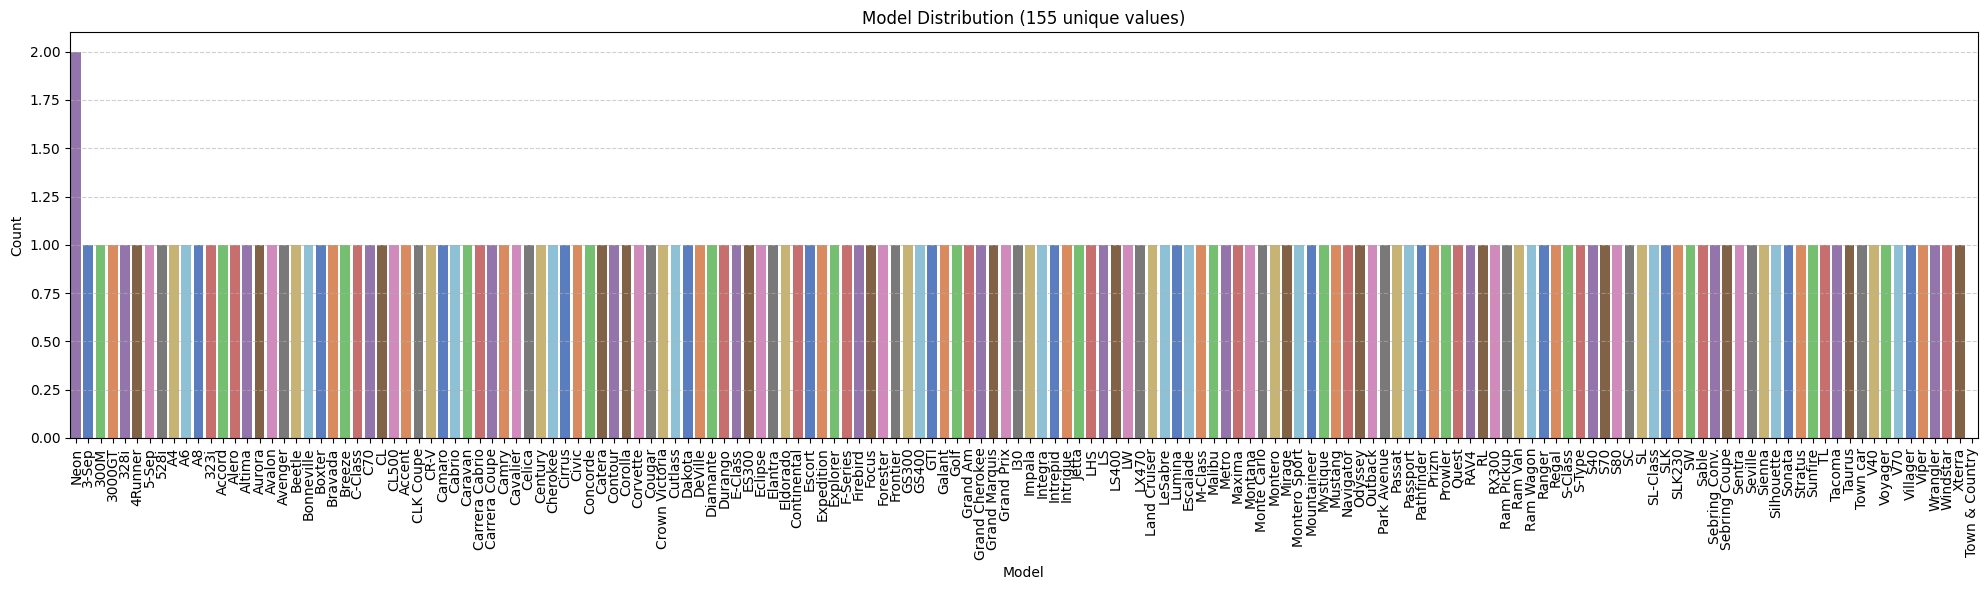


Column: Vehicle_type (Unique values: 2)


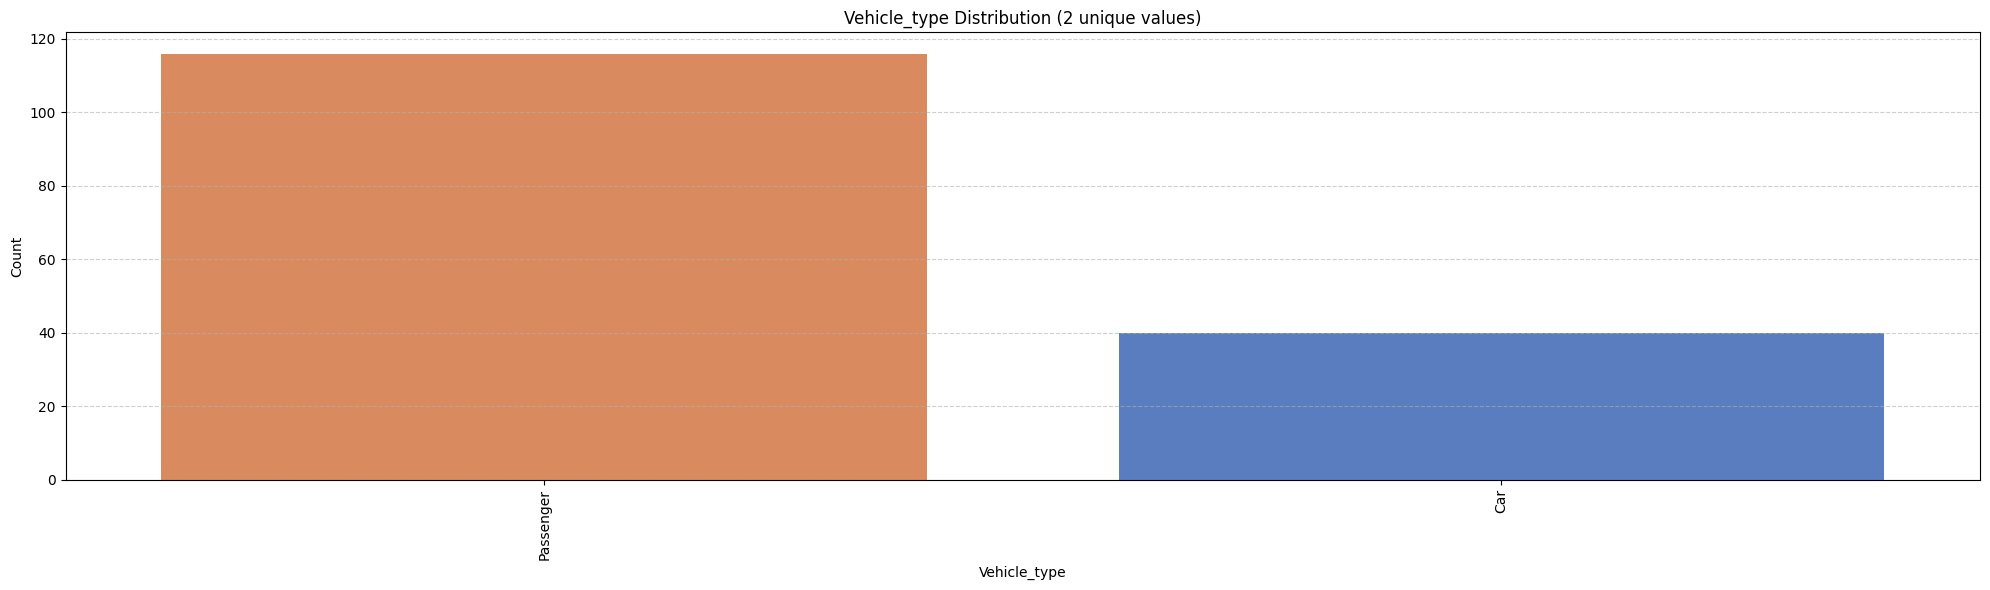

In [18]:
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f'\nColumn: {col} (Unique values: {unique_count})')
    plt.figure(figsize=(20,6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='muted', hue=col, dodge=False)
    plt.title(f'{col} Distribution ({unique_count} unique values)')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

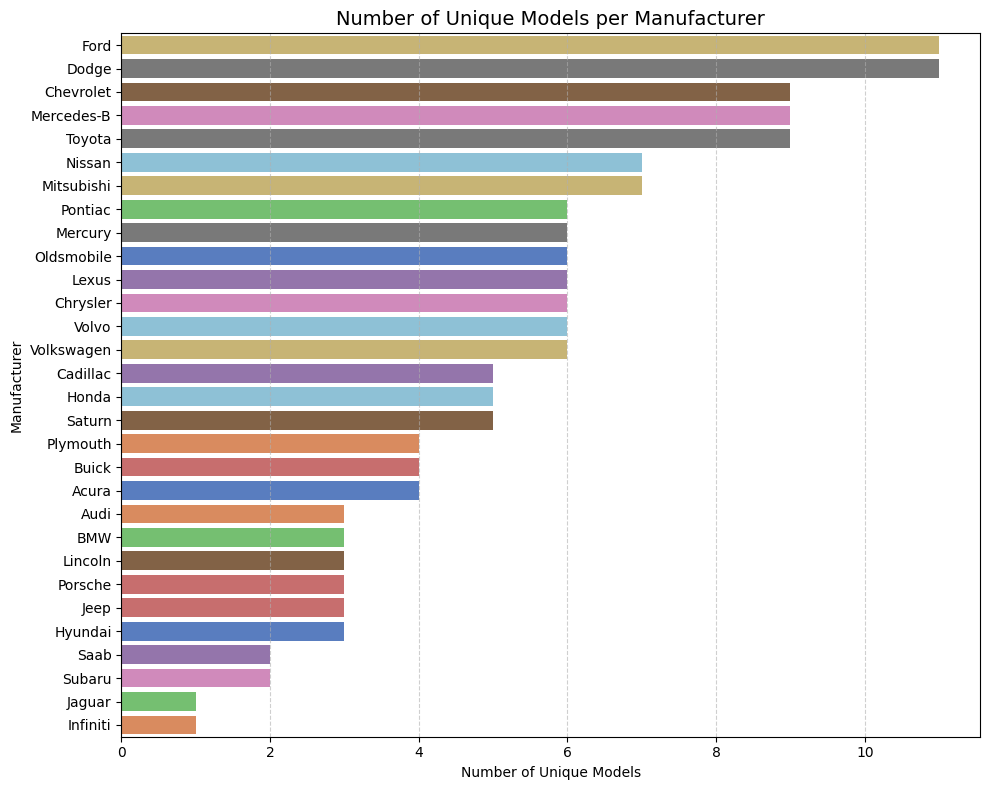

In [19]:
models_per_manufacturer = df.groupby('Manufacturer', observed=True)['Model'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(y=models_per_manufacturer.index, x=models_per_manufacturer.values, hue=models_per_manufacturer.index,
            order=models_per_manufacturer.index, palette='muted', legend=False, dodge=False)
plt.title('Number of Unique Models per Manufacturer', fontsize=14)
plt.xlabel('Number of Unique Models')
plt.ylabel('Manufacturer')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 5. Car Pricing Analysis

### 5.1 Average Price per Manufacturer

Analyzes how average vehicle price varies across manufacturers.

Highlights brands with premium vs. budget positioning.

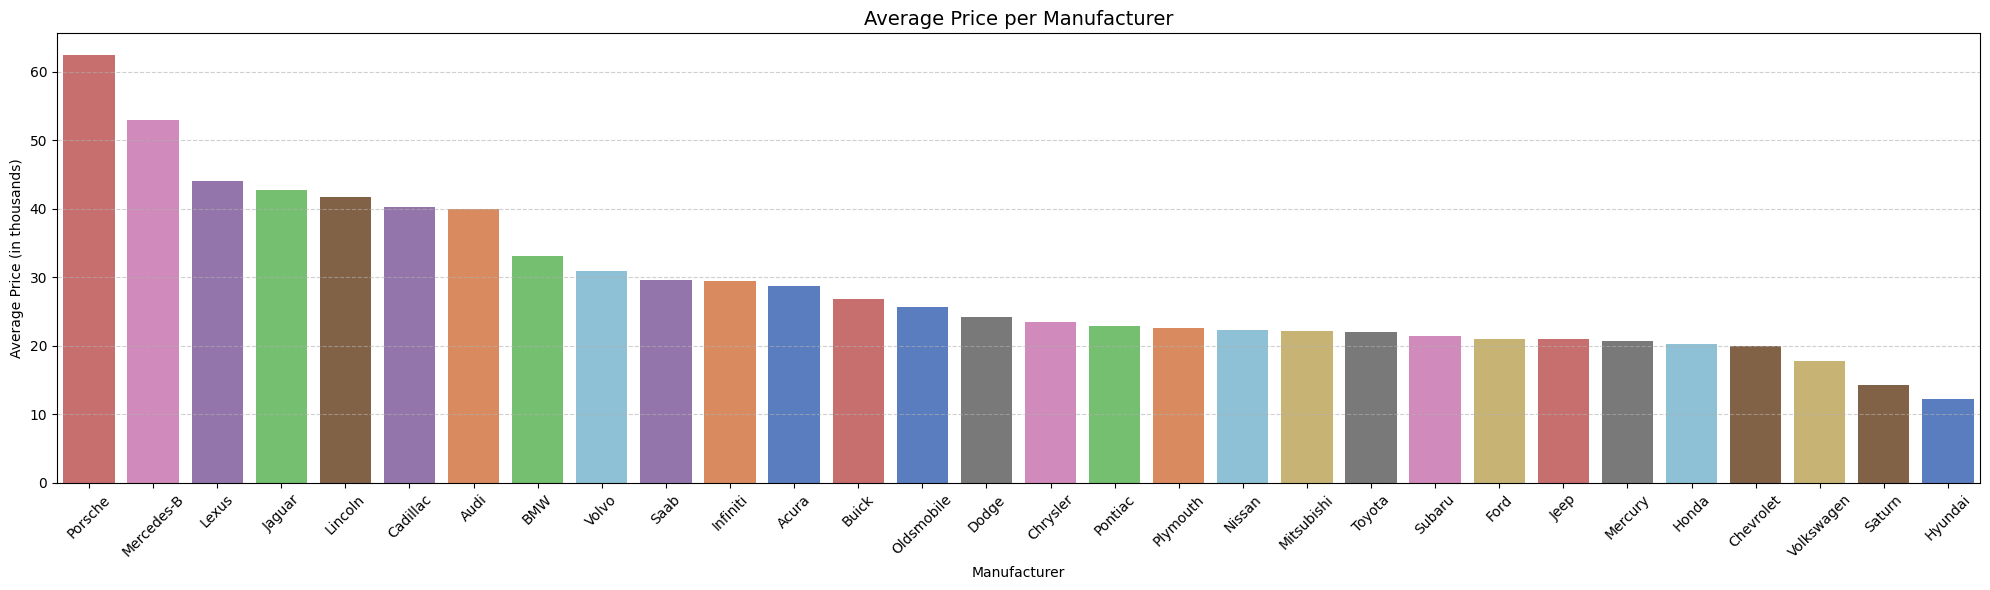

In [20]:
manufacturer_price_df = (df.groupby('Manufacturer', observed=True)['Price_in_thousands'].mean().sort_values(ascending=False).reset_index())

# Extract the sorted list of Manufacturer names for explicit order
manufacturer_order_list = manufacturer_price_df['Manufacturer']

plt.figure(figsize=(20,6))
sns.barplot(data=manufacturer_price_df, x='Manufacturer', y='Price_in_thousands', order=manufacturer_order_list,hue='Manufacturer', legend=False, palette='muted',dodge=False)
plt.xticks(rotation=45)
plt.title('Average Price per Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 5.2 Price Distribution by Vehicle Type

Examines how price levels differ between vehicle types.

Provides insight into pricing dispersion and market segmentation.

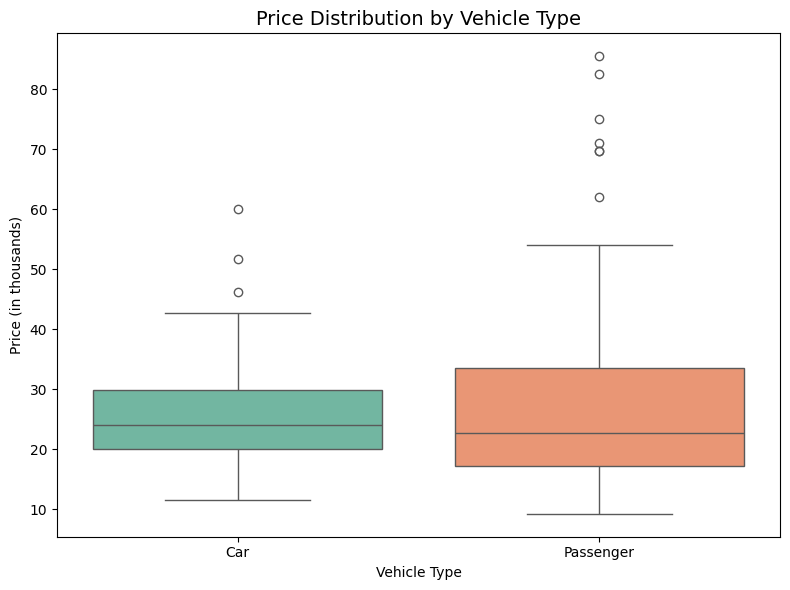

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Vehicle_type', y='Price_in_thousands', hue='Vehicle_type', palette='Set2', legend=False)
plt.title('Price Distribution by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Price (in thousands)')
plt.tight_layout()
plt.show()

### 5.3 Top 10 Most Expensive Models

Displays the top-priced models, showing manufacturer and model hierarchy in premium segments.

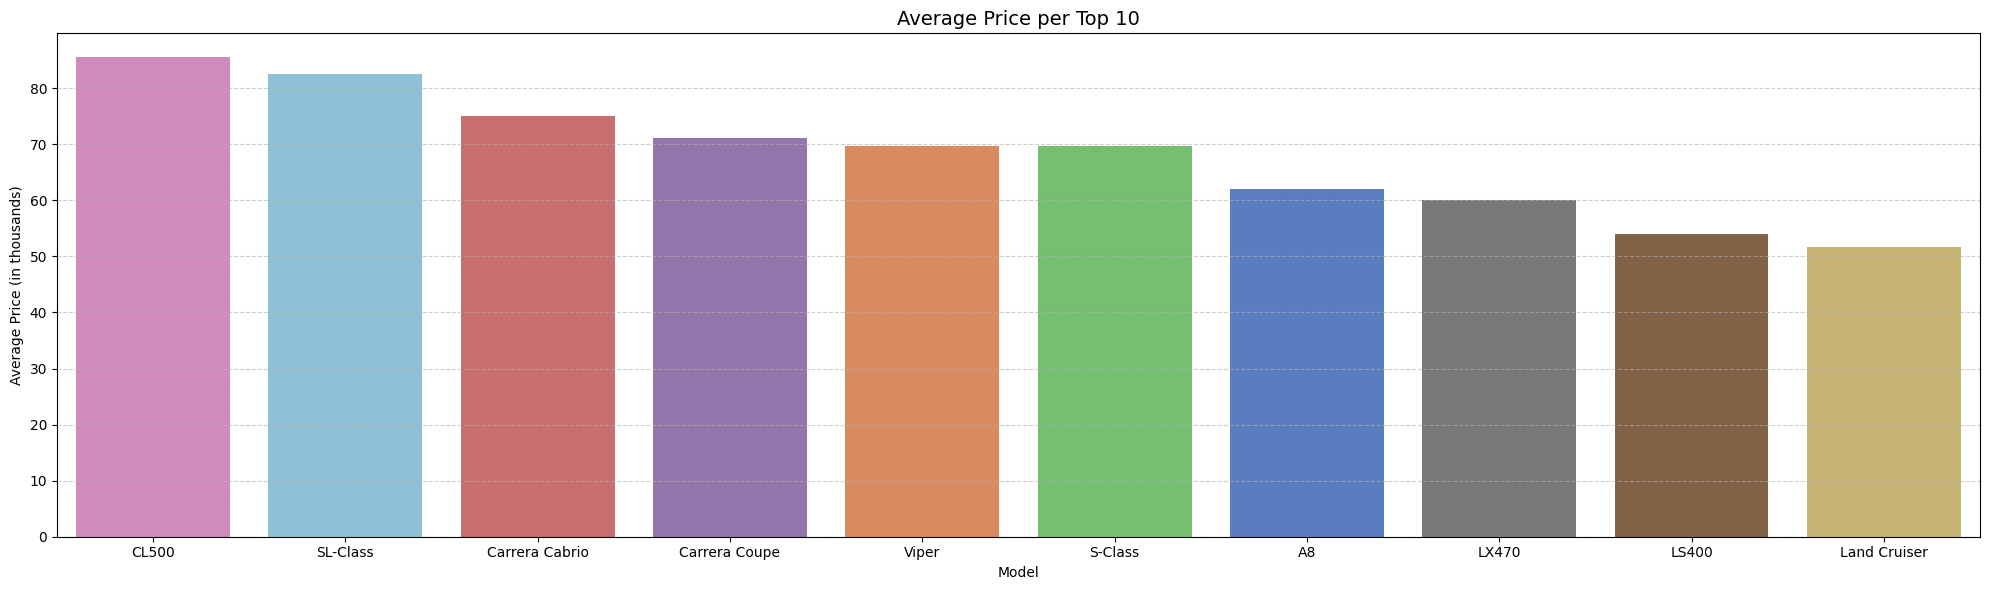

In [22]:
TOP_N_MODELS = 10

model_price_df = (df.groupby('Model', observed=True)['Price_in_thousands'].mean().sort_values(ascending=False).reset_index())
top_models_df = model_price_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

plt.figure(figsize=(20,6))
sns.barplot(data=top_models_df, x='Model', y='Price_in_thousands', hue='Model', order=model_order_list, palette='muted', legend=False, dodge=False)
plt.title(f'Average Price per Top {TOP_N_MODELS}', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Average Price (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 5.4 Correlation of Numeric Features with Price

Computes correlations between numeric variables and Price_in_thousands to identify which features most strongly drive pricing.

Only features with strong correlations will be explored further.

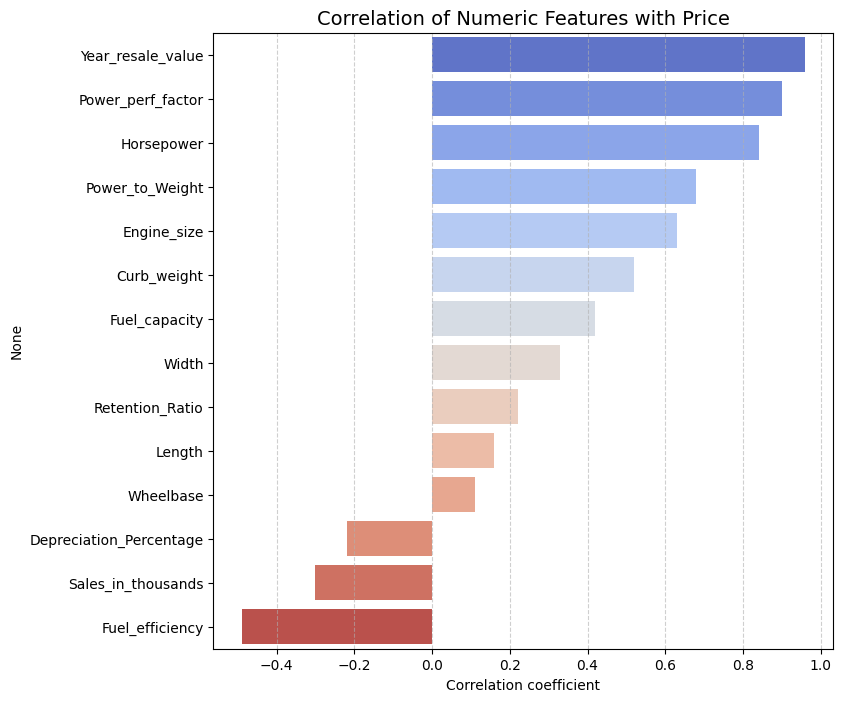

Selected price-driving features:
 ['Year_resale_value', 'Engine_size', 'Horsepower', 'Power_perf_factor', 'Power_to_Weight']


In [23]:
price_corr = corr_matrix_subset['Price_in_thousands'].drop('Price_in_thousands')
price_corr_sorted = price_corr.sort_values(ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(x=price_corr_sorted.values, y=price_corr_sorted.index, hue=price_corr_sorted.index, palette='coolwarm', legend=False, dodge=False)
plt.title('Correlation of Numeric Features with Price', fontsize=14)
plt.xlabel('Correlation coefficient')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

# Select features with |correlation| >= threshold
selected_price_features = price_corr[price_corr.abs() >= threshold].index.tolist()
print('Selected price-driving features:\n', selected_price_features)

#### 5.4.1 Performance Attributes vs Price

Evaluates how Engine Size, Horsepower, and other performance metrics affect price.

Helps quantify the value of performance in pricing decisions.

Performance features influencing price:
 ['Engine_size', 'Horsepower']


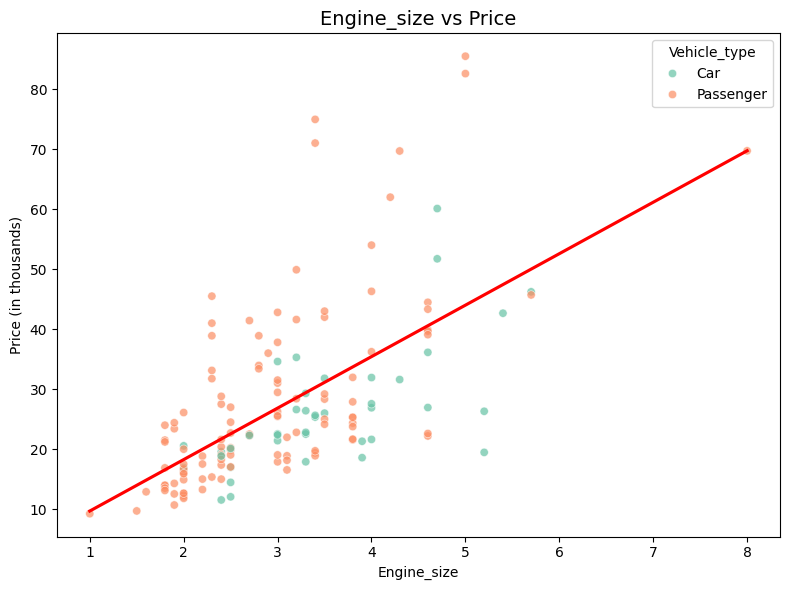

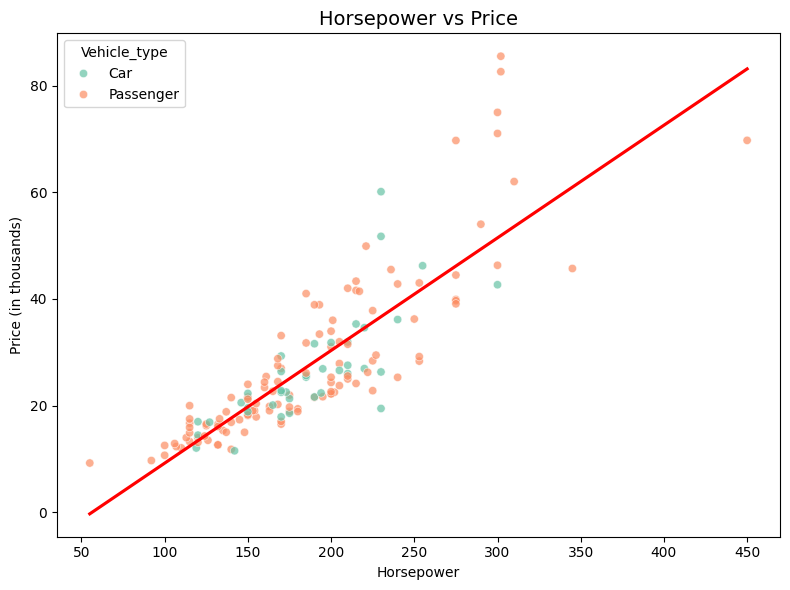

In [24]:
performance_price = [f for f in performance_features if f in selected_price_features]
print('Performance features influencing price:\n', performance_price)

if len(performance_price) > 0:
    for feature in performance_price:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x=feature, y='Price_in_thousands', alpha=0.7, hue='Vehicle_type', palette='Set2')
        sns.regplot(data=df, x=feature, y='Price_in_thousands', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Price', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Price (in thousands)')
        plt.tight_layout()
        plt.show()
else:
    print('No strongly correlated performance features found — skipping performance plots.')

#### 5.4.2 Design Attributes vs Price

Assesses relationships between design factors (Wheelbase, Width, Length, Curb Weight) and price.

Highlights how vehicle dimensions and build quality impact market value.

In [25]:
design_price = [f for f in design_features if f in selected_price_features]
print("Design features influencing price:\n", design_price)

if len(design_price) > 0:
    for feature in design_price:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x=feature, y='Price_in_thousands', hue='Vehicle_type',alpha=0.7, palette='Set2', legend=False)
        sns.regplot(data=df, x=feature, y='Price_in_thousands', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Price', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Price (in thousands)')
        plt.tight_layout()
        plt.show()
else:
    print("No strongly correlated design features found — skipping design plots.")

Design features influencing price:
 []
No strongly correlated design features found — skipping design plots.


## 5. Sales & Market Analysis

### 5.1 Total Sales by Manufacturer

Aggregates total vehicle sales per manufacturer, revealing market leaders and overall brand dominance.

Helps identify dominant market players and total sales volume distribution.

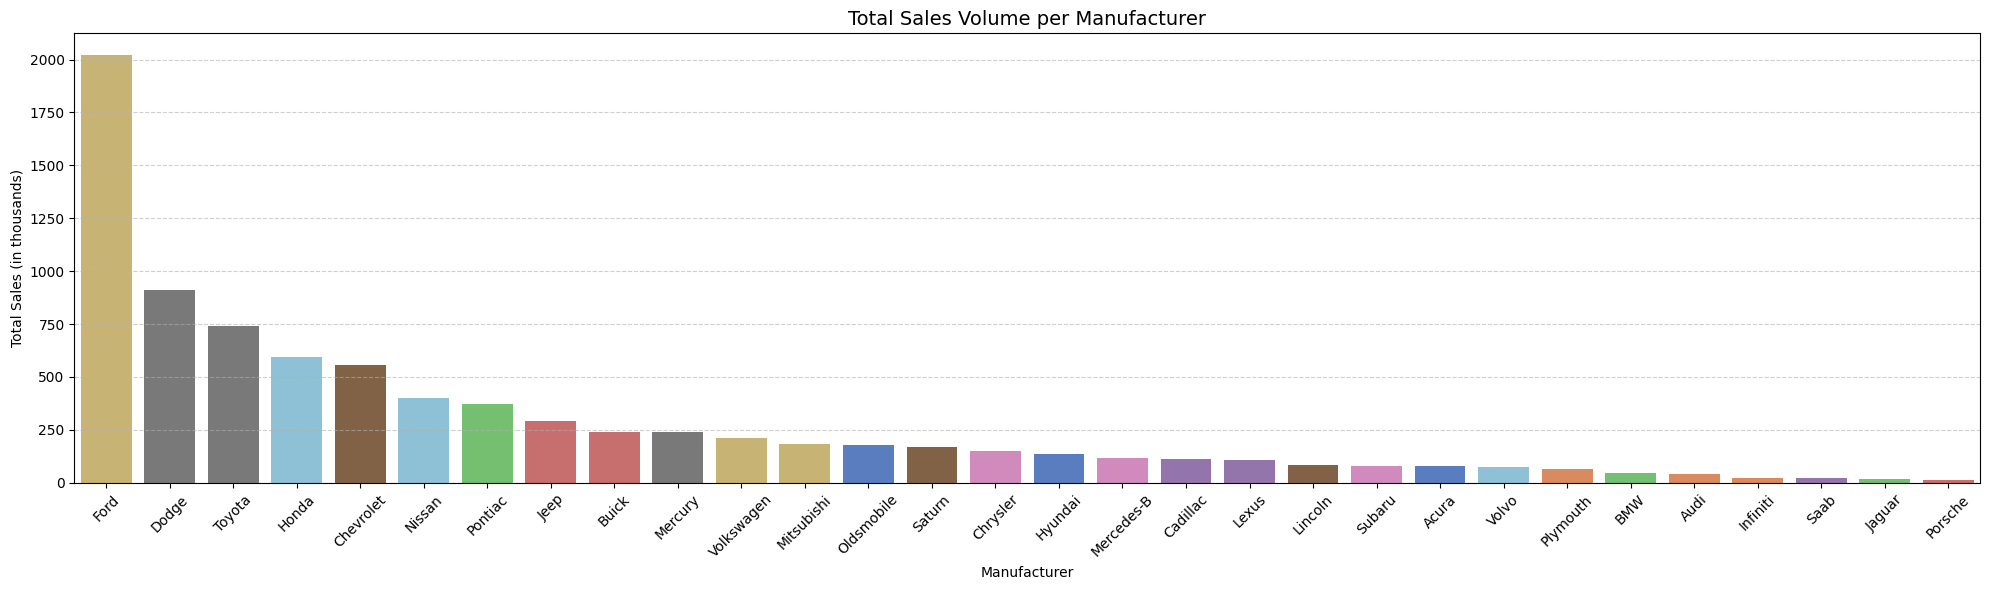

In [26]:
plt.figure(figsize=(20,6))
manufacturer_sales_df = (df.groupby('Manufacturer', observed=True)['Sales_in_thousands'].sum().sort_values(ascending=False).reset_index())
manufacturer_order_list = manufacturer_sales_df['Manufacturer']
sns.barplot(data=manufacturer_sales_df, x='Manufacturer', y='Sales_in_thousands', order=manufacturer_order_list,hue='Manufacturer', legend=False, palette='muted', dodge=False)
plt.xticks(rotation=45)
plt.title('Total Sales Volume per Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 5.2 Sales Distribution by Vehicle Type

Explores how sales volumes differ across vehicle categories, indicating demand preferences.

Useful for spotting whether certain categories of vehicle perform better in sales.

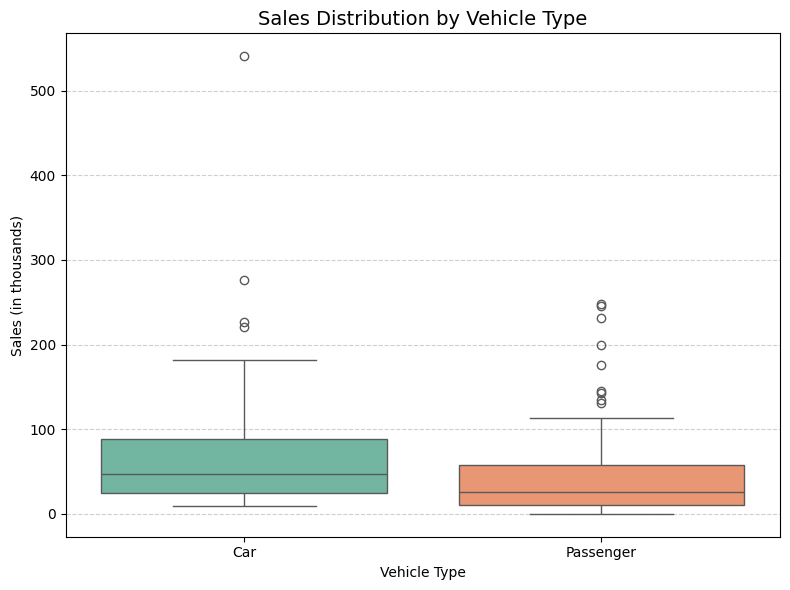

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Vehicle_type', y='Sales_in_thousands', hue='Vehicle_type', palette='Set2', legend=False) 
plt.title('Sales Distribution by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Sales (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 5.3 Top 10 Best-Selling Models

Highlights top-selling models to identify popular product lines in the market.

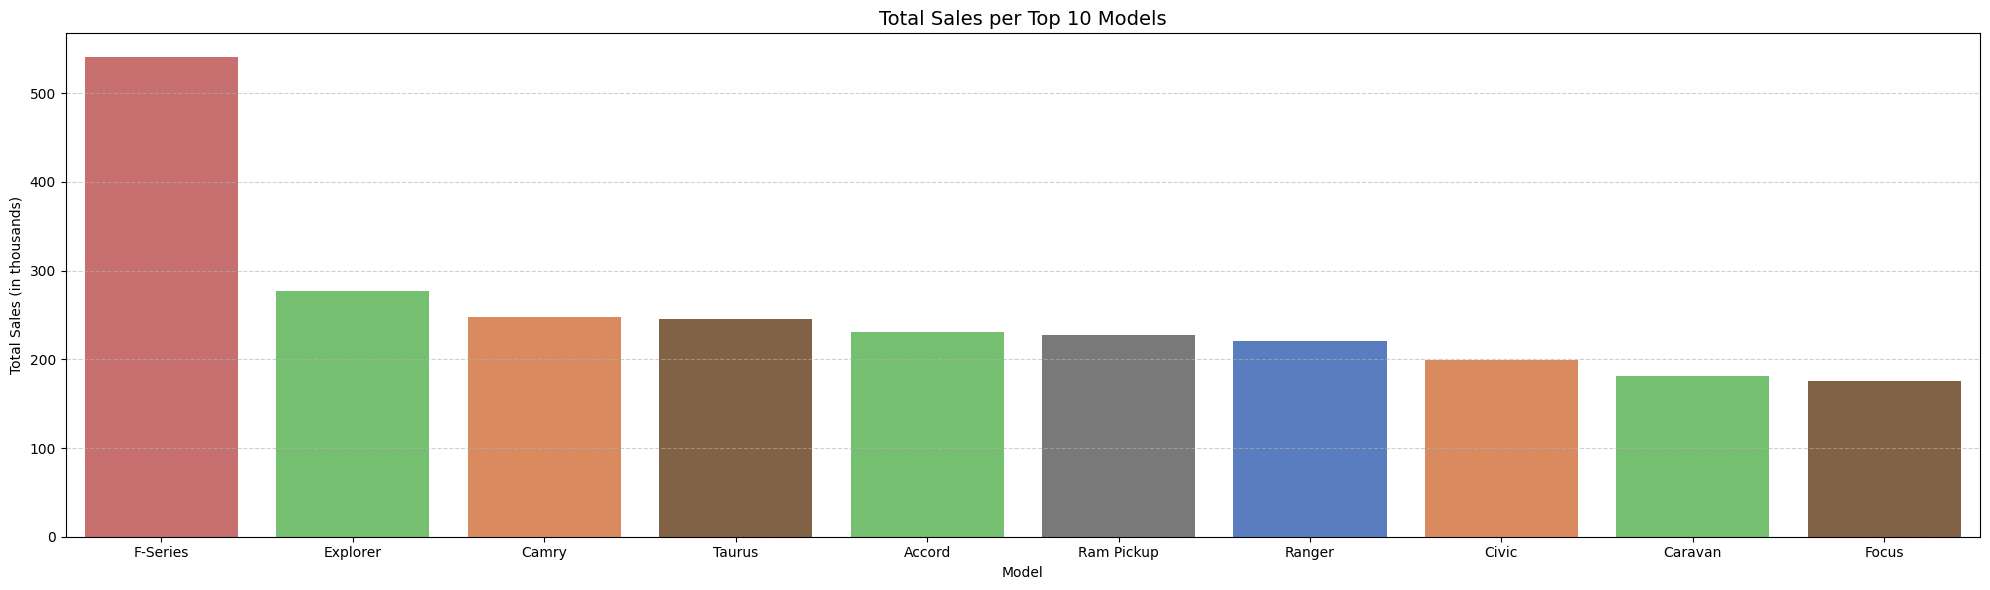

In [28]:
TOP_N_MODELS = 10

model_sales_df = (df.groupby('Model', observed=True)['Sales_in_thousands'].sum().sort_values(ascending=False).reset_index())
top_models_df = model_sales_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

plt.figure(figsize=(20,6))
sns.barplot(data=top_models_df, x='Model', y='Sales_in_thousands', hue='Model',order=model_order_list, palette='muted', legend=False, dodge=False)
plt.title(f'Total Sales per Top {TOP_N_MODELS} Models', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Total Sales (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 5.4 Correlation of Numeric Features with Sales

Analyzes which numeric factors (price, horsepower, fuel efficiency, etc.) correlate most strongly with sales providing insights into what drives market success.

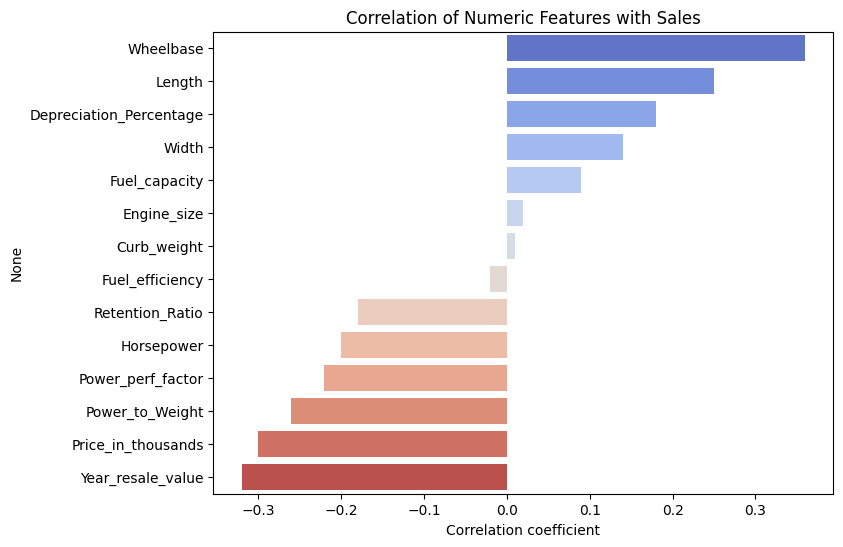

Selected sales-driving features: []


In [29]:
sales_corr = corr_matrix_subset['Sales_in_thousands'].drop('Sales_in_thousands')
sales_corr_sorted = sales_corr.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=sales_corr_sorted.values, y=sales_corr_sorted.index, hue=sales_corr_sorted.index, palette='coolwarm')
plt.title('Correlation of Numeric Features with Sales')
plt.xlabel('Correlation coefficient')
plt.show()

# Select features with |correlation| >= threshold
selected_sales_features = sales_corr[sales_corr.abs() >= threshold].index.tolist()
print("Selected sales-driving features:", selected_sales_features)

### 5.5 Price vs Sales Relationship

Examines the inverse or direct relationship between price and sales volume to understand affordability-driven demand dynamics.

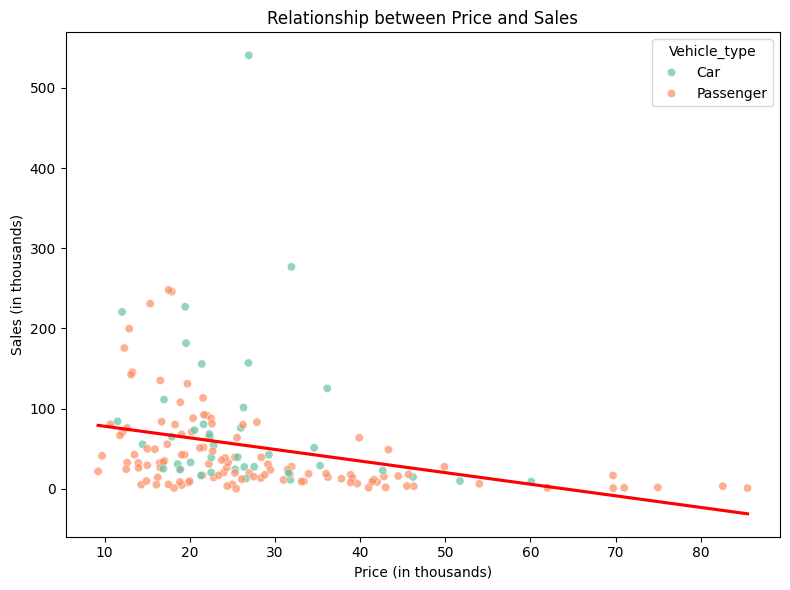

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', hue='Vehicle_type',alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Price_in_thousands', y='Sales_in_thousands', scatter=False, color='red', ci=None)
plt.title('Relationship between Price and Sales')
plt.xlabel('Price (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.tight_layout()
plt.show()

### 5.6 Fuel Efficiency vs Sales

Studies how Fuel Efficiency influences sales performance, highlighting consumer preference for economical or powerful vehicles.

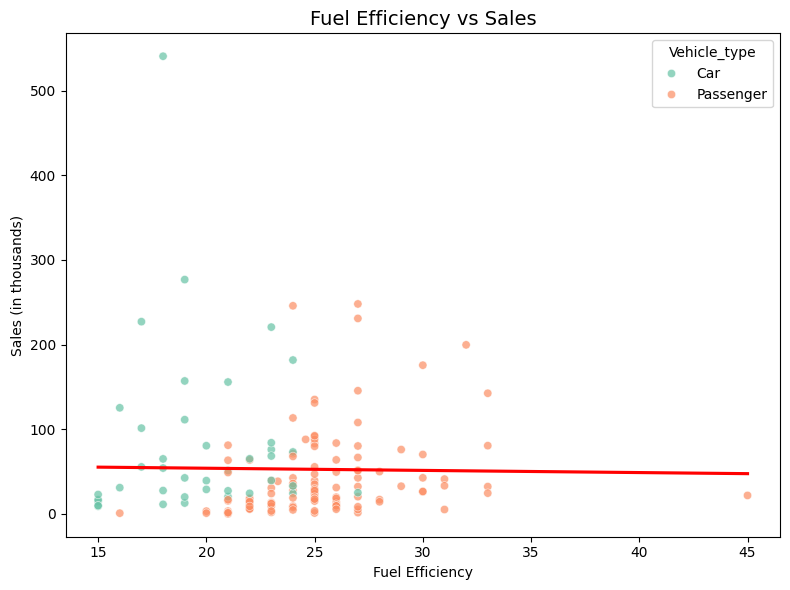

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Fuel_efficiency', y='Sales_in_thousands', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Fuel_efficiency', y='Sales_in_thousands', scatter=False, color='red', ci=None)
plt.title('Fuel Efficiency vs Sales', fontsize=14)
plt.xlabel('Fuel Efficiency')
plt.ylabel('Sales (in thousands)')
plt.tight_layout()
plt.show()

## 6. Resale & Depreciation Analysis

### 6.1 Depreciation Percentage vs Sales

Visualizes the relationship between Depreciation Percentage and sales, showing whether faster-selling vehicles retain value better.

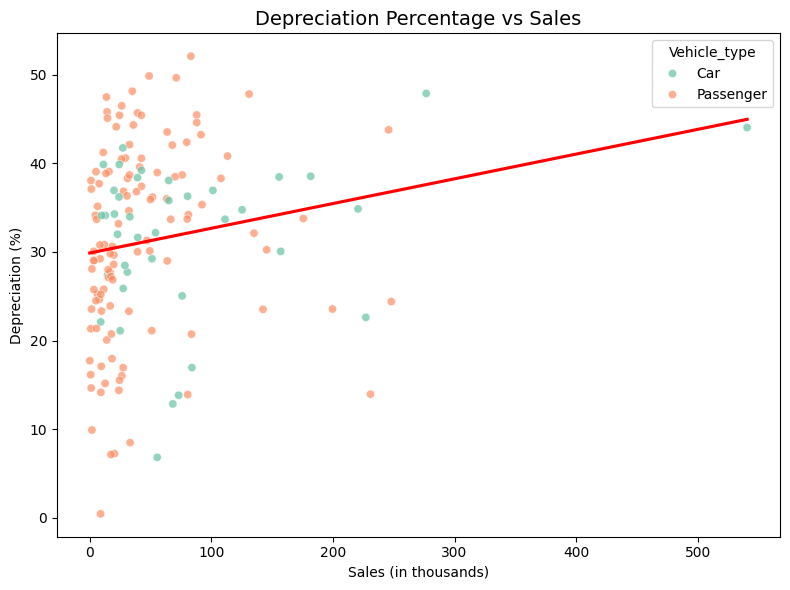

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales_in_thousands', y='Depreciation_Percentage', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Sales_in_thousands', y='Depreciation_Percentage', scatter=False, color='red', ci=None)
plt.title('Depreciation Percentage vs Sales', fontsize=14)
plt.xlabel('Sales (in thousands)')
plt.ylabel('Depreciation (%)') 
plt.tight_layout()
plt.show()

### 6.2 Depreciation by Manufacturer

This reveals how brand perception and vehicle class affect value retention.  

Luxury brands may have higher initial prices but often depreciate faster.

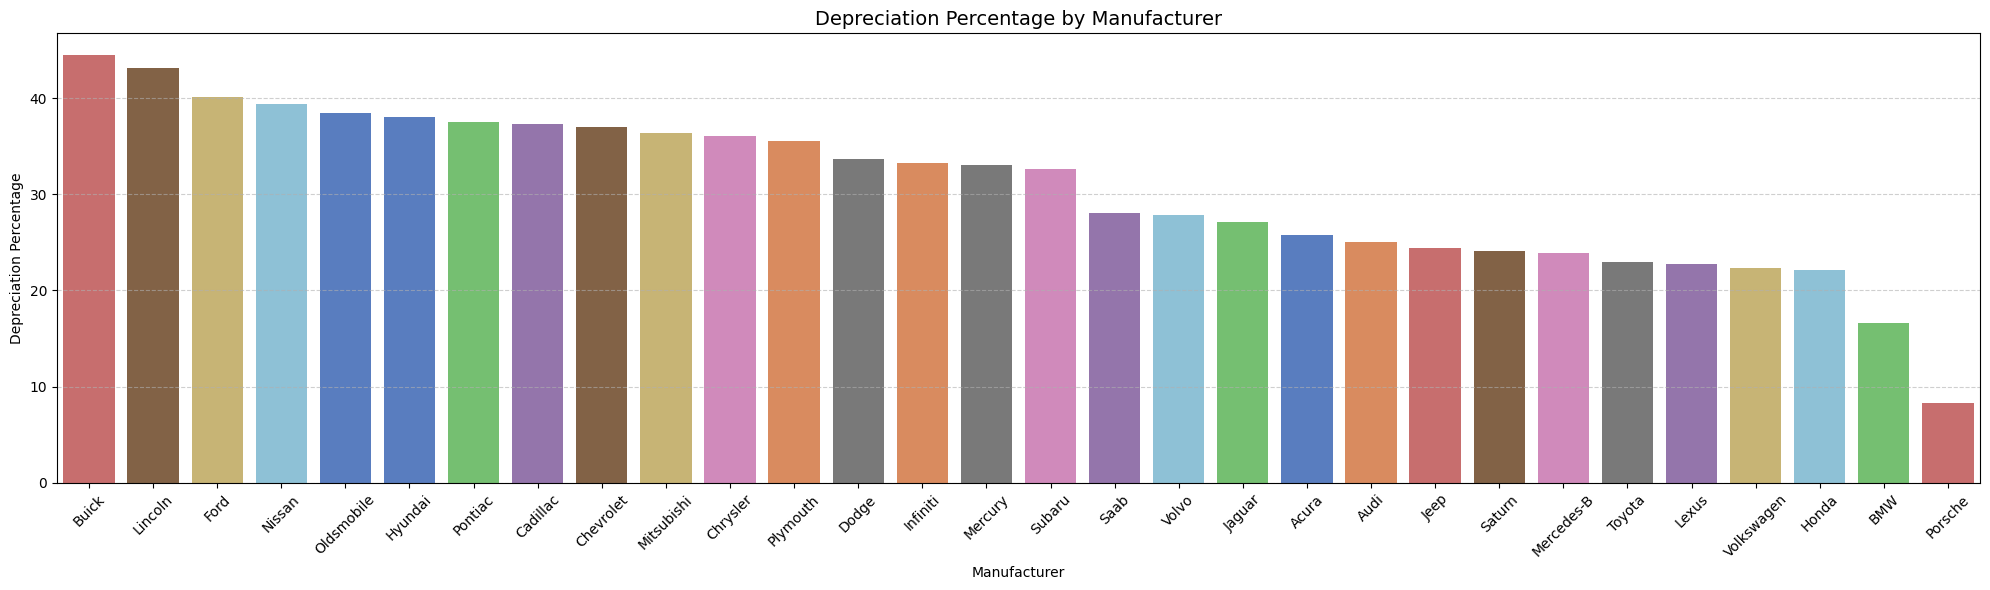

In [33]:
# Average Depreciation by Manufacturer

manufacturer_summary = (df.groupby('Manufacturer', observed=True)['Depreciation_Percentage'].mean().round(1).reset_index())
manufacturer_summary = manufacturer_summary.sort_values('Depreciation_Percentage', ascending=False)
manufacturer_order_list = manufacturer_summary['Manufacturer']

plt.figure(figsize=(20,6))
sns.barplot(data=manufacturer_summary, x='Manufacturer', y='Depreciation_Percentage', order=manufacturer_order_list,
            hue='Manufacturer', legend=False, palette='muted', dodge=False)

plt.xticks(rotation=45)
plt.title('Depreciation Percentage by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Depreciation Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 6.3 Depreciation by Vehicle Type

Shows average depreciation for each vehicle category, highlighting which vehicle types hold value best.

Average Depreciation (%) by Vehicle Type:


Vehicle_type  Depreciation_Percentage
0          Car                    31.53
1    Passenger                    31.29

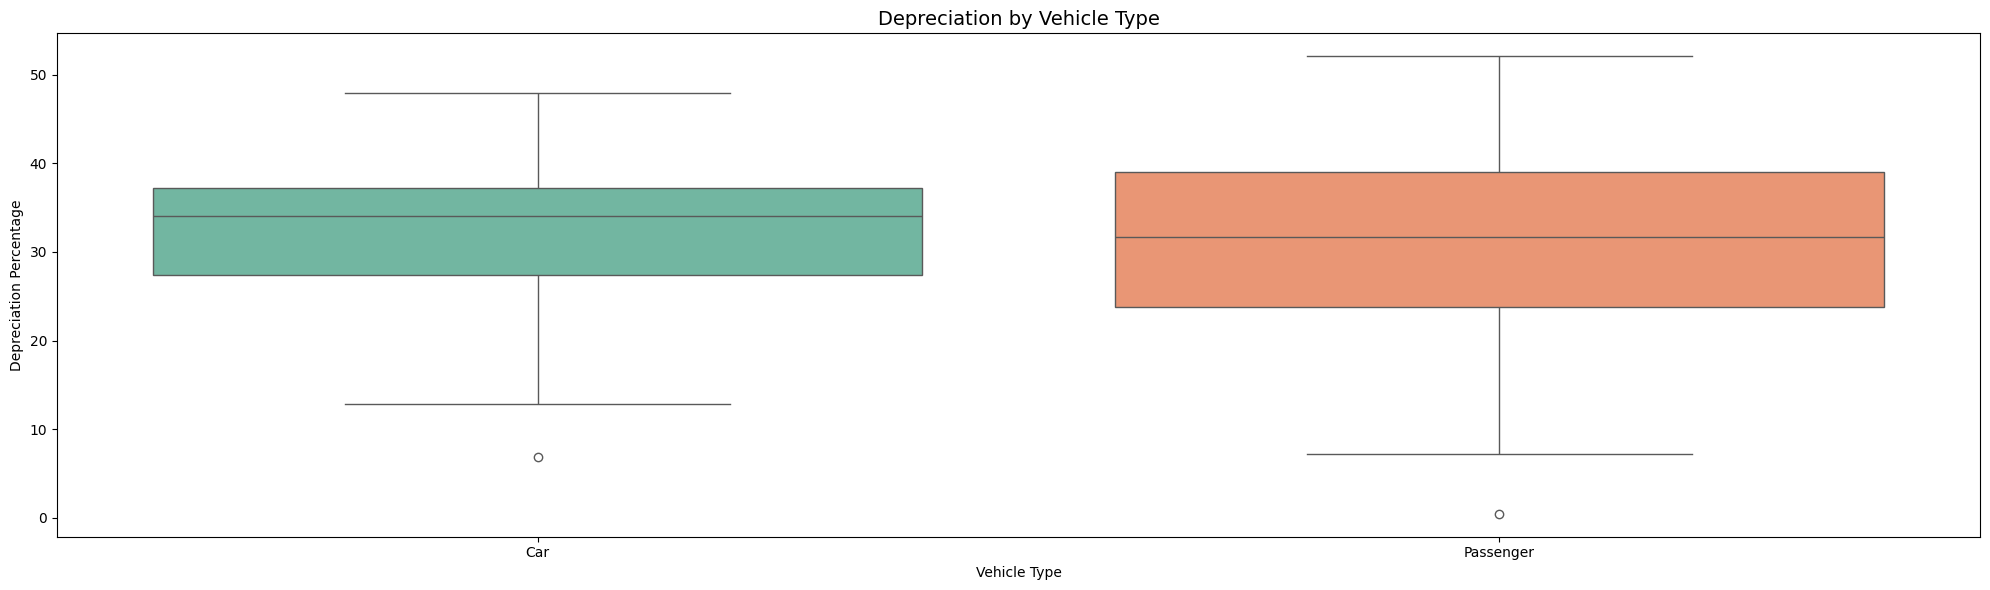

In [34]:
type_summary_df = (df.groupby('Vehicle_type', observed=True)['Depreciation_Percentage'].mean().round(2).reset_index()) 

print('Average Depreciation (%) by Vehicle Type:')
display(type_summary_df)

# Depreciation by Vehicle Type

plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='Vehicle_type', y='Depreciation_Percentage', hue='Vehicle_type', palette='Set2', legend=False)
plt.title('Depreciation by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Depreciation Percentage')
plt.tight_layout()
plt.show()

### 6.4 Correlation of Numeric Features with Resale Value

Identifies numeric features most strongly correlated with Year_resale_value, revealing the determinants of long-term retention.


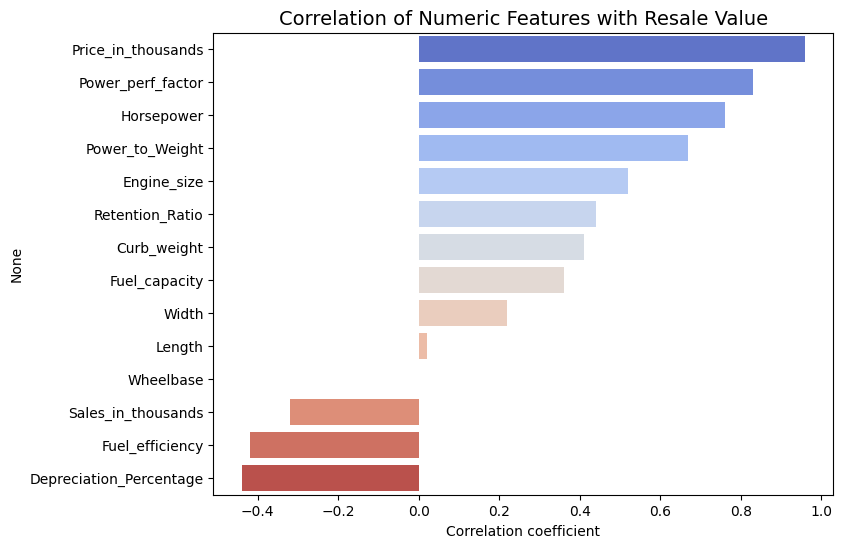

Selected resale-driving features:
 ['Price_in_thousands', 'Horsepower', 'Power_perf_factor', 'Power_to_Weight']


In [35]:
resales_corr = corr_matrix_subset["Year_resale_value"].drop("Year_resale_value")
resales_corr_sorted = resales_corr.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=resales_corr_sorted.values, y=resales_corr_sorted.index, hue=resales_corr_sorted.index, palette="coolwarm")
plt.title('Correlation of Numeric Features with Resale Value', fontsize=14)
plt.xlabel('Correlation coefficient')
plt.show()

# Select features with |correlation| >= threshold
selected_resale_features = resales_corr[resales_corr.abs() >= threshold].index.tolist()
print('Selected resale-driving features:\n', selected_resale_features)

#### 6.4.1 Performance vs Depreciation

Evaluates how Engine Size, Horsepower, and other performance attributes affect Depreciation Percentage.

Performance features influencing resale value: ['Horsepower']


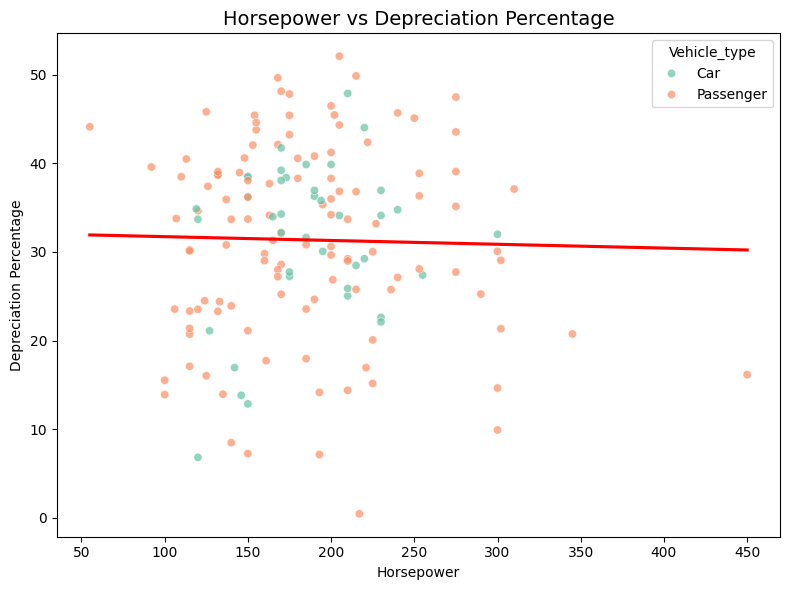

In [36]:
performance_resale = [f for f in performance_features if f in selected_resale_features]
print("Performance features influencing resale value:", performance_resale)

if len(performance_resale) > 0:
    for feature in performance_resale:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x=feature, y='Depreciation_Percentage', alpha=0.7, hue='Vehicle_type', palette='Set2')
        sns.regplot(data=df, x=feature, y='Depreciation_Percentage', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Depreciation Percentage', fontsize=14)
        plt.xlabel(feature)
        plt.ylabel('Depreciation Percentage')
        plt.tight_layout()
        plt.show()
else:
    print('No strongly correlated performance features found — skipping performance plots.')

#### 6.4.2 Design vs Depreciation

Analyzes how design elements (Curb Weight, Dimensions) correlate with depreciation, illustrating trade-offs between design and longevity.

In [37]:
design_resale = [f for f in design_features if f in selected_resale_features]
print("Design features influencing resale value:\n", design_resale)

if len(design_resale) > 0:
    for feature in design_resale:
        sns.scatterplot(data=df, x=feature, y='Depreciation_Percentage', hue='Vehicle_type',alpha=0.7, palette='Set2')
        sns.regplot(data=df, x=feature, y='Depreciation_Percentage', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Depreciation Percentage', fontsize=14)
        plt.xlabel('Fuel Efficiency')
        plt.ylabel('Resale Value (in thousands)')
        plt.tight_layout()
        plt.show()
else:
    print("No strongly correlated design features found — skipping design plots.")

Design features influencing resale value:
 []
No strongly correlated design features found — skipping design plots.


### 6.5 Fuel Efficiency vs Resale Value

Explores the relationship between Fuel Efficiency and Year Resale Value, assessing if more efficient cars hold value better.

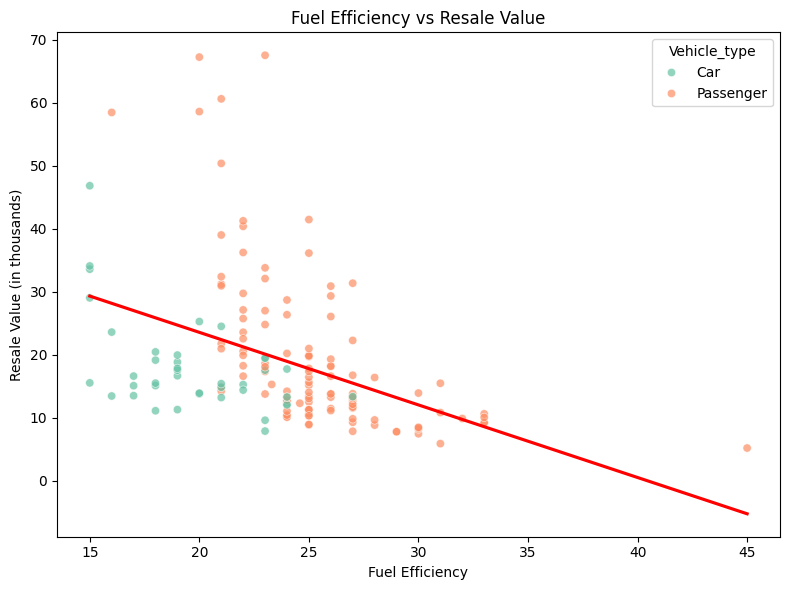

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Fuel_efficiency', y='Year_resale_value', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Fuel_efficiency', y='Year_resale_value', scatter=False, color='red', ci=None)
plt.title('Fuel Efficiency vs Resale Value')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Resale Value (in thousands)')
plt.tight_layout()
plt.show()

## 7. Fuel Efficiency Analysis

### 7.1 Average Fuel Efficiency by Manufacturer

Ranks manufacturers by their mean fuel efficiency, highlighting those leading in economical design.

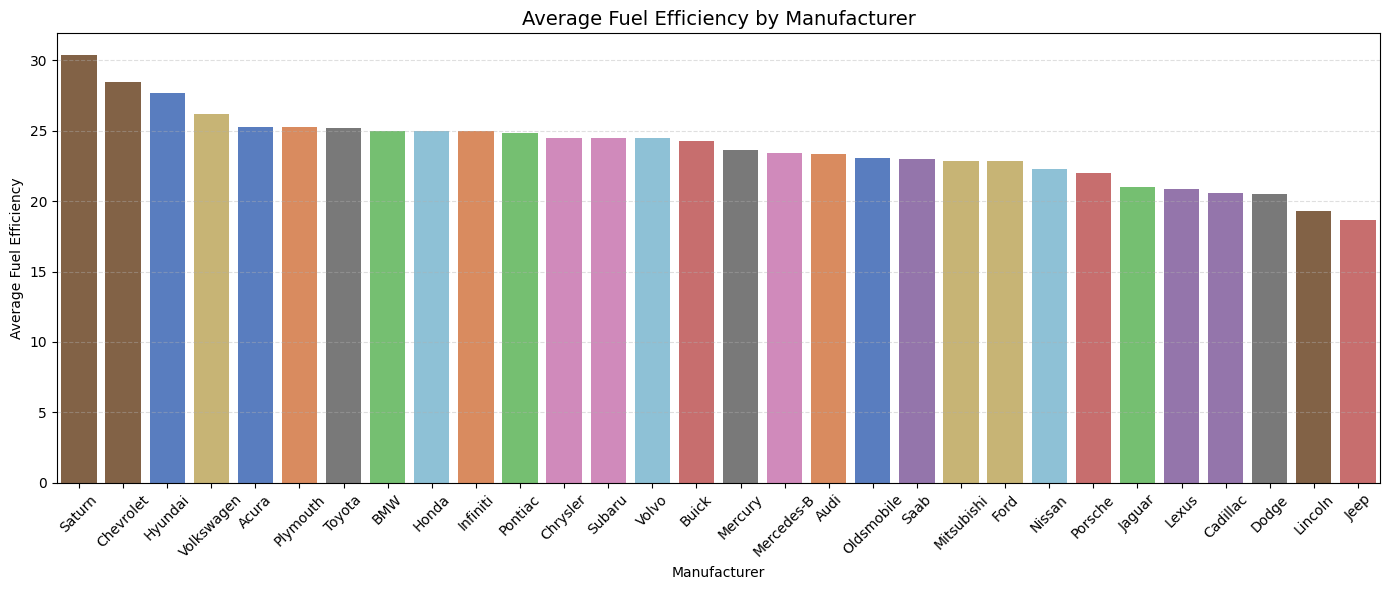

In [39]:
plt.figure(figsize=(14,6))
avg_fe = (df.groupby('Manufacturer', observed=True)['Fuel_efficiency'].mean().sort_values(ascending=False).reset_index())
sns.barplot(data=avg_fe, x='Manufacturer', y='Fuel_efficiency', order=avg_fe['Manufacturer'], hue='Manufacturer',palette='muted', dodge=False, legend=False)
plt.xticks(rotation=45)
plt.title('Average Fuel Efficiency by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Average Fuel Efficiency')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 7.2 Top 10 Most Fuel-Efficient Models

Lists the most efficient models, emphasizing top-performing designs in economy.

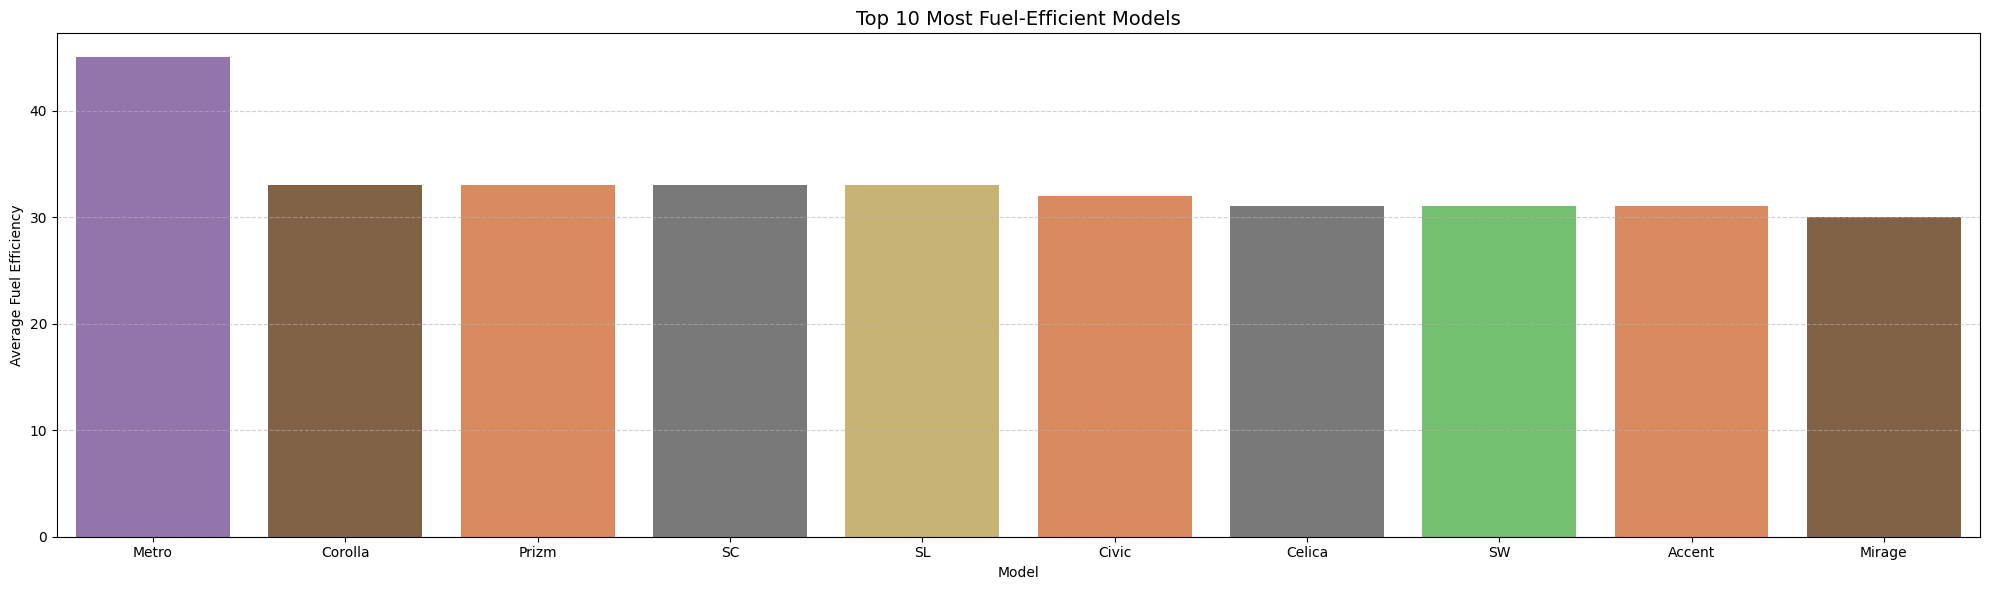

In [40]:
TOP_N_MODELS = 10

model_efficiency_df = (df.groupby('Model', observed=True)['Fuel_efficiency'].mean().sort_values(ascending=False).reset_index())
top_models_df = model_efficiency_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

plt.figure(figsize=(20,6))
sns.barplot(data=top_models_df, x='Model', y='Fuel_efficiency', hue='Model', order=model_order_list, palette='muted', dodge=False, legend=False)
plt.title(f'Top {TOP_N_MODELS} Most Fuel-Efficient Models', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Average Fuel Efficiency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 7.3 Power Performance Factor vs Key Targets

Assesses how Power_perf_factor relates to price, sales, and resale value.

Examines the balance between performance and commercial success.

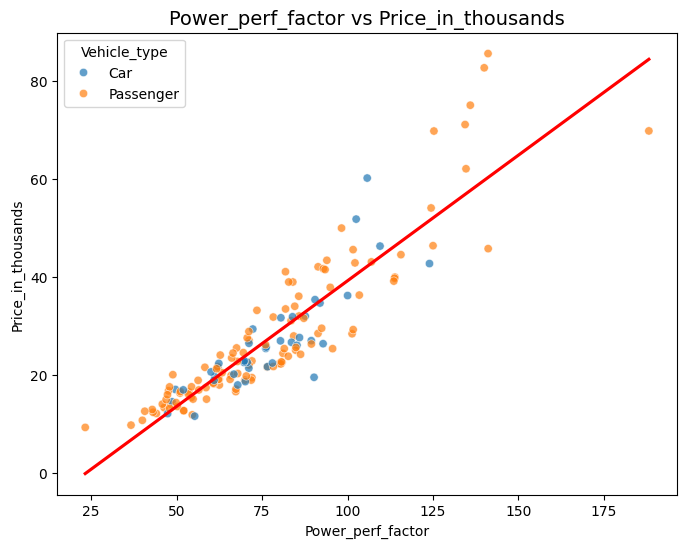

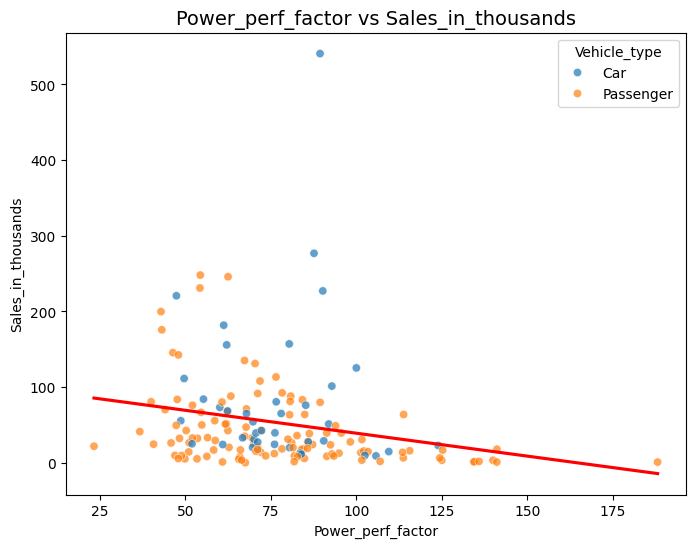

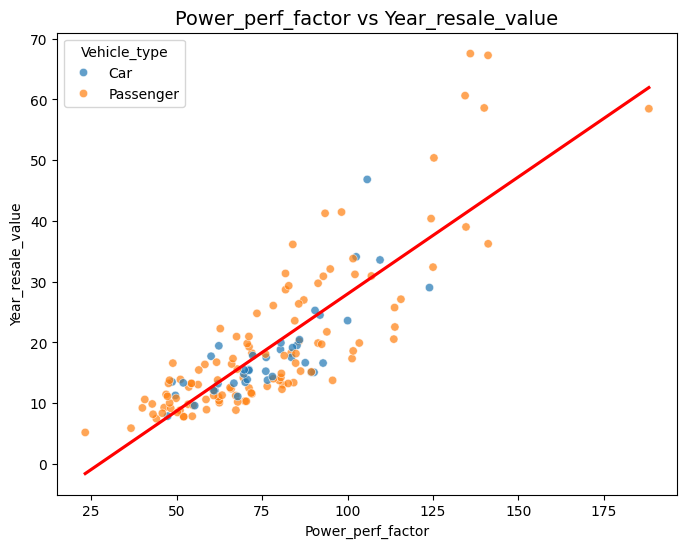

In [41]:
targets = ['Price_in_thousands', 'Sales_in_thousands', 'Year_resale_value']

for target in targets:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Power_perf_factor', hue='Vehicle_type', y=target, alpha=0.7)
    sns.regplot(data=df, x='Power_perf_factor', y=target, scatter=False, color='red', ci=None)
    plt.title(f'Power_perf_factor vs {target}', fontsize=14)
    plt.xlabel('Power_perf_factor')
    plt.ylabel(target)
    plt.show()

## 8. Performance & Design Characteristics

We start by exploring the engineering aspects that define vehicle capability — including relationships between **engine size**, **horsepower**, **power-to-weight ratio**, and **fuel efficiency**.

These analyses reveal the performance–efficiency trade-offs that influence pricing and buyer perception.

### 8.1 Engine Size vs Horsepower

A foundational performance relationship — larger engines generally yield higher horsepower, but the slope varies by vehicle type.

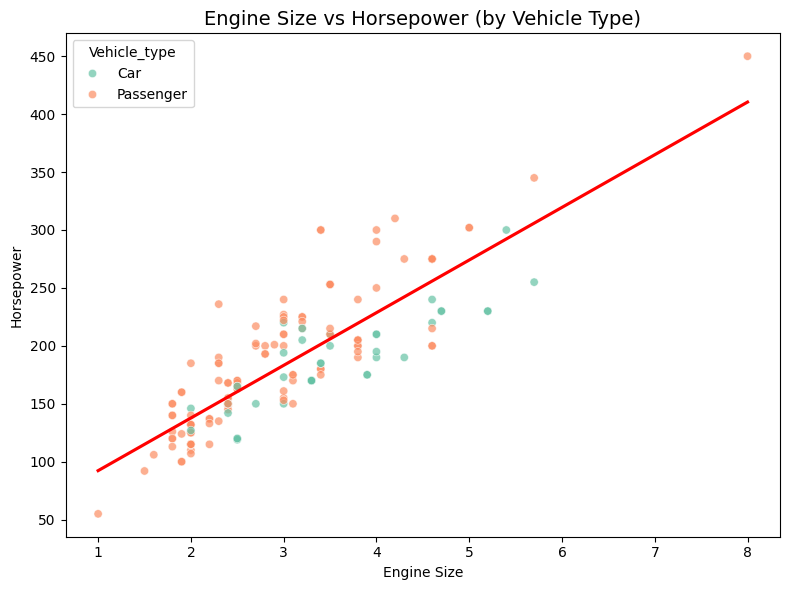

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Engine_size', y='Horsepower', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Engine_size', y='Horsepower', scatter=False, color='red', ci=None)
plt.title('Engine Size vs Horsepower (by Vehicle Type)', fontsize=14)
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.tight_layout()
plt.show()

### 8.2 Power-to-Weight Ratio vs Price

The power-to-weight ratio measures how much power a vehicle generates per unit of weight —  a strong proxy for acceleration and performance.

This plot shows how performance scales with pricing across market segments.

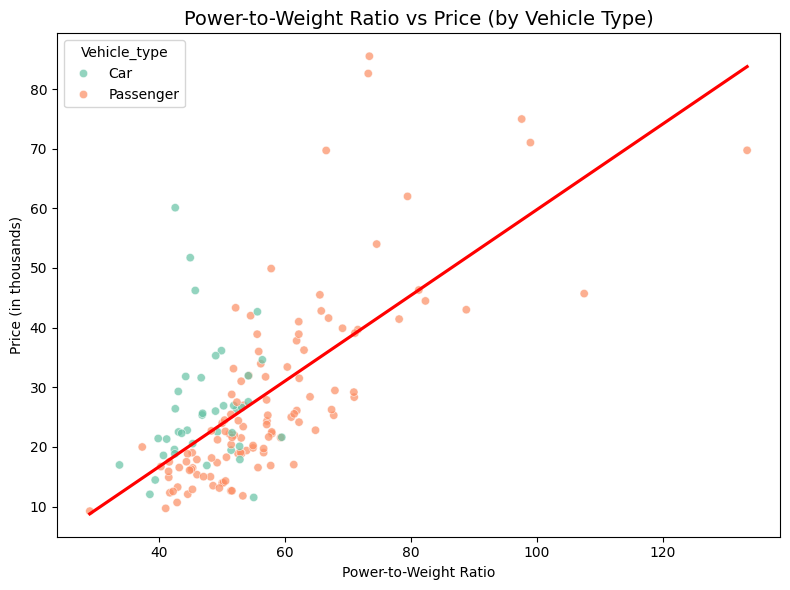

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Power_to_Weight', y='Price_in_thousands', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Power_to_Weight', y='Price_in_thousands', scatter=False, color='red', ci=None)
plt.title('Power-to-Weight Ratio vs Price (by Vehicle Type)', fontsize=14)
plt.xlabel('Power-to-Weight Ratio')
plt.ylabel('Price (in thousands)')
plt.tight_layout()
plt.show()

### 8.3 Power-to-Weight Ratio vs Fuel Efficiency

Higher power-to-weight ratios often come at the expense of fuel efficiency — illustrating the design trade-off between performance and economy.

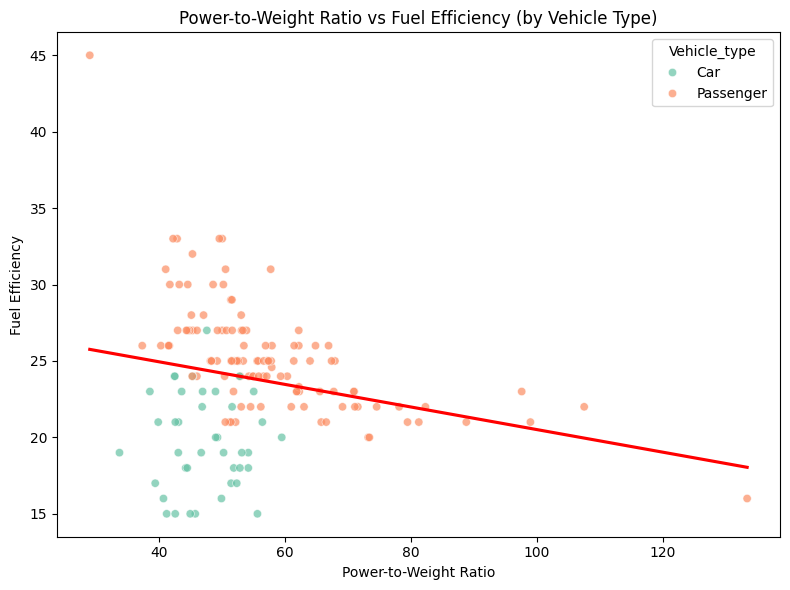

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Power_to_Weight', y='Fuel_efficiency', hue='Vehicle_type', alpha=0.7, palette='Set2')
sns.regplot(data=df, x='Power_to_Weight', y='Fuel_efficiency', scatter=False, color='red', ci=None)
plt.title('Power-to-Weight Ratio vs Fuel Efficiency (by Vehicle Type)')
plt.xlabel('Power-to-Weight Ratio')
plt.ylabel('Fuel Efficiency')
plt.tight_layout()
plt.show()

## 9. Pricing & Resale Analysis

In this section, we connect engineering attributes to **market outcomes** — examining how manufacturer reputation, vehicle type, and performance impact resale value and depreciation.

### 9.2 Average Resale Value by Model & Manufacturer

Analyzing resale performance across top-selling models and manufacturers helps identify which vehicles command stronger resale prices — a key factor in long-term value.

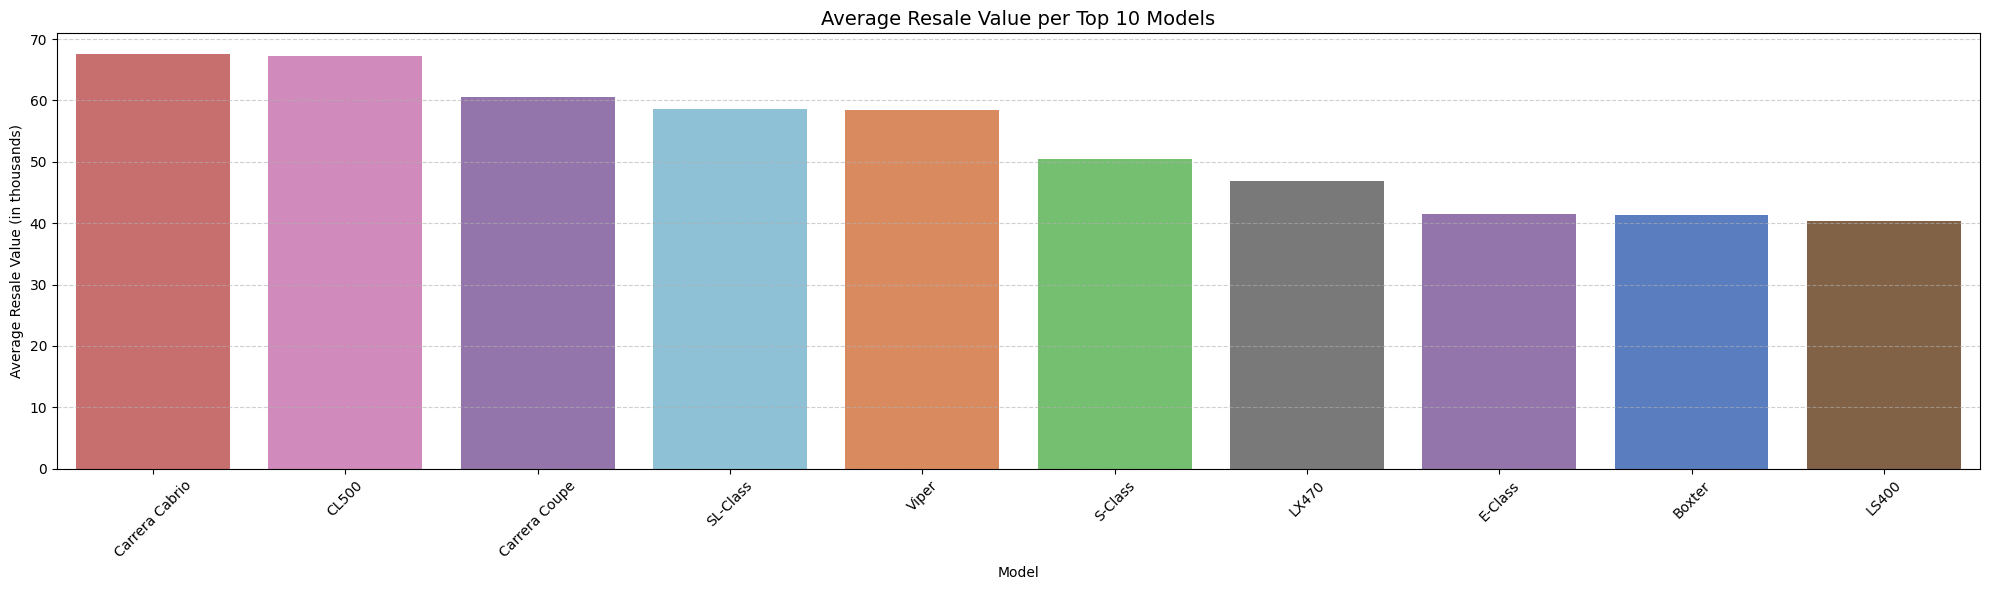

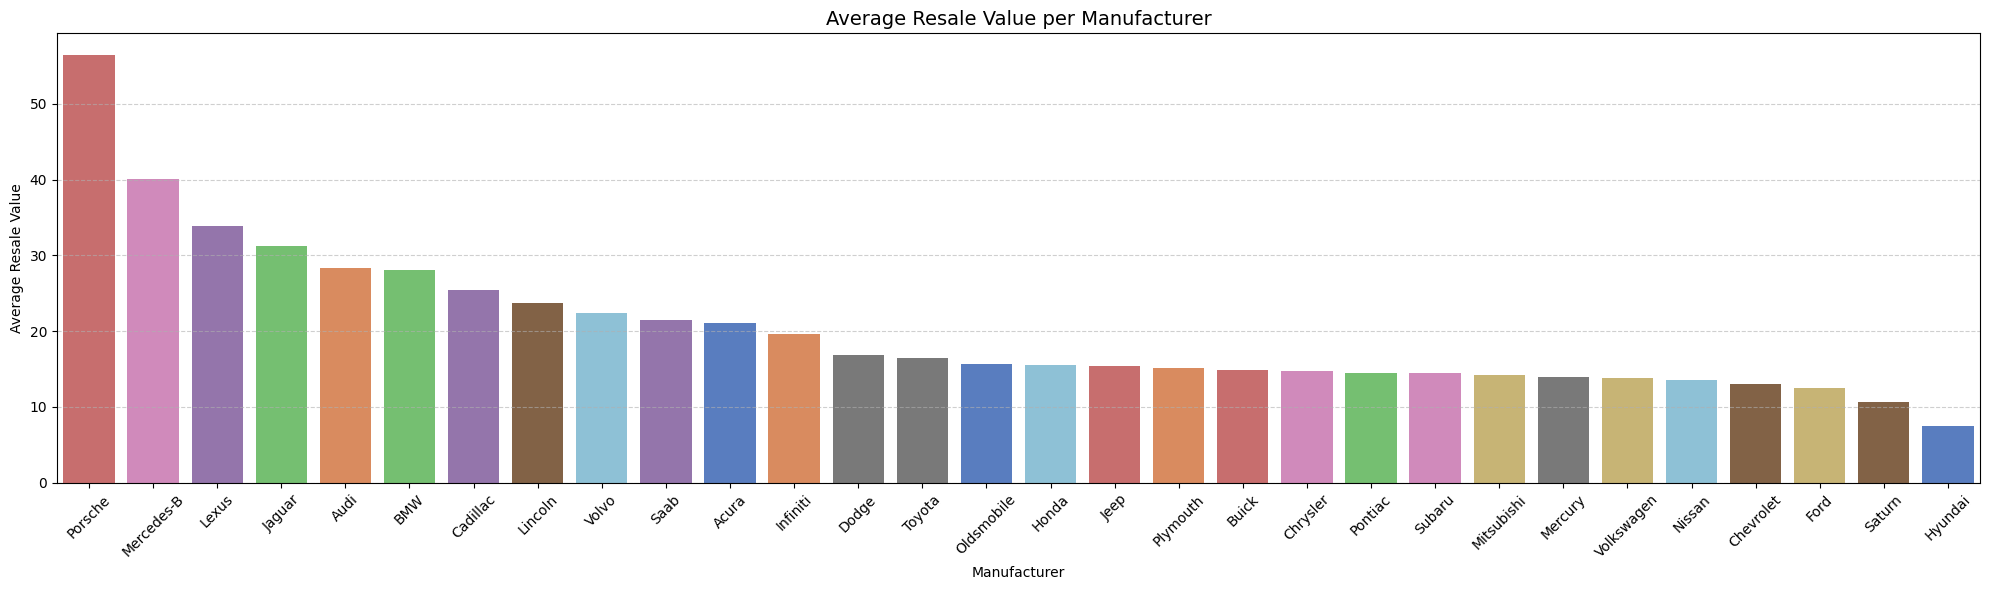

In [45]:
# Top N Models with Highest Resale Values

TOP_N_MODELS = 10

model_resale_df = (df.groupby('Model', observed=True)['Year_resale_value']
                   .mean().sort_values(ascending=False).reset_index())

top_models_df = model_resale_df.head(TOP_N_MODELS)
model_order_list = top_models_df['Model']

plt.figure(figsize=(20,6))
sns.barplot(data=top_models_df, x='Model', y='Year_resale_value', hue='Model',
            order=model_order_list, palette='muted', dodge=False)
plt.xticks(rotation=45)
plt.title(f'Average Resale Value per Top {TOP_N_MODELS} Models', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Average Resale Value (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Average Resale Value per Manufacturer

plt.figure(figsize=(20,6))
manufacturer_resale_df = (df.groupby('Manufacturer', observed=True)['Year_resale_value']
                          .mean().sort_values(ascending=False).reset_index())
manufacturer_order_list = manufacturer_resale_df['Manufacturer']

sns.barplot(data=manufacturer_resale_df, x='Manufacturer', y='Year_resale_value',
            order=manufacturer_order_list, hue='Manufacturer', legend=False, palette='muted', dodge=False)
plt.xticks(rotation=45)
plt.title('Average Resale Value per Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Average Resale Value')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 9.3 Value Retention & Depreciation Comparison

The **Retention Ratio** measures how much of a vehicle’s original price is preserved in resale.  

We also compare the top 10 “value retainers” with the highest resale stability against the “value losers” with steep depreciation.

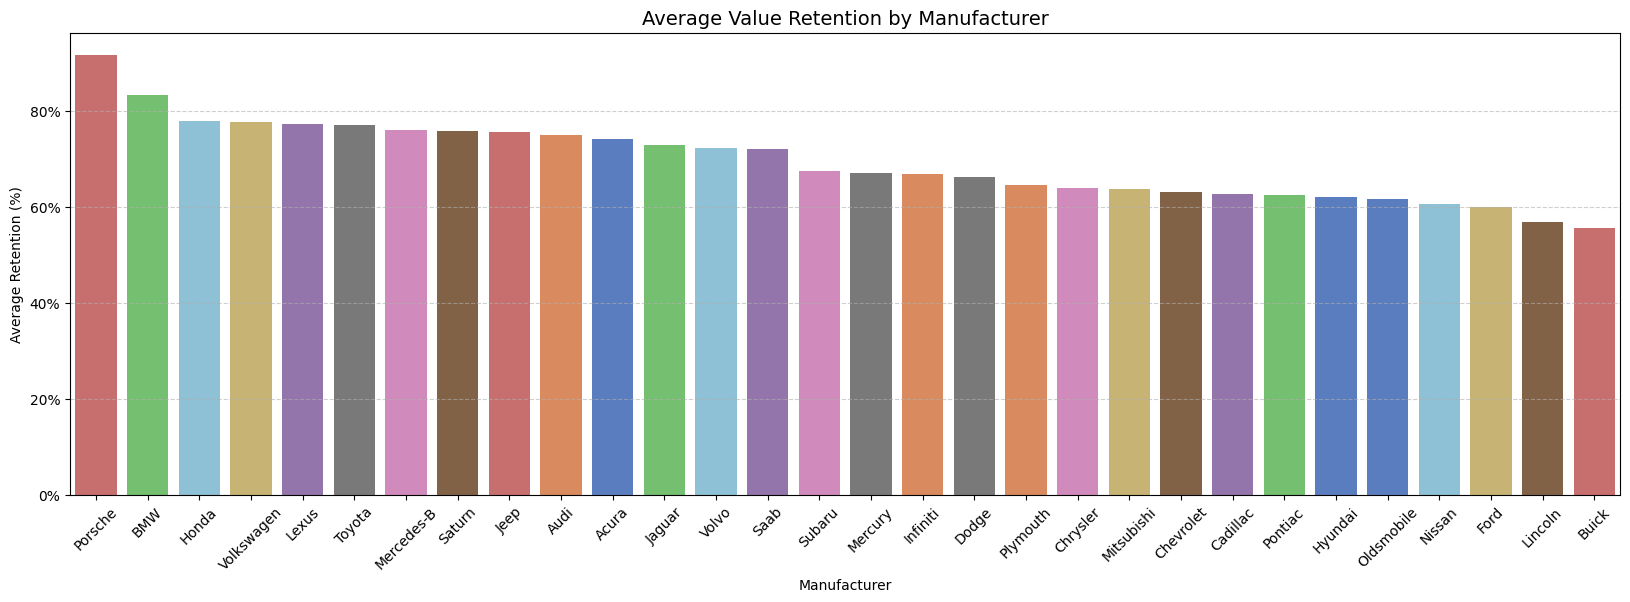

'Top 10 Retainers:'

Manufacturer           Model Vehicle_type  Depreciation_Percentage  \
124      Porsche          Boxter    Passenger                 0.434468   
67          Jeep        Wrangler          Car                 6.811895   
9            BMW            528i    Passenger                 7.133676   
4           Audi              A4    Passenger                 7.232180   
139       Toyota          Celica    Passenger                 8.474074   
126      Porsche  Carrera Cabrio    Passenger                 9.897292   
143       Toyota         4Runner          Car                12.845477   
59         Honda            CR-V          Car                13.819951   
129       Saturn              SL    Passenger                13.897988   
58         Honda          Accord    Passenger                13.941368   

     Year_resale_value  
124             41.250  
67              13.475  
9               36.125  
4               22.255  
139             15.445  
126             67.550  
143             19.425  
59              17.710  
129              9.200  
58              13.210

'Top 10 Losers:'

Manufacturer        Model Vehicle_type  Depreciation_Percentage  \
13         Buick      LeSabre    Passenger                52.088937   
77       Lincoln     Town car    Passenger                49.861528   
37         Dodge      Stratus    Passenger                49.653979   
48          Ford      Contour    Passenger                48.136190   
52          Ford     Explorer          Car                47.886001   
119      Pontiac     Grand Am    Passenger                47.819473   
76       Lincoln  Continental    Passenger                47.479529   
23     Chevrolet       Camaro    Passenger                46.487264   
86       Mercury     Mystique    Passenger                45.812808   
11         Buick        Regal    Passenger                45.691700   

     Year_resale_value  
13              13.360  
77              21.725  
37              10.185  
48               8.835  
52              16.640  
119             10.290  
76              20.525  
23              13.025  
86               8.800  
11              13.740

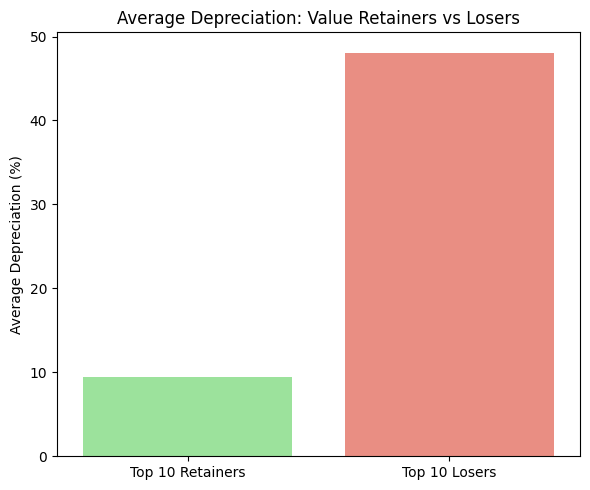

In [46]:
# Retention Ratio by Manufacturer

retention_df = (df.groupby('Manufacturer', observed=True)['Retention_Ratio']
                .mean().sort_values(ascending=False).reset_index())

manu_order = retention_df['Manufacturer']
plt.figure(figsize=(20,6))
sns.barplot(data=retention_df, x='Manufacturer', y='Retention_Ratio', hue='Manufacturer',
            order=manu_order, legend=False, palette='muted', dodge=False)
plt.xticks(rotation=45)
plt.title('Average Value Retention by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer')
plt.ylabel('Average Retention (%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Compare Top Retainers vs Losers

top_retainers = (df[['Manufacturer', 'Model', 'Vehicle_type', 'Depreciation_Percentage', 'Year_resale_value']]
                 .sort_values(by='Depreciation_Percentage', ascending=True).head(10))

top_losers = (df[['Manufacturer', 'Model', 'Vehicle_type', 'Depreciation_Percentage', 'Year_resale_value']]
              .sort_values(by='Depreciation_Percentage', ascending=False).head(10))

display('Top 10 Retainers:',top_retainers)
display('Top 10 Losers:',top_losers)

avg_top10 = top_retainers['Depreciation_Percentage'].mean()
avg_bottom10 = top_losers['Depreciation_Percentage'].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=['Top 10 Retainers', 'Top 10 Losers'], y=[avg_top10, avg_bottom10],
            hue=['Top 10 Retainers', 'Top 10 Losers'], palette=['lightgreen', 'salmon'])
plt.title('Average Depreciation: Value Retainers vs Losers')
plt.ylabel('Average Depreciation (%)')
plt.tight_layout()
plt.show()

## 10. Fuel Efficiency & Design Analysis

Fuel efficiency represents one of the most influential metrics in automotive design — balancing power, comfort, and aerodynamics.  

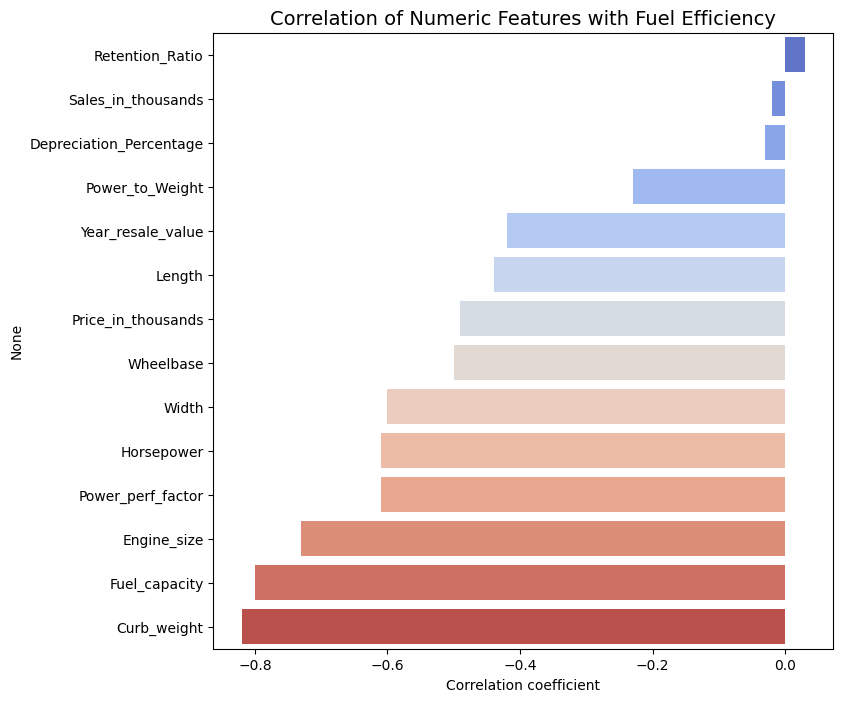

Selected fuel-efficiency-driving features:
 ['Engine_size', 'Horsepower', 'Width', 'Curb_weight', 'Fuel_capacity', 'Power_perf_factor']


In [47]:
fuel_corr = corr_matrix_subset['Fuel_efficiency'].drop('Fuel_efficiency')
fuel_corr_sorted = fuel_corr.sort_values(ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(x=fuel_corr_sorted.values, y=fuel_corr_sorted.index, hue=fuel_corr_sorted.index,
            palette='coolwarm', dodge=False, legend=False)
plt.title('Correlation of Numeric Features with Fuel Efficiency', fontsize=14)
plt.xlabel('Correlation coefficient')
plt.show()

# Select features with strong correlations (|corr| ≥ threshold)
selected_fuel_features = fuel_corr[fuel_corr.abs() >= threshold].index.tolist()
print('Selected fuel-efficiency-driving features:\n', selected_fuel_features)

### 10.1 Performance Attributes vs Fuel Efficiency

This scatter plot explores how performance attributes impacts fuel economy.

Typically, larger engines lead to reduced efficiency, but certain compact engines with high tuning may show exceptions.

Performance features influencing Fuel efficiency:
 ['Engine_size', 'Horsepower']


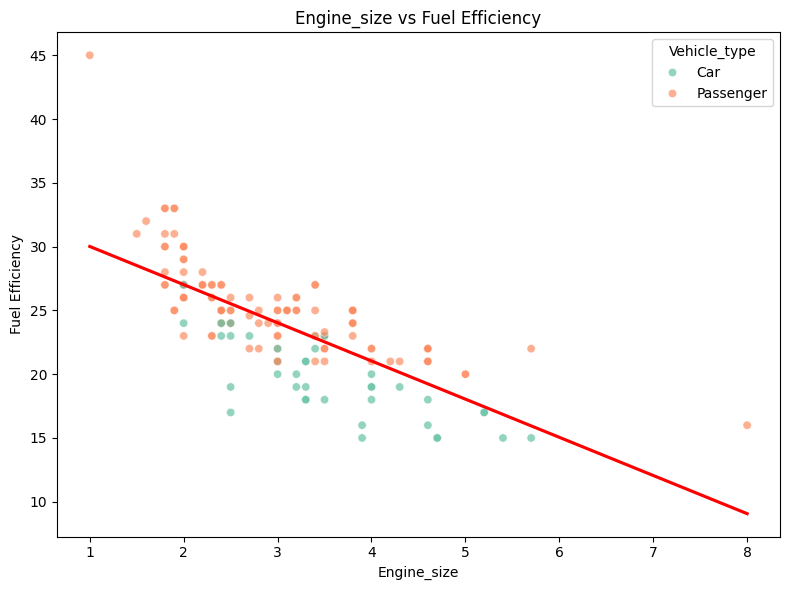

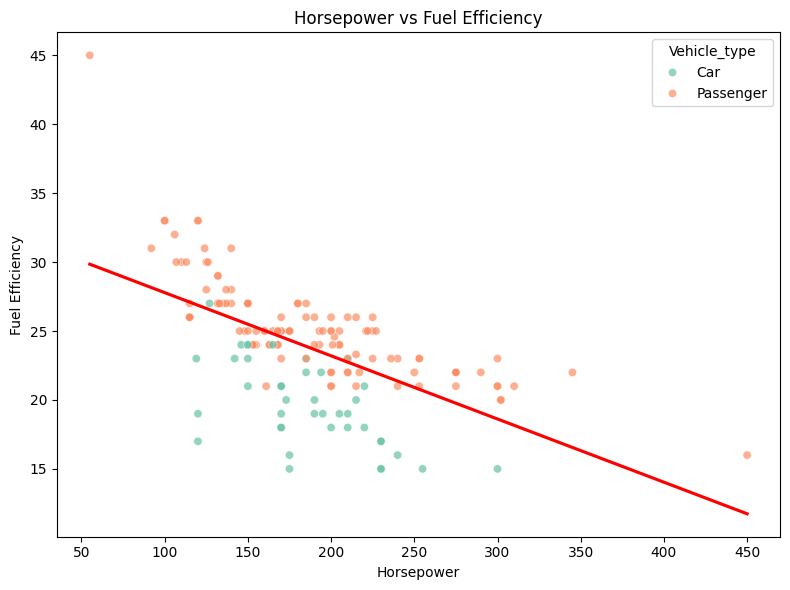

In [48]:
performance_fuel = [f for f in performance_features if f in selected_fuel_features]
print("Performance features influencing Fuel efficiency:\n", performance_fuel)

if len(performance_fuel) > 0:
    for feature in performance_fuel:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x=feature, y='Fuel_efficiency', alpha=0.7, hue='Vehicle_type', palette='Set2')
        sns.regplot(data=df, x=feature, y='Fuel_efficiency', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Fuel Efficiency')
        plt.xlabel(feature)
        plt.ylabel('Fuel Efficiency')
        plt.tight_layout()
        plt.show()
else:
    print("No strongly correlated performance features found — skipping performance plots.")

### 10.2 Design Dimensions vs Fuel Efficiency

Vehicle size and weight influence aerodynamics and rolling resistance.

We compare major design parameters such as wheelbase, width, and curb weight to fuel efficiency.


Design features influencing Fuel efficiency:
 ['Width', 'Curb_weight', 'Fuel_capacity']


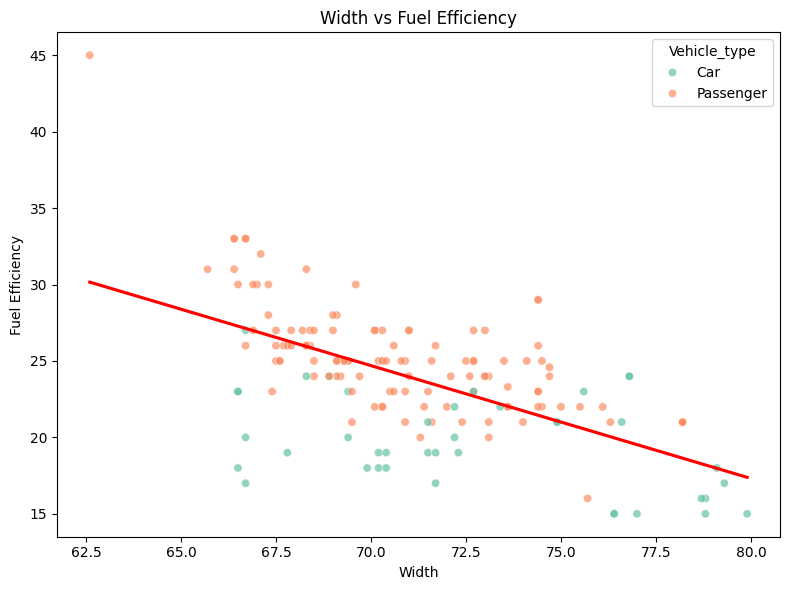

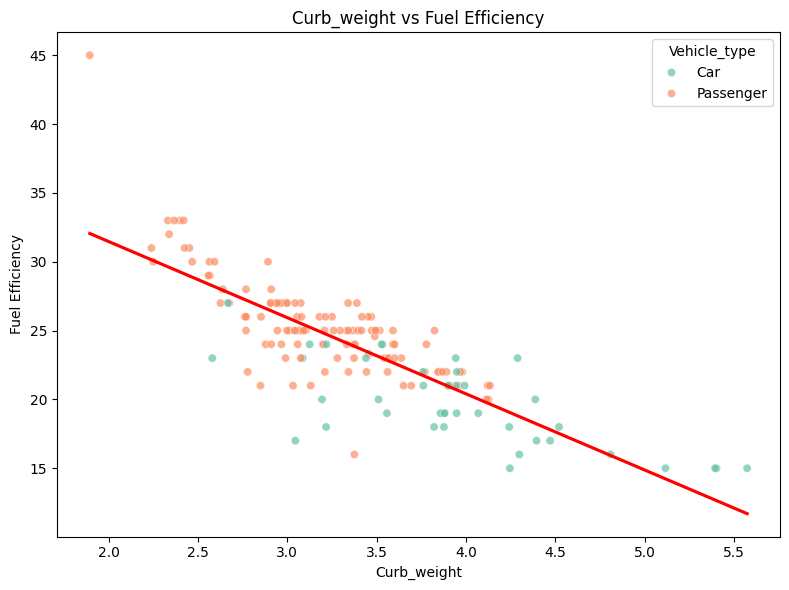

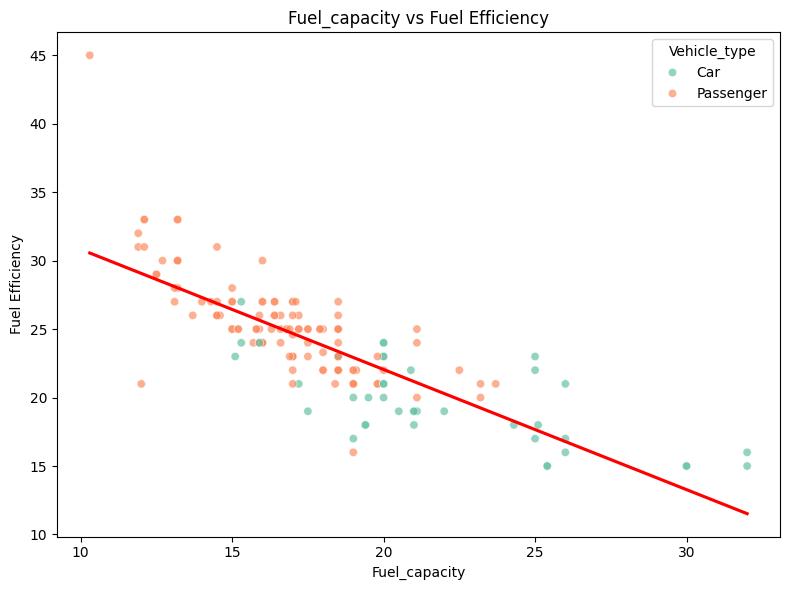

In [49]:
design_fuel = [f for f in design_features if f in selected_fuel_features]
print("\nDesign features influencing Fuel efficiency:\n", design_fuel)

if len(design_fuel) > 0:
    for feature in design_fuel:
        plt.figure(figsize=(8,6))
        sns.scatterplot(data=df, x=feature, y='Fuel_efficiency', alpha=0.7, hue='Vehicle_type', palette='Set2')
        sns.regplot(data=df, x=feature, y='Fuel_efficiency', scatter=False, color='red', ci=None)
        plt.title(f'{feature} vs Fuel Efficiency')
        plt.xlabel(feature)
        plt.ylabel('Fuel Efficiency')
        plt.tight_layout()
        plt.show()
else:
    print("No strongly correlated design features found — skipping design plots.")

### 10.3 Average Fuel Efficiency by Vehicle Type

This bar chart summarizes how average efficiency differs across vehicle categories —  compact cars tend to outperform SUVs and luxury sedans in fuel economy.

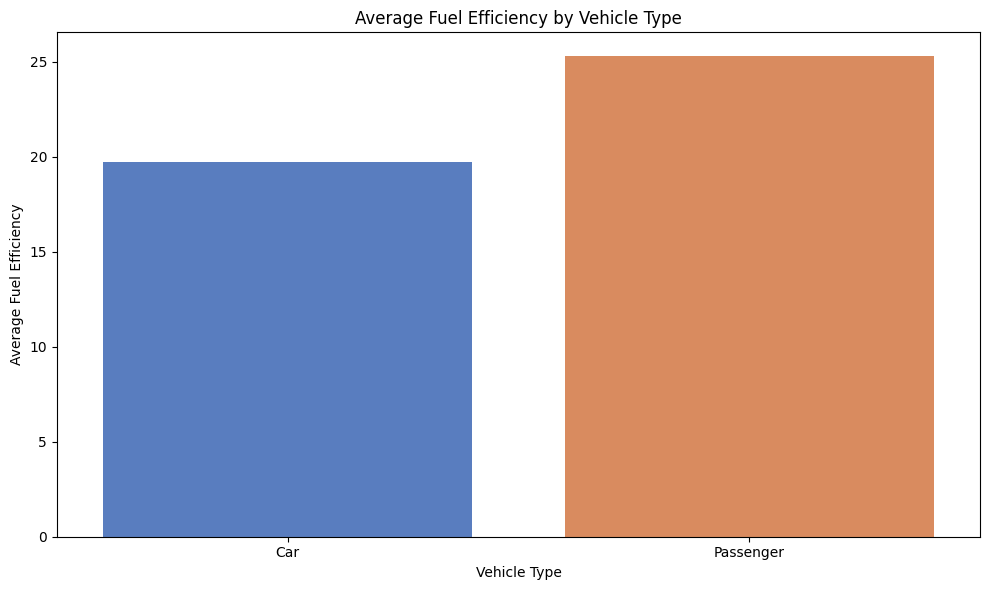

In [50]:
# Average Fuel Efficiency by Vehicle Type

avg_efficiency = df.groupby('Vehicle_type', observed=True)['Fuel_efficiency'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_efficiency.index, y=avg_efficiency.values, hue=avg_efficiency.index,
            legend=False, palette='muted', dodge=False)
plt.title('Average Fuel Efficiency by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Fuel Efficiency')
plt.tight_layout()
plt.show()

## 11. Trends Over Time — Evolution of Car Design, Performance & Market Behavior

### 11.1 Age Calculation from Launch Date

To understand how time since launch affects performance, sales, and pricing, we first derive the car’s exact age in **years** from its latest launch date.

In [ ]:
today = datetime.today()
current_date = pd.to_datetime(today.date())

df['Age_years'] = (
    (current_date.year - df['Launch_Year'])
    - (
        (df['Latest_Launch'].dt.month > current_date.month)
        | (
            (df['Latest_Launch'].dt.month == current_date.month)
            & (df['Latest_Launch'].dt.day > current_date.day)
        )
      ).astype(int)
)

### 11.2 Are Newer Cars More Fuel-Efficient?

We visualize how **fuel efficiency changes with car age**, testing whether recent models are engineered to deliver better mileage.

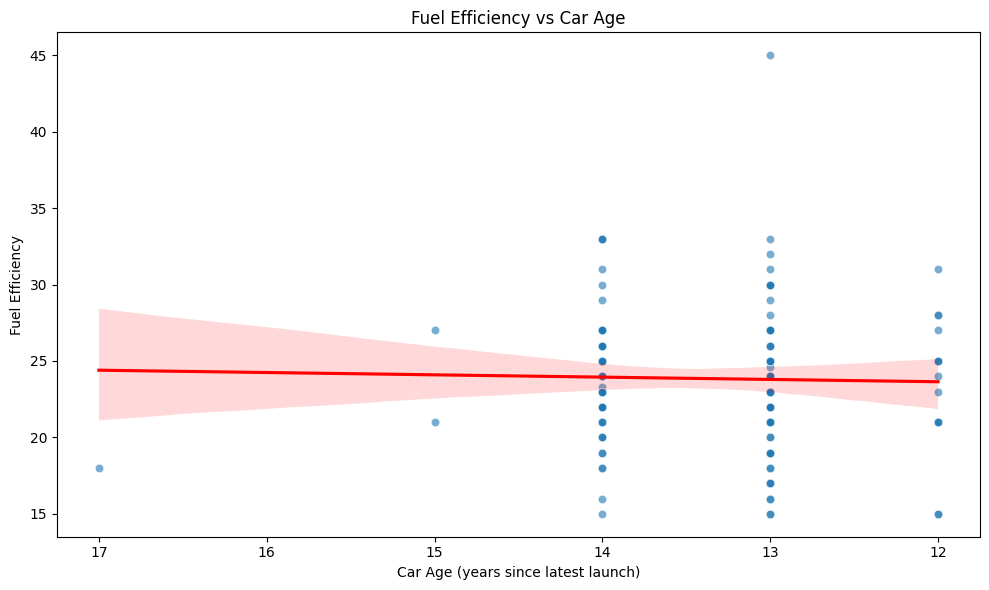

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age_years', y='Fuel_efficiency', alpha=0.6)
sns.regplot(data=df, x='Age_years', y='Fuel_efficiency', scatter=False, color='red')
plt.title('Fuel Efficiency vs Car Age')
plt.xlabel('Car Age (years since latest launch)')
plt.ylabel('Fuel Efficiency')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### 11.3 Average Fuel Efficiency by Launch Year

Let’s check if **newer model years** show measurable improvement in fuel efficiency.

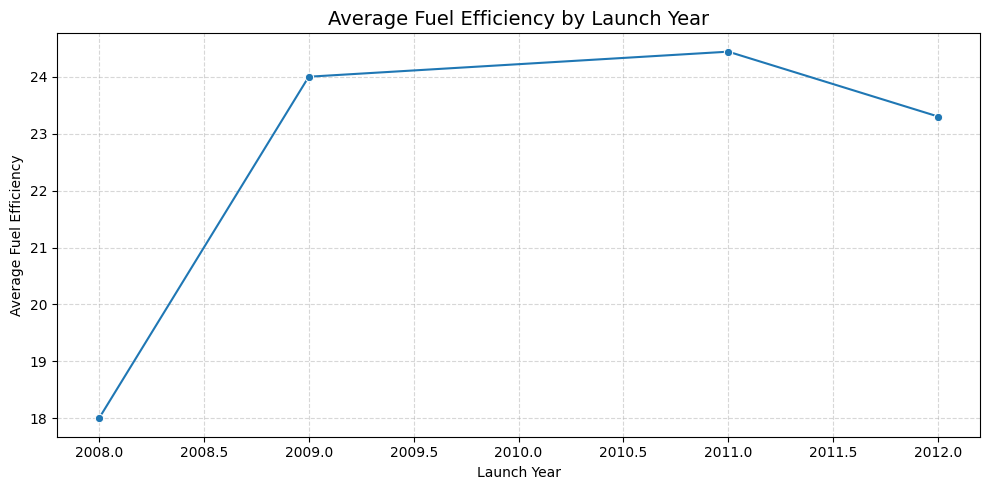

In [53]:
# Average Fuel Efficiency by Launch Year

avg_fuel = df.groupby('Launch_Year')['Fuel_efficiency'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_fuel.index, y=avg_fuel.values, marker='o')
plt.title('Average Fuel Efficiency by Launch Year', fontsize=14)
plt.xlabel('Launch Year')
plt.ylabel('Average Fuel Efficiency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 11.4 Evolution of Engine Design Over Time

We analyze **how engine sizes and horsepower** have evolved with each new model year — revealing whether car makers are trending toward **efficiency or performance.**

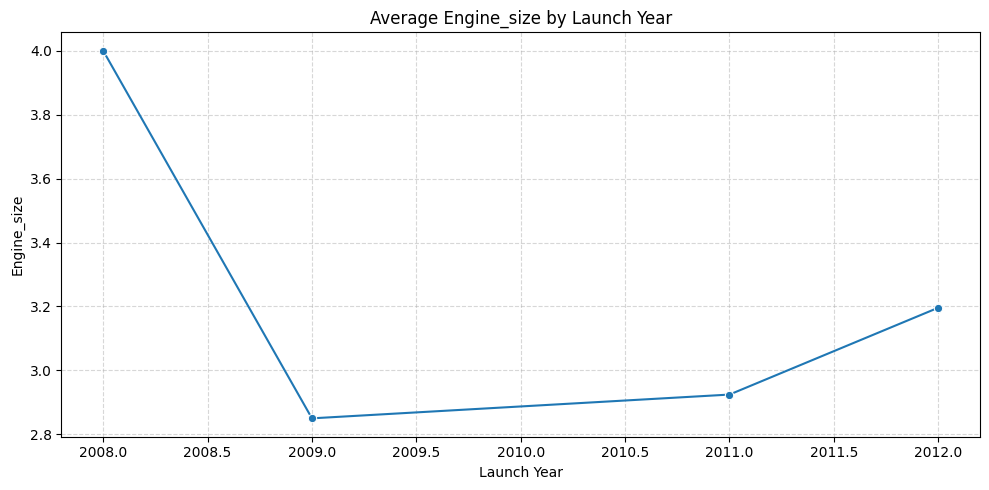

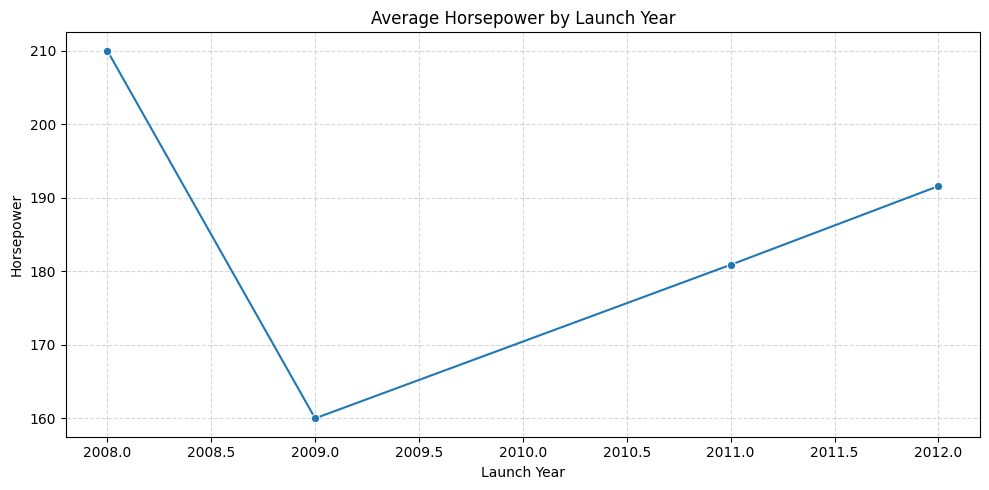

In [54]:
features = ['Engine_size', 'Horsepower']
for feature in features:
    avg_feature = df.groupby('Launch_Year')[feature].mean()
    plt.figure(figsize=(10,5))
    sns.lineplot(x=avg_feature.index, y=avg_feature.values, marker='o')
    plt.title(f'Average {feature} by Launch Year', fontsize=12)
    plt.xlabel('Launch Year')
    plt.ylabel(feature)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### 11.5 Are Newer Cars More Expensive?

We test whether **newer models** tend to command **higher prices**, indicating either technological improvements or market inflation.

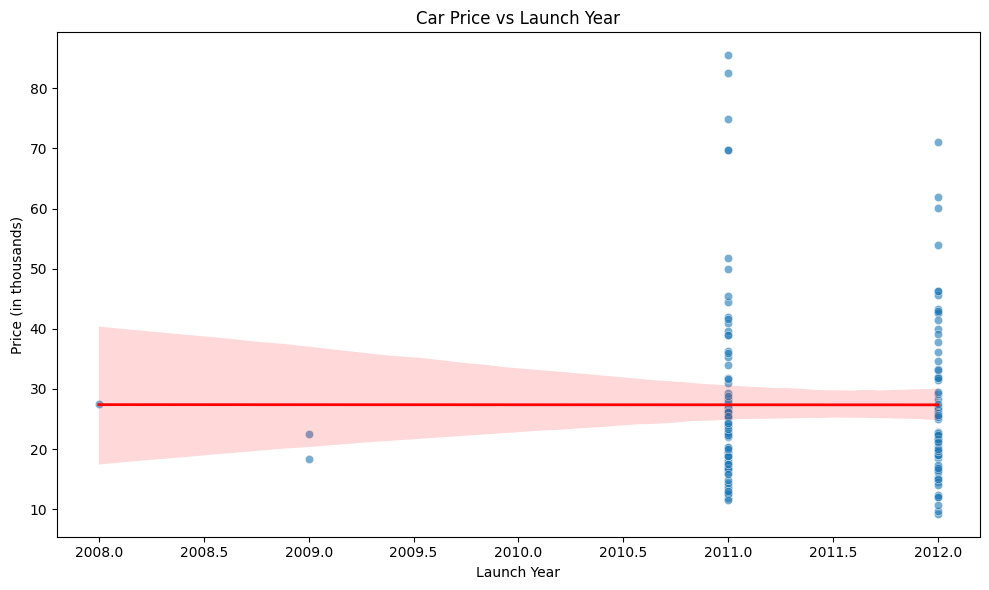

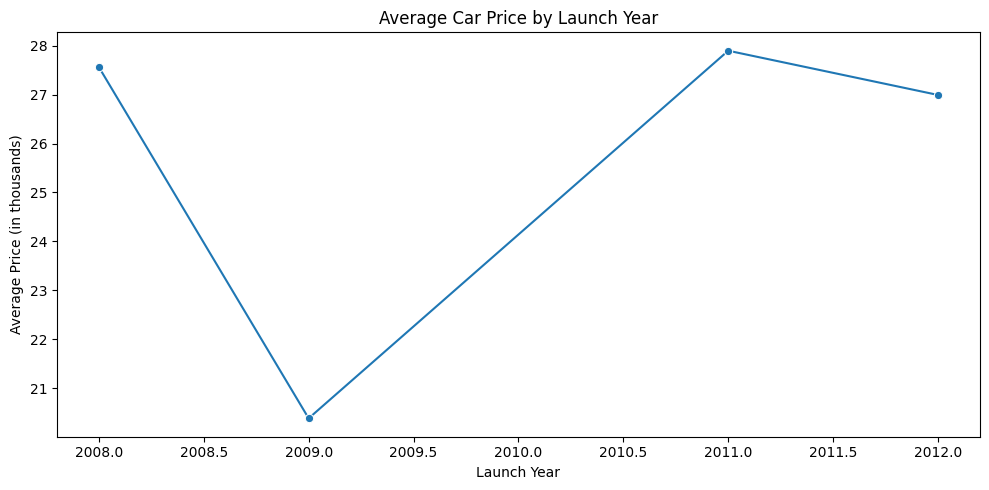

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Launch_Year', y='Price_in_thousands', alpha=0.6)
sns.regplot(data=df, x='Launch_Year', y='Price_in_thousands', scatter=False, color='red', line_kws={'linewidth':2})
plt.title('Car Price vs Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Price (in thousands)')
plt.tight_layout()
plt.show()

avg_price = df.groupby('Launch_Year')['Price_in_thousands'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_price.index, y=avg_price.values, marker='o')
plt.title('Average Car Price by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Average Price (in thousands)')
plt.tight_layout()
plt.show()

### 11.6 Depreciation & Value Retention Over Time

Depreciation and retention give insights into how **long-term value** of vehicles has evolved across different launch years.

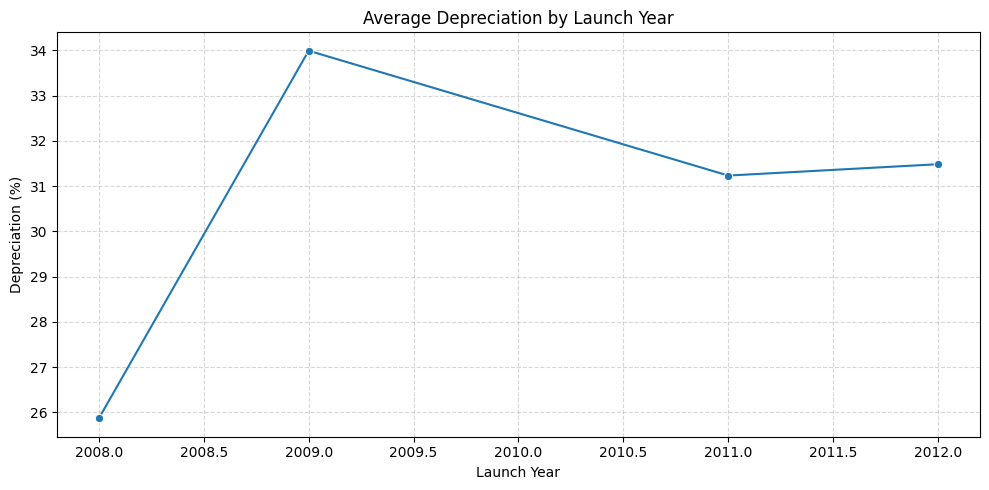

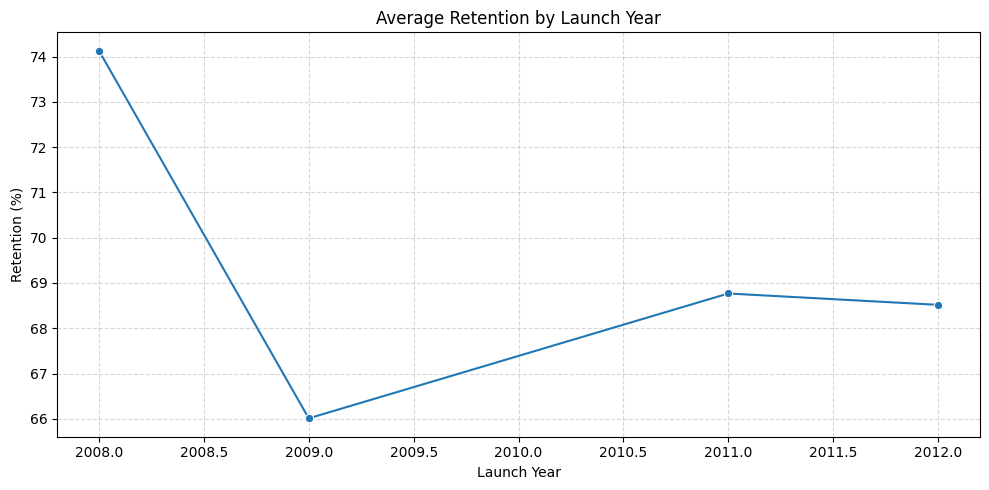

In [56]:
avg_depreciation = df.groupby('Launch_Year')['Depreciation_Percentage'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_depreciation.index, y=avg_depreciation.values, marker='o')
plt.title('Average Depreciation by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Depreciation (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

avg_retention = df.groupby('Launch_Year')['Retention_Ratio'].mean()
avg_retention_pct = (avg_retention * 100)
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_retention_pct.index, y=avg_retention_pct.values, marker='o')
plt.title('Average Retention by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Retention (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 11.7 Market Trends — Sales & Pricing Over Time

We visualize how **sales volumes and prices** have evolved over time, focusing on whether **recent launches** perform better commercially.

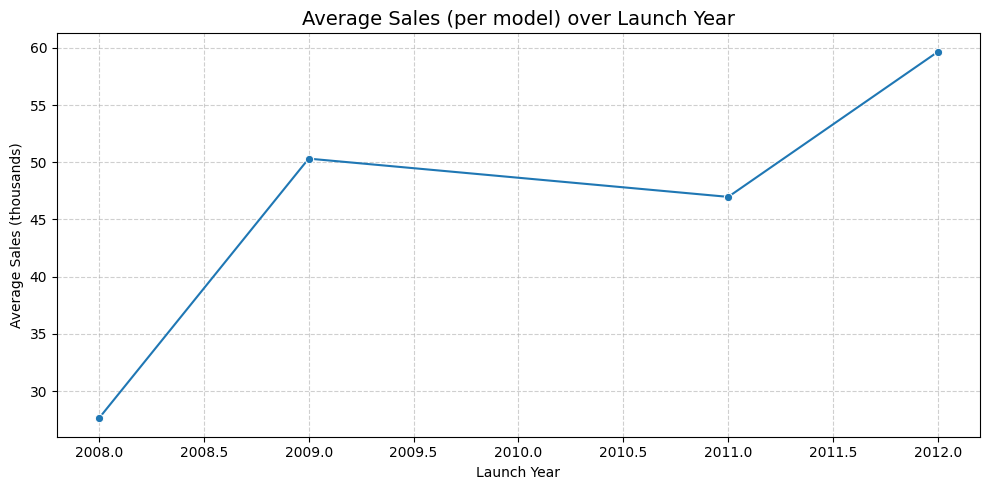

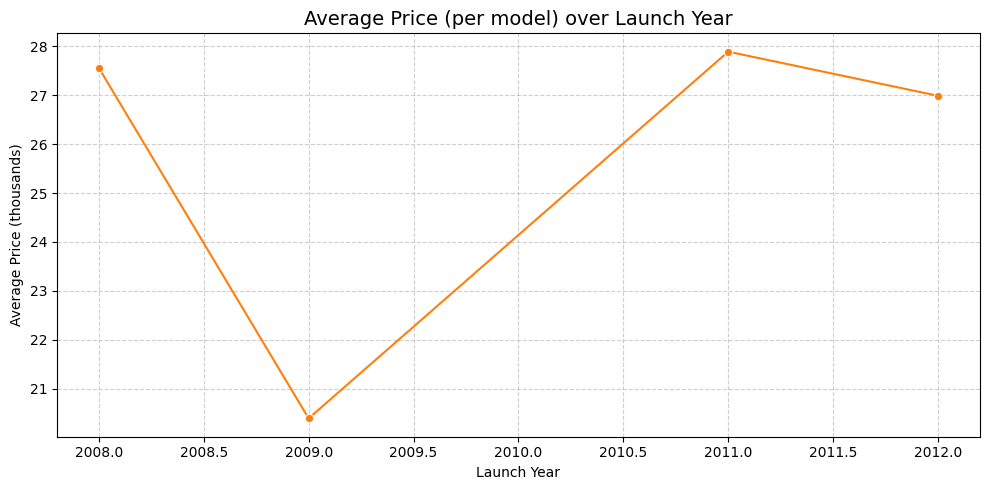

In [57]:
# Average Sales per Launch Year

plt.figure(figsize=(10,5))
avg_sales_by_year = df.groupby('Launch_Year')['Sales_in_thousands'].mean()
sns.lineplot(x=avg_sales_by_year.index, y=avg_sales_by_year.values, marker='o')
plt.title('Average Sales (per model) over Launch Year', fontsize=14)
plt.xlabel('Launch Year')
plt.ylabel('Average Sales (thousands)') 
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Average price per Launch Year

plt.figure(figsize=(10,5))
avg_price_by_year = df.groupby('Launch_Year')['Price_in_thousands'].mean()
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o', color='tab:orange')
plt.title('Average Price (per model) over Launch Year', fontsize=14)
plt.xlabel('Launch Year')
plt.ylabel('Average Price (thousands)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 11.8 Depreciation Across Individual Models

Visualizing how **each model’s depreciation** aligns with its launch timing.

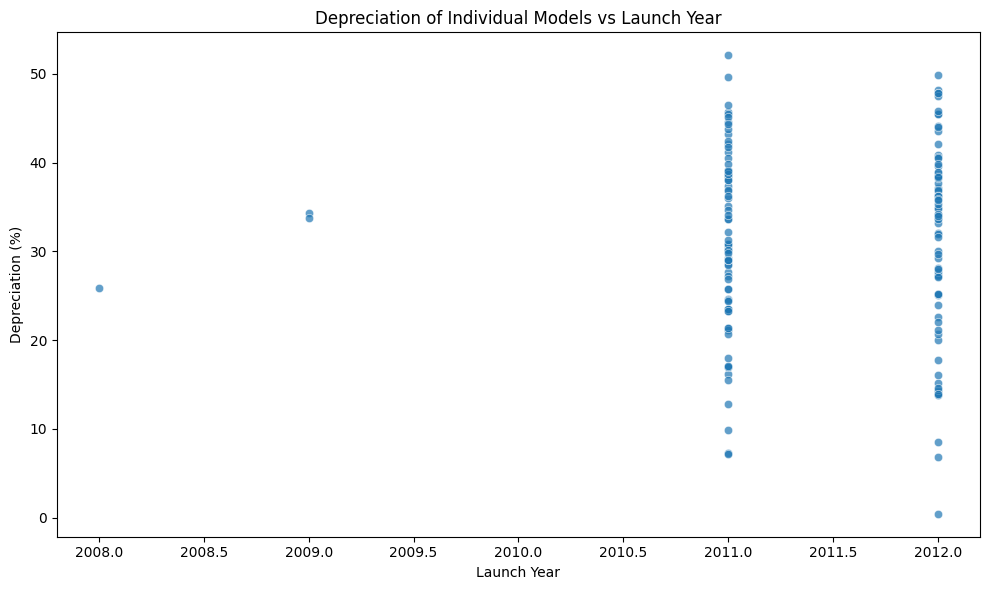

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Launch_Year', y='Depreciation_Percentage', alpha=0.7)
plt.title('Depreciation of Individual Models vs Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Depreciation (%)')
plt.tight_layout()
plt.show()

### 11.9 Performance-Efficiency Trade-off Over Time

Examining how **performance (horsepower)** and **efficiency** evolve together, highlighting engineering trade-offs across launch years.

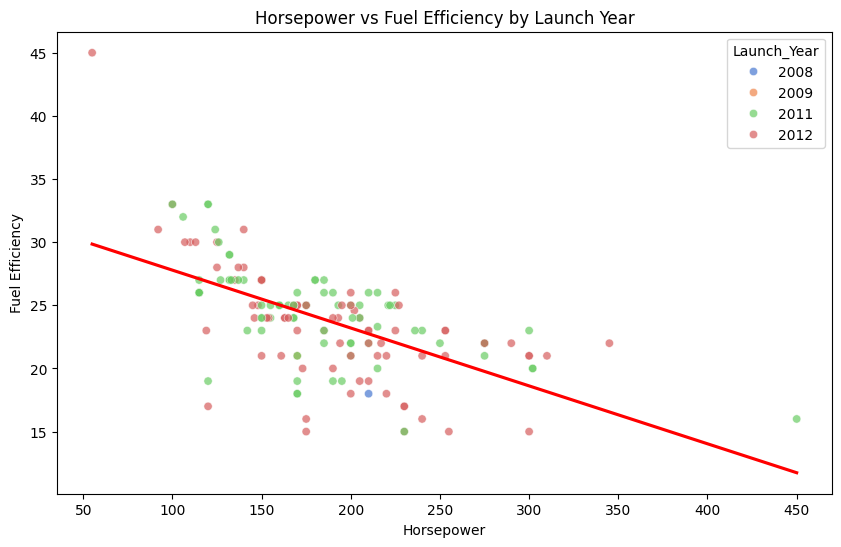

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Horsepower', y='Fuel_efficiency', hue='Launch_Year', palette='muted', alpha=0.7)
sns.regplot(data=df, x='Horsepower', y='Fuel_efficiency', scatter=False, color='red', ci=None)
plt.title('Horsepower vs Fuel Efficiency by Launch Year')
plt.xlabel('Horsepower')
plt.ylabel('Fuel Efficiency')
plt.show()

### 11.10 Price–Performance Relationship Over Time

Investigating whether **powerful cars** also tend to be **more expensive** in recent years.

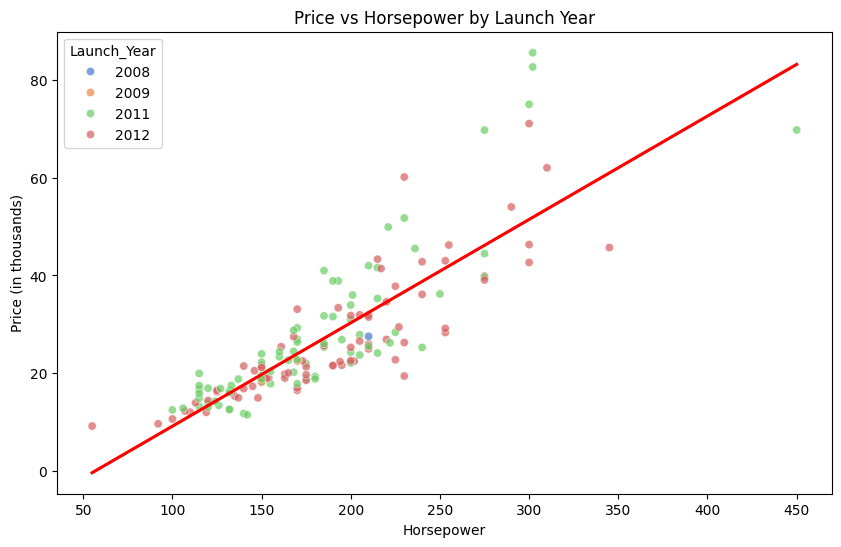

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Horsepower', y='Price_in_thousands', hue='Launch_Year', palette='muted', alpha=0.7)
sns.regplot(data=df, x='Horsepower', y='Price_in_thousands', scatter=False, color='red', ci=None)
plt.title('Price vs Horsepower by Launch Year')
plt.xlabel('Horsepower')
plt.ylabel('Price (in thousands)')
plt.show()

### 11.11 Total Sales by Launch Year

Finally, we track **aggregate sales** over time to identify market cycles and product surges.

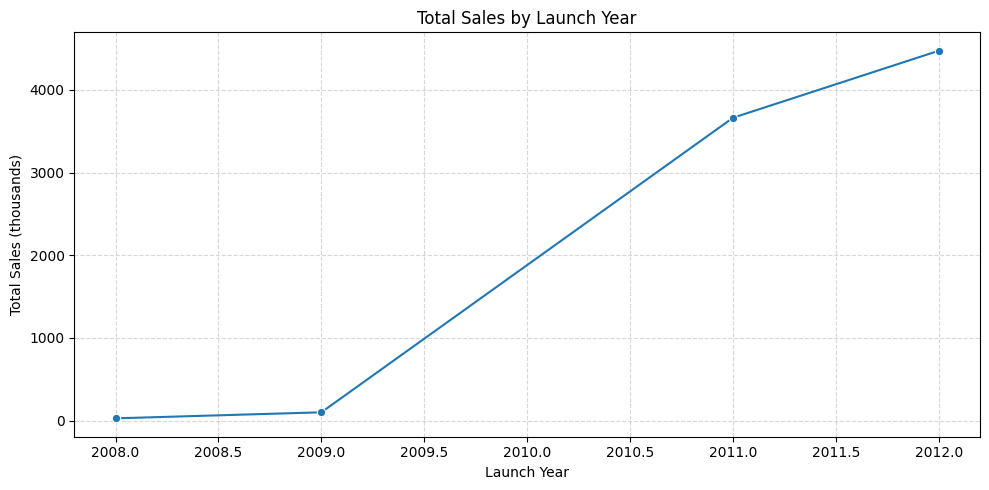

In [61]:
total_sales = df.groupby('Launch_Year')['Sales_in_thousands'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=total_sales.index, y=total_sales.values, marker='o')
plt.title('Total Sales by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Total Sales (thousands)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 9. Vehicle Segmentation

## Vehicle Segmentation (Quantile-Based)

To understand how cars are distributed across **price ranges**,  
we segment them into four categories — **Economy, Mid-Range, Premium, and Luxury** —  
using quartile-based cutoffs (`pd.qcut`).


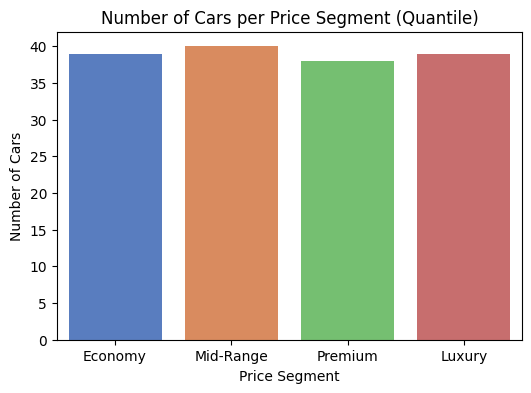

In [62]:
# Quantile Segmentation
labels = ['Economy', 'Mid-Range', 'Premium', 'Luxury']
df['Price_Segment'] = pd.qcut(df['Price_in_thousands'], q=4, labels=labels)

# Number of Cars per Segment
segment_counts = df['Price_Segment'].value_counts().reindex(labels)
plt.figure(figsize=(6,4))
sns.barplot(x=segment_counts.index.astype(str), y=segment_counts.values, 
            hue=segment_counts.index.astype(str), palette='muted')
plt.title('Number of Cars per Price Segment (Quantile)')
plt.xlabel('Price Segment')
plt.ylabel('Number of Cars')
plt.show()


### Average Sales by Price Segment

We then analyze how **sales performance** varies across these pricing tiers.


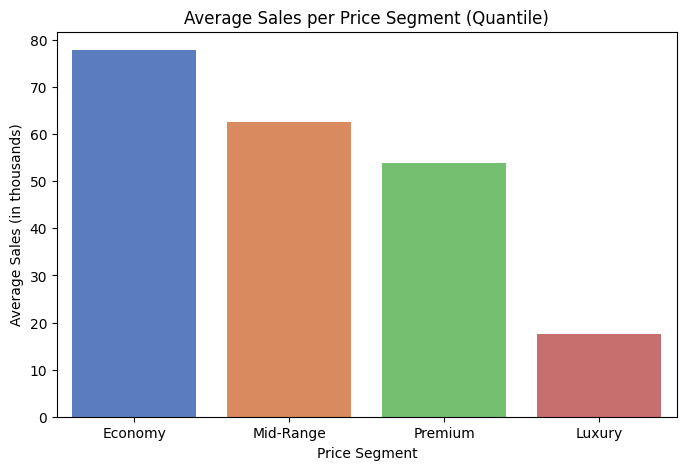

In [63]:
avg_sales = df.groupby('Price_Segment', observed=True)['Sales_in_thousands'].mean().reindex(labels)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_sales.index, y=avg_sales.values, hue=avg_sales.index, palette='muted')
plt.title('Average Sales per Price Segment (Quantile)')
plt.xlabel('Price Segment')
plt.ylabel('Average Sales (in thousands)')
plt.show()


## Feature Profiling Across Price Segments

We group related attributes into **Performance**, **Size & Weight**, and **Financial** categories  
to compare how the average specifications differ between segments.



Average Performance Features by Price Segment:
                Horsepower  Engine_size  Power_perf_factor  Fuel_efficiency
Price_Segment                                                             
Economy        125.564103     2.110256          50.572654        27.769231
Mid-Range      169.950000     2.997500          68.449219        23.564661
Premium        198.157895     3.252632          81.397432        22.665871
Luxury         250.846154     3.889744         107.958534        21.358974


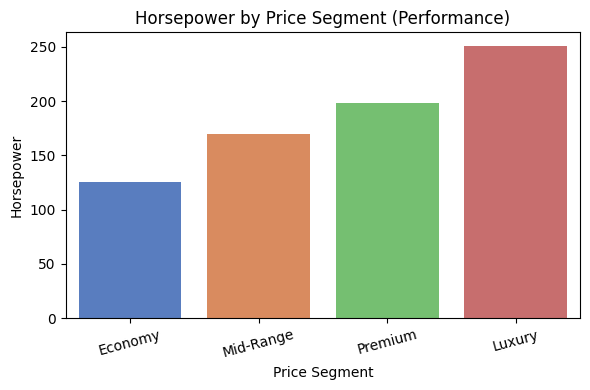

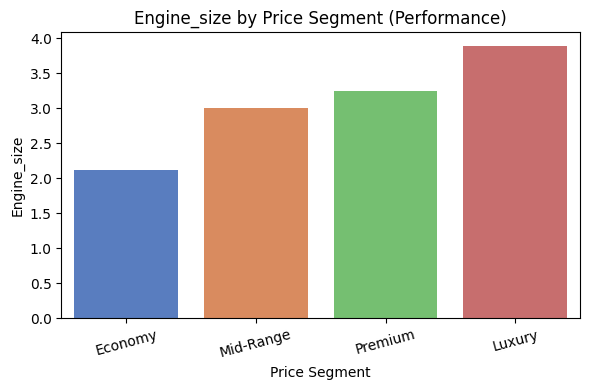

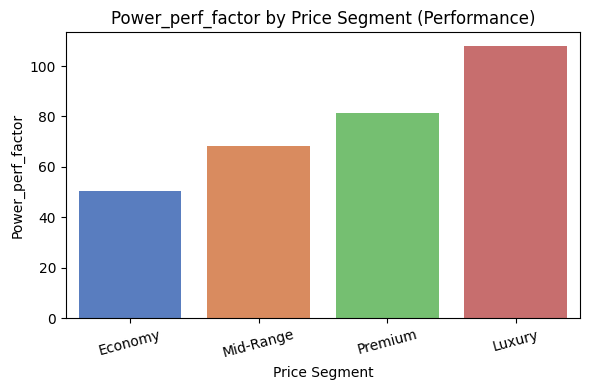

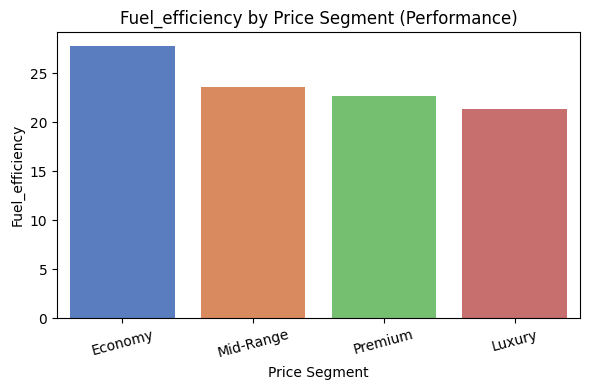


Average Size & Weight Features by Price Segment:
                 Wheelbase      Width      Length  Curb_weight  Fuel_capacity
Price_Segment                                                               
Economy        103.628205  68.446154  178.717949     2.718821      14.807692
Mid-Range      108.740000  71.912500  190.362500     3.391575      18.145000
Premium        108.815789  71.294737  190.910526     3.596658      19.007895
Luxury         108.766667  72.930769  189.397436     3.809385      19.869231


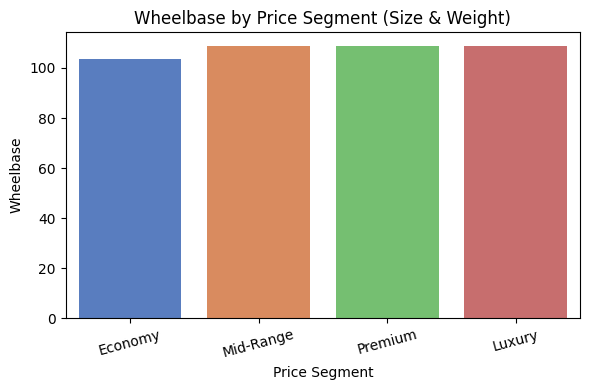

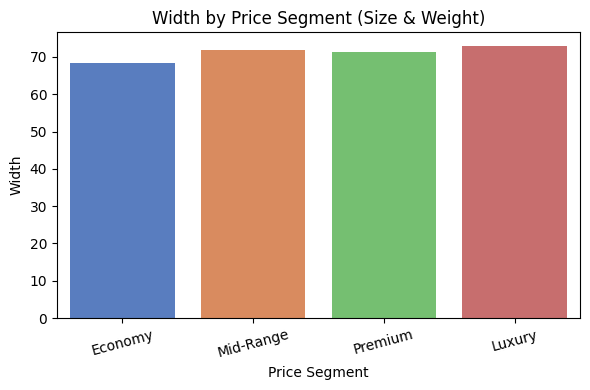

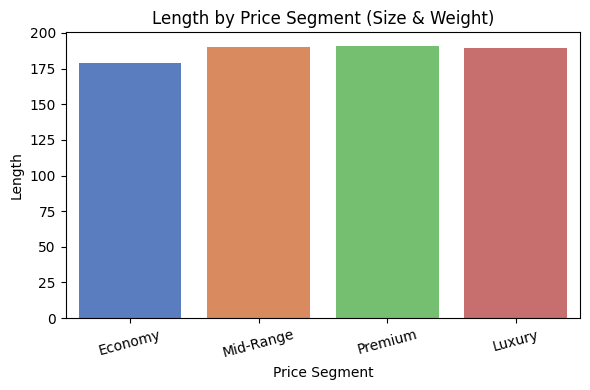

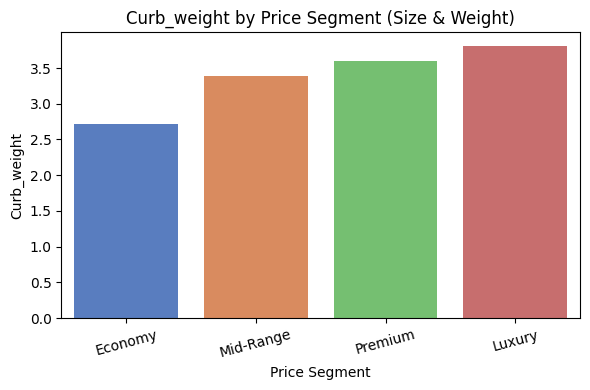

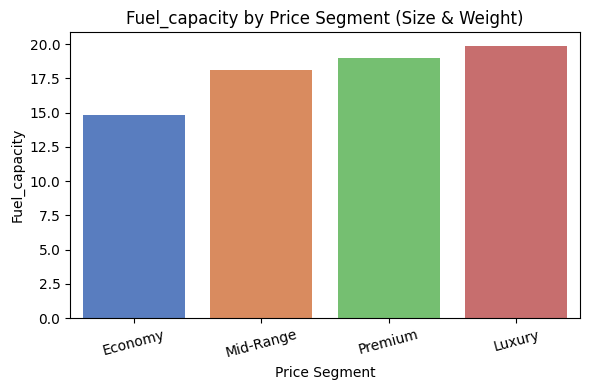


Average Financial Features by Price Segment:
                Sales_in_thousands  Year_resale_value  Depreciation_Percentage  \
Price_Segment                                                                   
Economy                 77.836205          10.202604                29.954908   
Mid-Range               62.519525          13.586966                34.487058   
Premium                 53.933974          17.941150                33.835921   
Luxury                  17.470103          34.788053                27.119241   

               Retention_Ratio  
Price_Segment                   
Economy               0.700451  
Mid-Range             0.655129  
Premium               0.661641  
Luxury                0.728808  


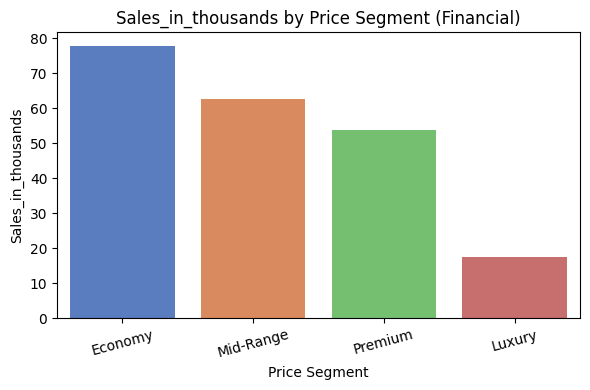

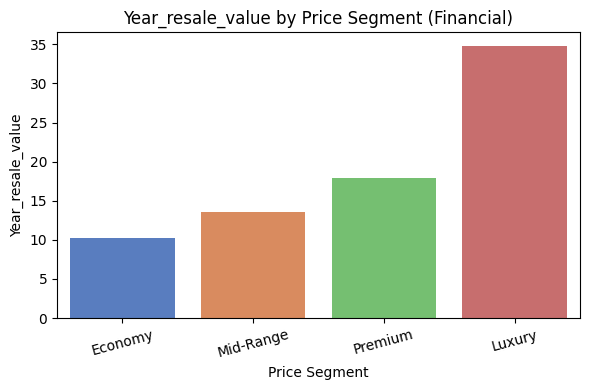

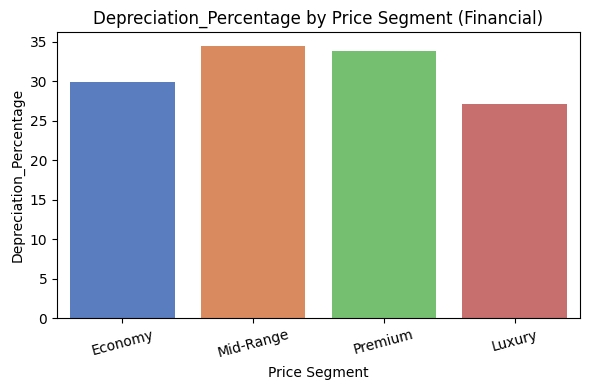

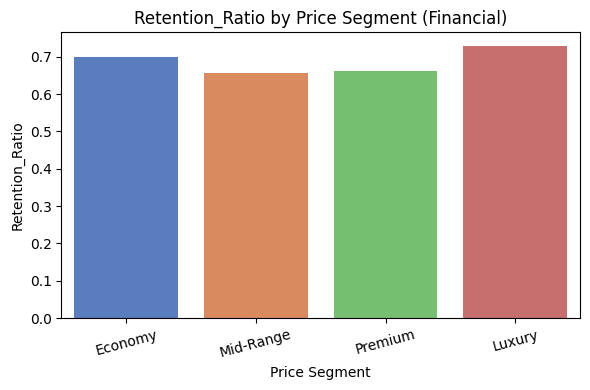

In [64]:
feature_groups = {
    'Performance': ['Horsepower', 'Engine_size', 'Power_perf_factor', 'Fuel_efficiency'],
    'Size & Weight': ['Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity'],
    'Financial': ['Sales_in_thousands', 'Year_resale_value', 'Depreciation_Percentage', 'Retention_Ratio']
}

for group_name, features in feature_groups.items():
    avg_features = df.groupby('Price_Segment', observed=True)[features].mean().reindex(labels)
    print(f'\nAverage {group_name} Features by Price Segment:\n', avg_features)
    
    for feature in features:
        plt.figure(figsize=(6,4))
        sns.barplot(x=avg_features.index, y=avg_features[feature], hue=avg_features.index, palette='muted')
        plt.title(f'{feature} by Price Segment ({group_name})')
        plt.xlabel('Price Segment')
        plt.ylabel(feature)
        plt.xticks(rotation=15)
        plt.tight_layout()
        plt.show()


### Price Segment Relationships — Efficiency & Value

Visualizing **how power, efficiency, and depreciation** interact within each segment.


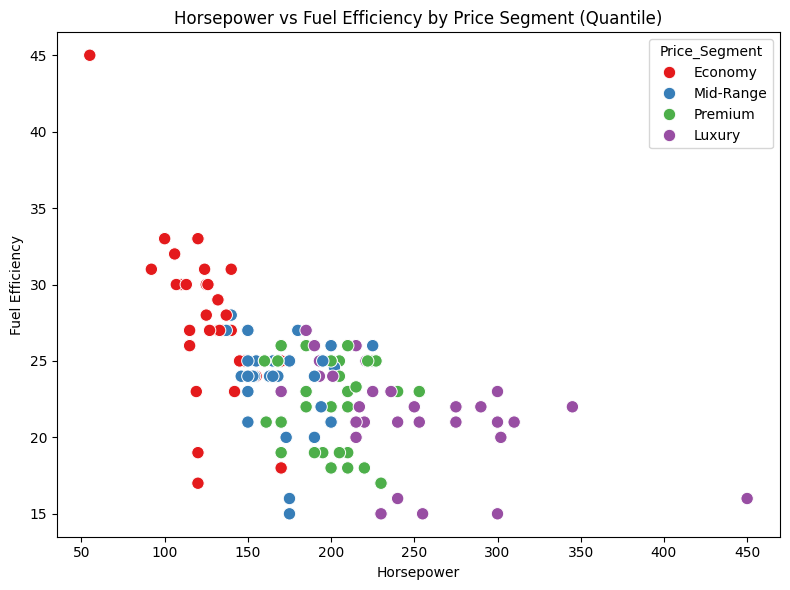

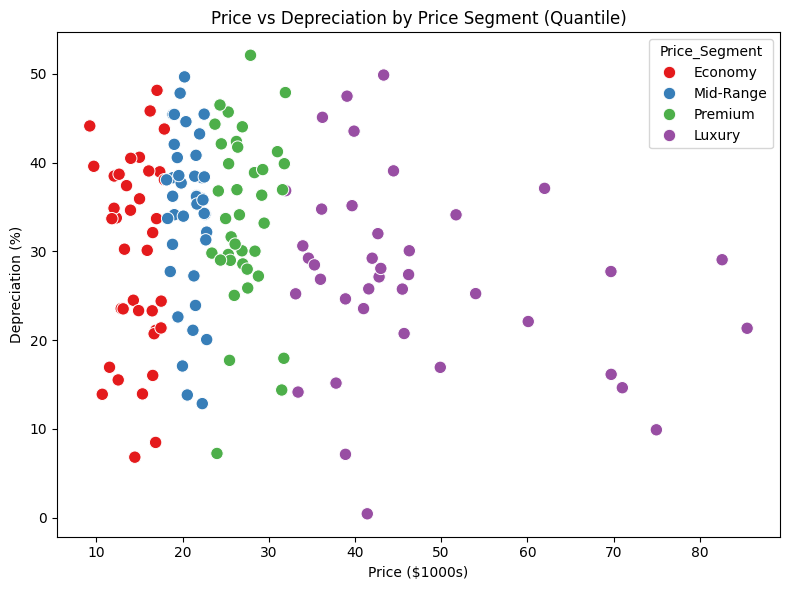

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Horsepower', y='Fuel_efficiency', hue='Price_Segment', data=df, palette='Set1', s=80)
plt.title('Horsepower vs Fuel Efficiency by Price Segment (Quantile)')
plt.xlabel('Horsepower')
plt.ylabel('Fuel Efficiency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Price_in_thousands', y='Depreciation_Percentage', hue='Price_Segment', data=df, palette='Set1', s=80)
plt.title('Price vs Depreciation by Price Segment (Quantile)')
plt.xlabel('Price ($1000s)')
plt.ylabel('Depreciation (%)')
plt.tight_layout()
plt.show()
